<a href="https://colab.research.google.com/github/Mamatha121993/Amazon_sales_Analysis_over_india/blob/main/Data_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librariers

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [7]:
import requests

data_url = 'https://github.com/Mamatha121993/Data-for-Task-1/raw/main/SA%20-%20Data%20for%20Task%201.xlsx'
response = requests.get(data_url)

# Check if the request was successful
response.raise_for_status()

# Read the Excel file directly from the content of the response
df = pd.read_excel(response.content)
display(df.head())

VIN  TRANSACTION_ID  \
0  3HCFDDE89SH220903           13021   
1  1HRFFEE8XSZ230636           13028   
2  1HYKSMRK6SZ000990           13035   
3  3HCFDFEL3SH241701           13021   
4  1HRFFHEL1RZ181474           13021   

                                 CORRECTION_VERBATIM  \
0                   REPLACED STEERING WHEEL NOW OKAY   
1  CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2  APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                         STEERING WHEEL REPLACEMENT   
4      REPLACED STEERING MESSAGE NO LONGER DISPLAYED   

                                   CUSTOMER_VERBATIM REPAIR_DATE  \
0                        STEERING WHEEL COMING APART  2024-01-02   
1         CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-01-03   
2  OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-01-04   
3  CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-01-04   
4  C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...  2024-01-05   

                  CAUSAL_PART_NM             GLOBAL_LABOR_CODE_DESCRIPTION  \
0      WHEEL ASM-STRG *JET BLACK                Steering Wheel Replacement   
1    MODULE ASM-STRG WHL HT CONT  Heated Steering Wheel Module Replacement   
2  WHEEL ASM-STRG *BACKEN BLACKK                Steering Wheel Replacement   
3      WHEEL ASM-STRG *JET BLACK                Steering Wheel Replacement   
4      WHEEL ASM-STRG *JET BLACK                Steering Wheel Replacement   

           PLATFORM      BODY_STYLE       VPPC  ... TRANSMISSION_TRACE_NBR  \
0  Full-Size Trucks        Crew Cab      T1CCF  ...       S2210121CNJX0941   
1  Full-Size Trucks        Crew Cab      T1CGF  ...       R2210881CNJX0287   
2               BEV  4 Door Utility  L233-LSOP  ...                    NaN   
3  Full-Size Trucks        Crew Cab      T1CCF  ...       S1210822CKJX0291   
4  Full-Size Trucks        Crew Cab      T1CGF  ...       R2212982CKJX0282   

   SRC_TXN_ID SRC_VER_NBR TRANSACTION_CNTR MEDIA_FLAG VIN_MODL_DESGTR  \
0  2808908219           6                1          N         CF10543   
1  2808841910           6                1          Y         TF10543   
2  2809979441           4                1          Y           6MB26   
3  2808892288           6                1          Y         CF10543   
4  2808901882           8                1          N         TF10543   

  LINE_SERIES LAST_KNOWN_DELVRY_TYPE_CD  NON_CAUSAL_PART_QTY SALES_REGION_CODE  
0        1500                      21.0                    0                 1  
1        1500                      10.0                    0                 1  
2       Lux-1                      10.0                    0                 1  
3        1500                      10.0                    0                 1  
4        1500                      10.0                    0                 1  

[5 rows x 52 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

#Descriptive

In [9]:

df.describe()

TRANSACTION_ID          REPAIR_DATE  DEALER_REGION  REPAIR_AGE  \
count      100.000000                  100      100.00000  100.000000   
mean     13036.900000  2024-01-22 07:26:24        1.09000   14.940000   
min      13021.000000  2024-01-02 00:00:00        1.00000    0.000000   
25%      13027.750000  2024-01-12 00:00:00        1.00000    5.000000   
50%      13036.000000  2024-01-24 12:00:00        1.00000   12.000000   
75%      13041.250000  2024-02-01 00:00:00        1.00000   21.000000   
max      13081.000000  2024-02-07 00:00:00        4.00000   50.000000   
std         12.028166                  NaN        0.51434   12.367945   

                  KM  COMPLAINT_CD_CSI  ORD_SELLING_SRC_CD  GLOBAL_LABOR_CODE  \
count     100.000000             100.0          100.000000         100.000000   
mean    24914.230000               0.0           24.590000         251.900000   
min         3.000000               0.0           11.000000          20.000000   
25%      8883.250000               0.0           13.000000         130.000000   
50%     21962.000000               0.0           13.000000         130.000000   
75%     35493.250000               0.0           48.000000         130.000000   
max    107905.000000               0.0           72.000000        2400.000000   
std     20747.078206               0.0           17.822976         546.451722   

       CAMPAIGN_NBR  REPORTING_COST    TOTALCOST      LBRCOST  \
count           0.0      100.000000   100.000000   100.000000   
mean            NaN      531.193200   563.321400   106.344900   
min             NaN       27.690000    27.690000    20.000000   
25%             NaN      305.432500   320.930000    61.855000   
50%             NaN      433.970000   455.805000    78.560000   
75%             NaN      554.062500   604.695000   108.055000   
max             NaN     2457.450000  3205.450000  1012.670000   
std             NaN      411.161608   456.075552   113.223074   

       TRANSMISSION_SOURCE_PLANT    SRC_TXN_ID  SRC_VER_NBR  TRANSACTION_CNTR  \
count               8.800000e+01  1.000000e+02   100.000000             100.0   
mean                1.676383e+08  2.815767e+09     5.720000               1.0   
min                 2.878270e+05  2.808842e+09     2.000000               1.0   
25%                 2.878270e+05  2.809436e+09     4.000000               1.0   
50%                 8.042172e+06  2.820097e+09     4.000000               1.0   
75%                 1.774929e+07  2.820880e+09     6.000000               1.0   
max                 8.282984e+08  2.823000e+09    26.000000               1.0   
std                 3.237538e+08  5.790727e+06     4.040402               0.0   

       LAST_KNOWN_DELVRY_TYPE_CD  NON_CAUSAL_PART_QTY  SALES_REGION_CODE  
count                  98.000000           100.000000          100.00000  
mean                   14.132653             0.070000            1.09000  
min                    10.000000             0.000000            1.00000  
25%                    10.000000             0.000000            1.00000  
50%                    10.000000             0.000000            1.00000  
75%                    16.000000             0.000000            1.00000  
max                    37.000000             1.000000            4.00000  
std                     6.694570             0.256432            0.51434

#Unique values

In [10]:
for col in df.columns:
    print(f"unique values in {col} is {df[col]}")


unique values in VIN is 0     3HCFDDE89SH220903
1     1HRFFEE8XSZ230636
2     1HYKSMRK6SZ000990
3     3HCFDFEL3SH241701
4     1HRFFHEL1RZ181474
            ...        
95    1HYKNHRS6MZ221833
96    1HYKSSRL4SZ003381
97    1HKKNXLS3SZ128369
98    1HC4WLE78RF260518
99    1HKKNXLS8MZ121378
Name: VIN, Length: 100, dtype: object
unique values in TRANSACTION_ID is 0     13021
1     13028
2     13035
3     13021
4     13021
      ...  
95    13041
96    13048
97    13044
98    13045
99    13041
Name: TRANSACTION_ID, Length: 100, dtype: int64
unique values in CORRECTION_VERBATIM is 0                      REPLACED STEERING WHEEL NOW OKAY
1     CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...
2     APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...
3                            STEERING WHEEL REPLACEMENT
4         REPLACED STEERING MESSAGE NO LONGER DISPLAYED
                            ...                        
95    REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4
96                         

#Distribustion all columns in one frame

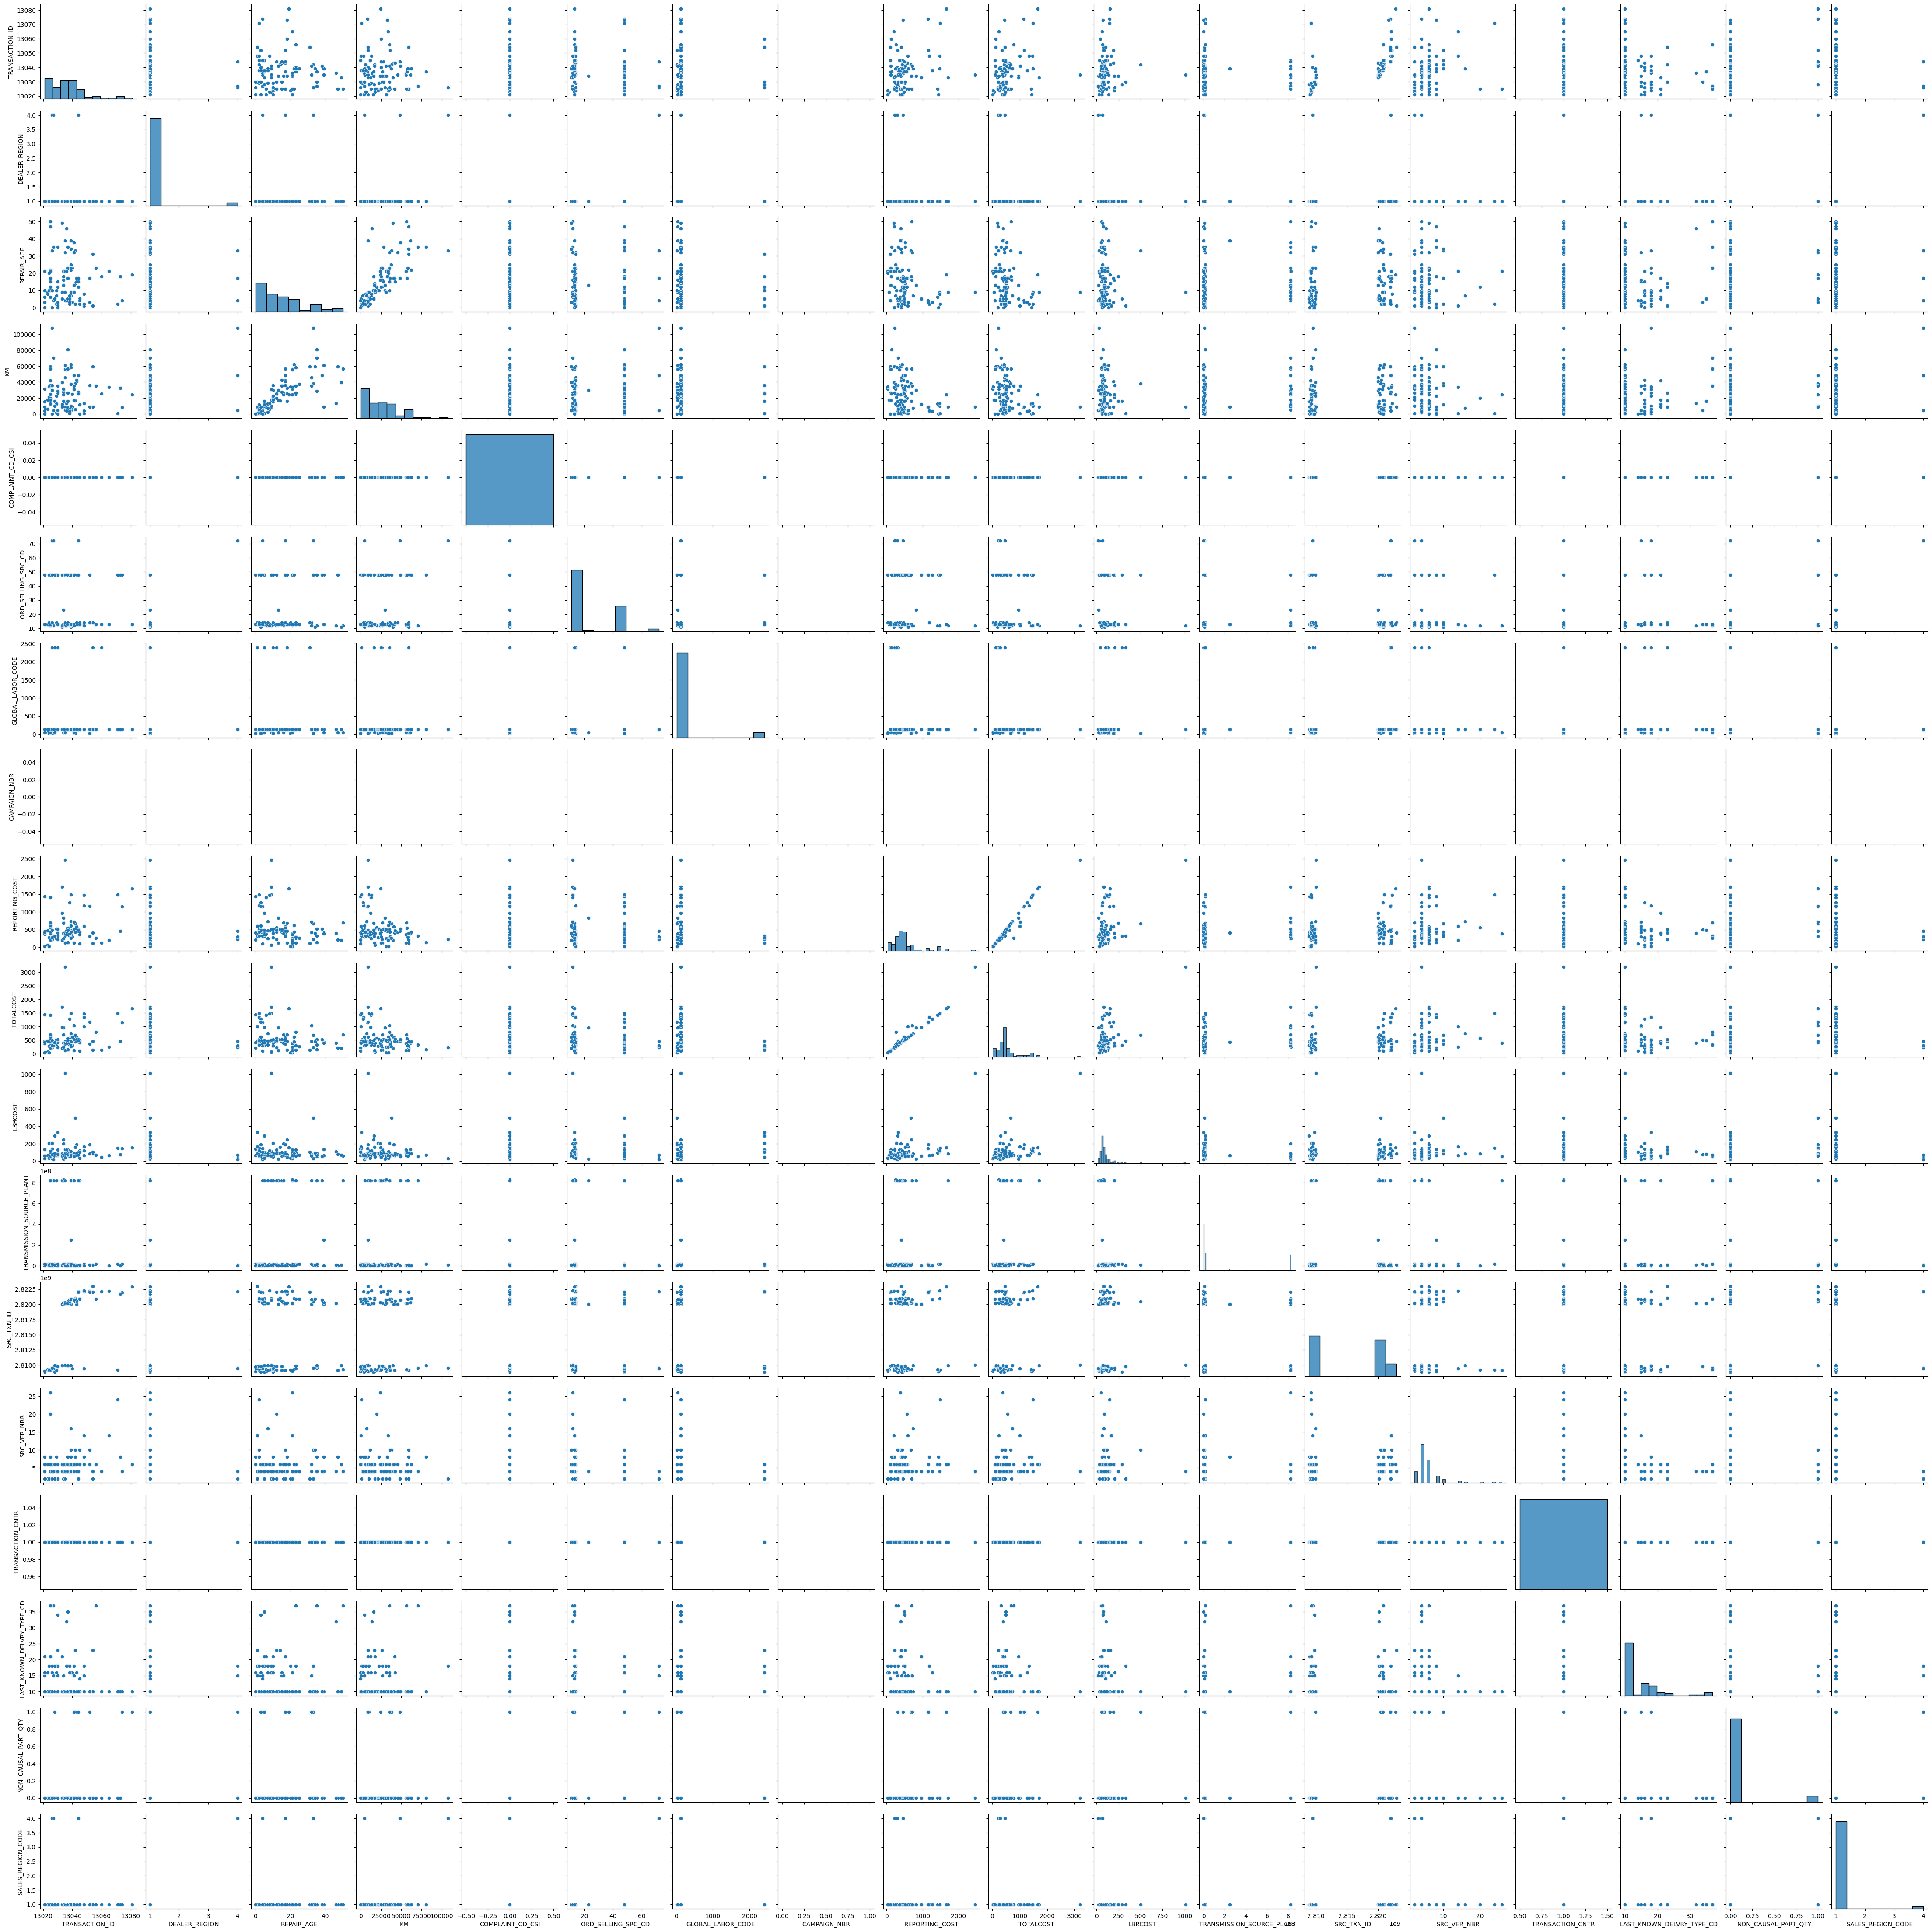

In [14]:
sns.pairplot(df)

#Distribution for each columm

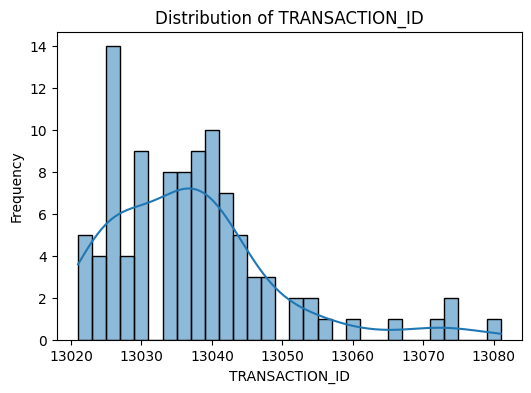

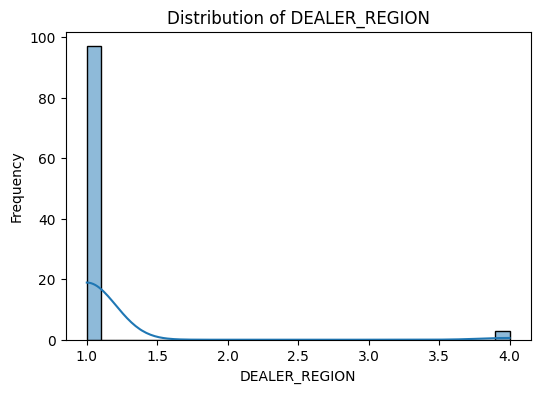

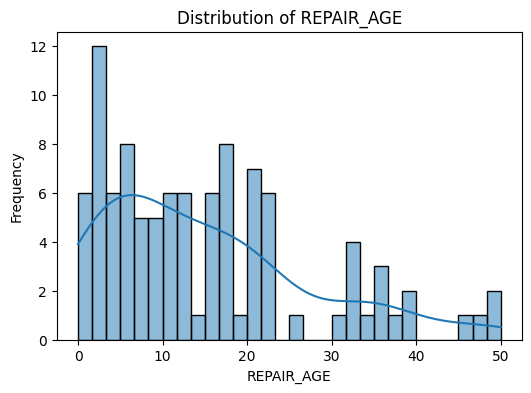

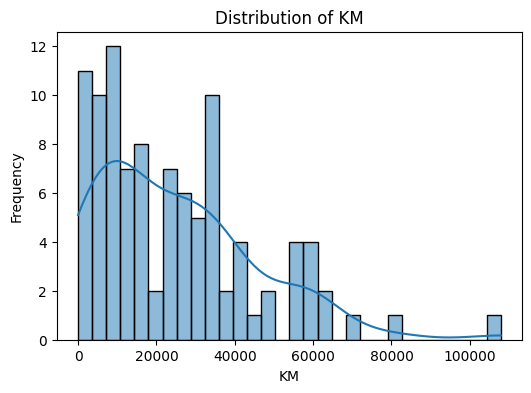

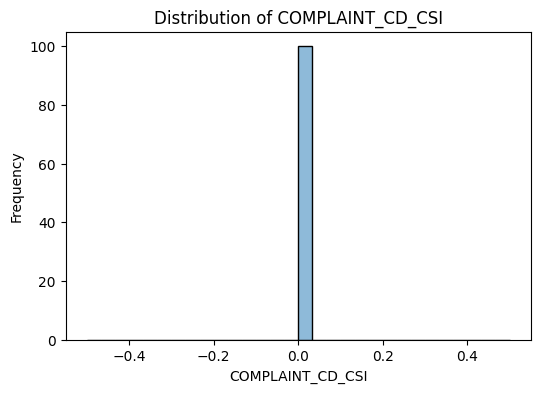

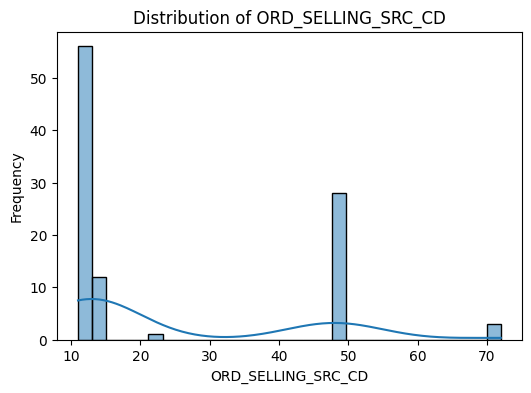

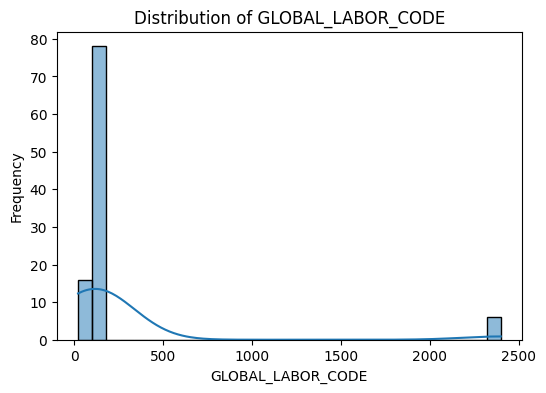

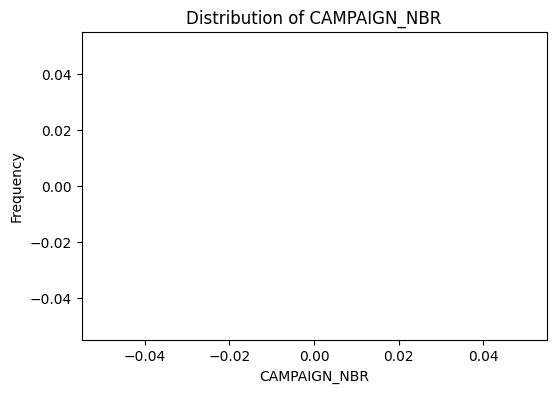

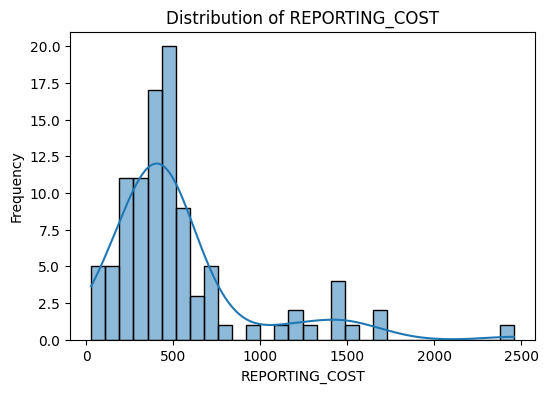

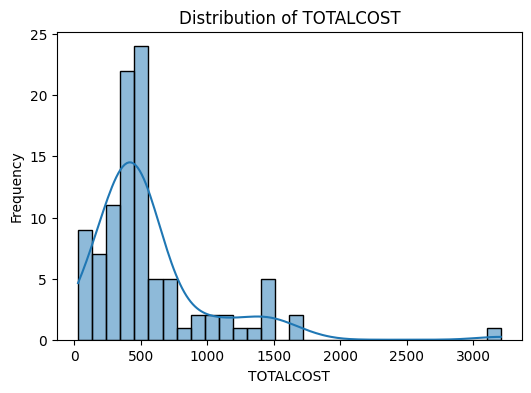

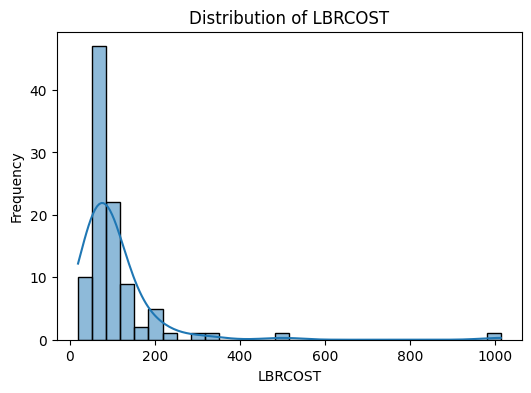

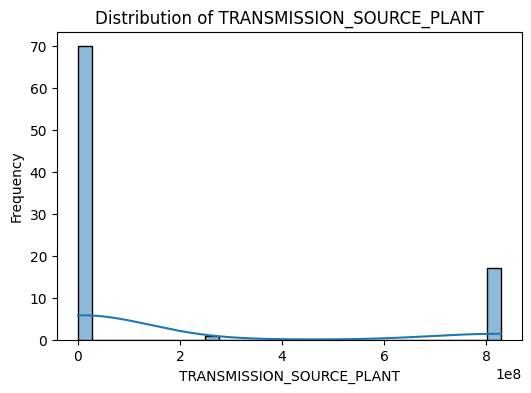

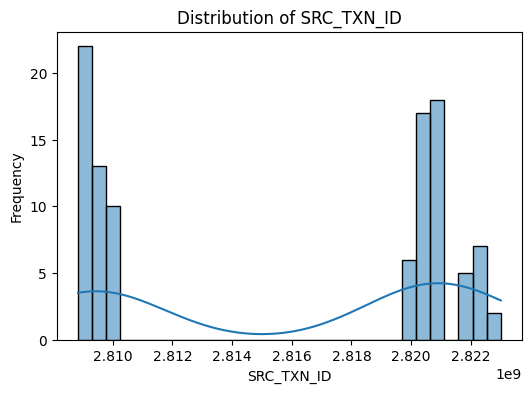

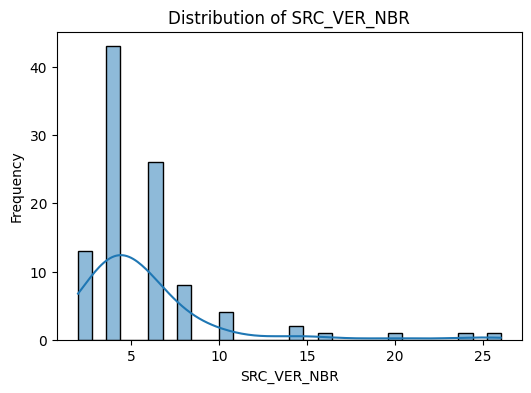

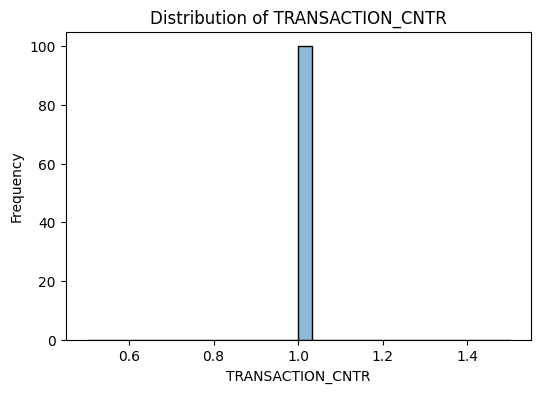

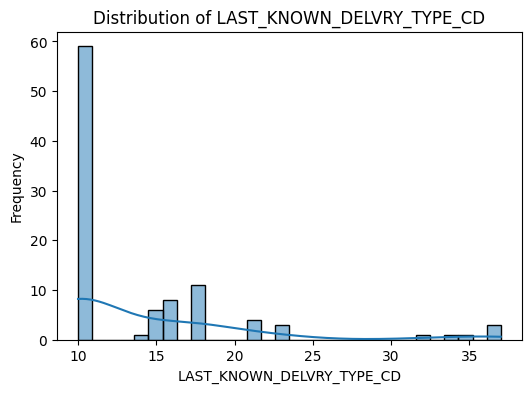

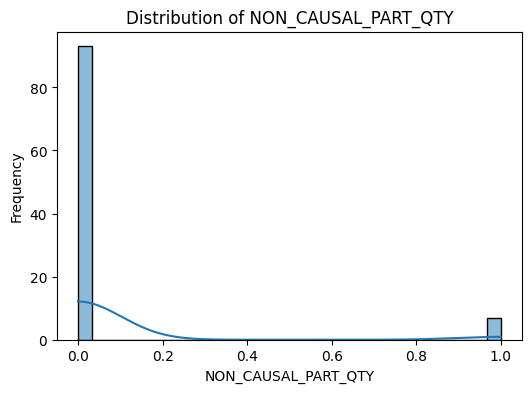

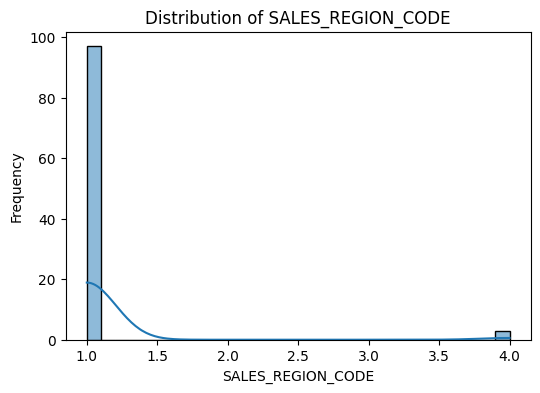

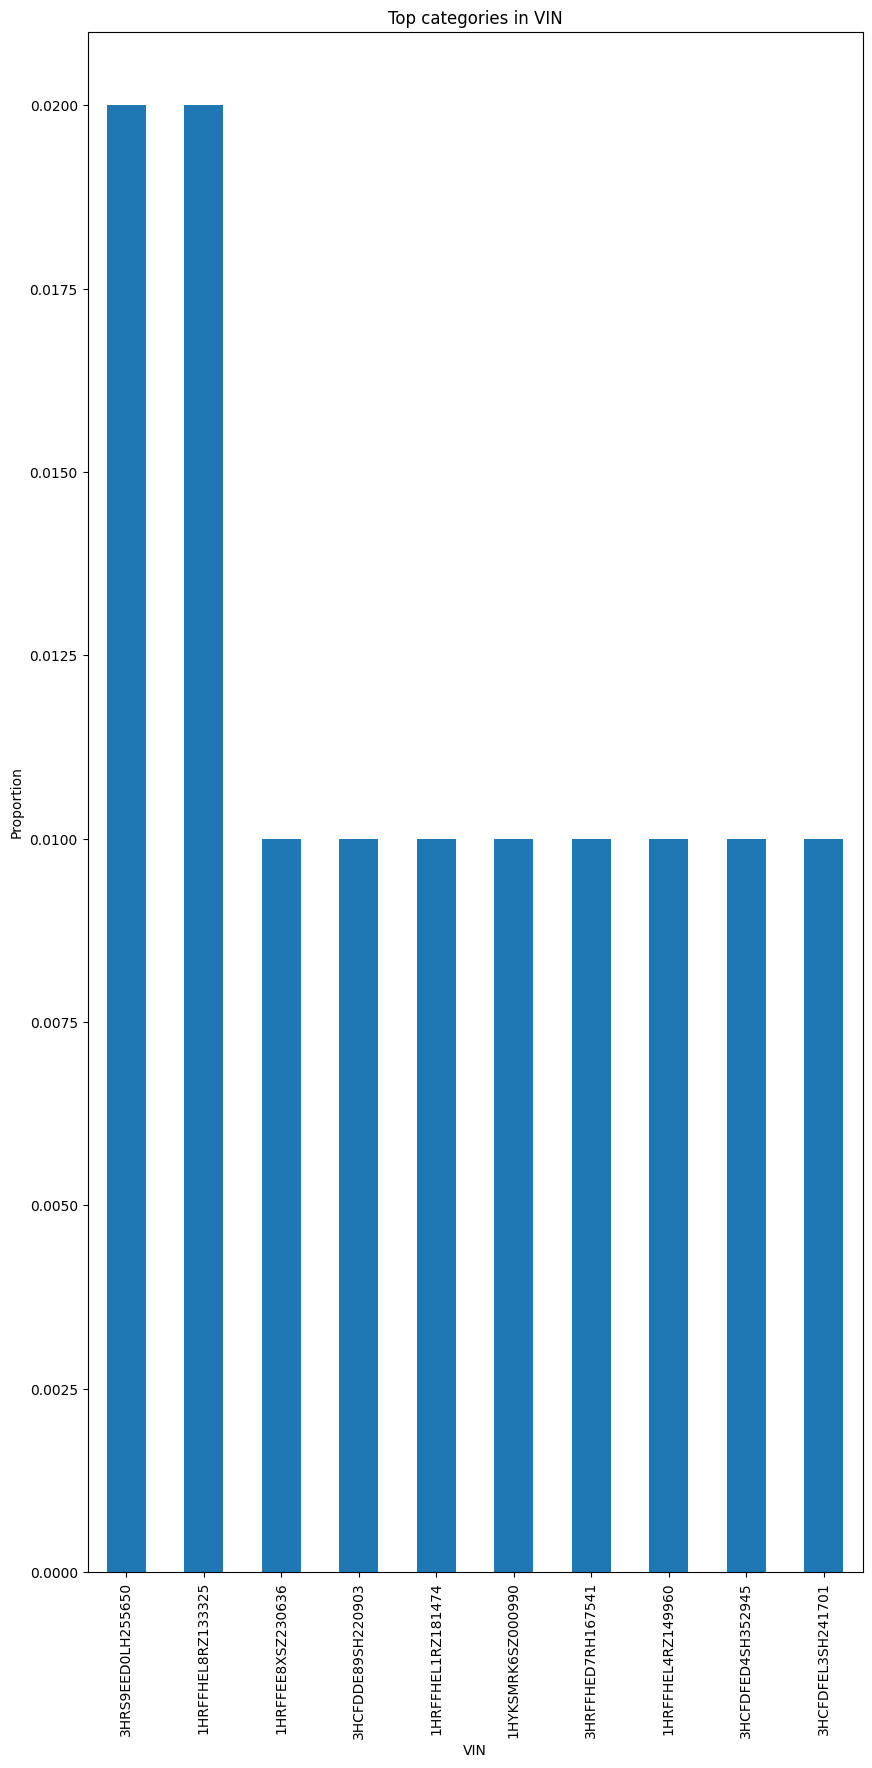

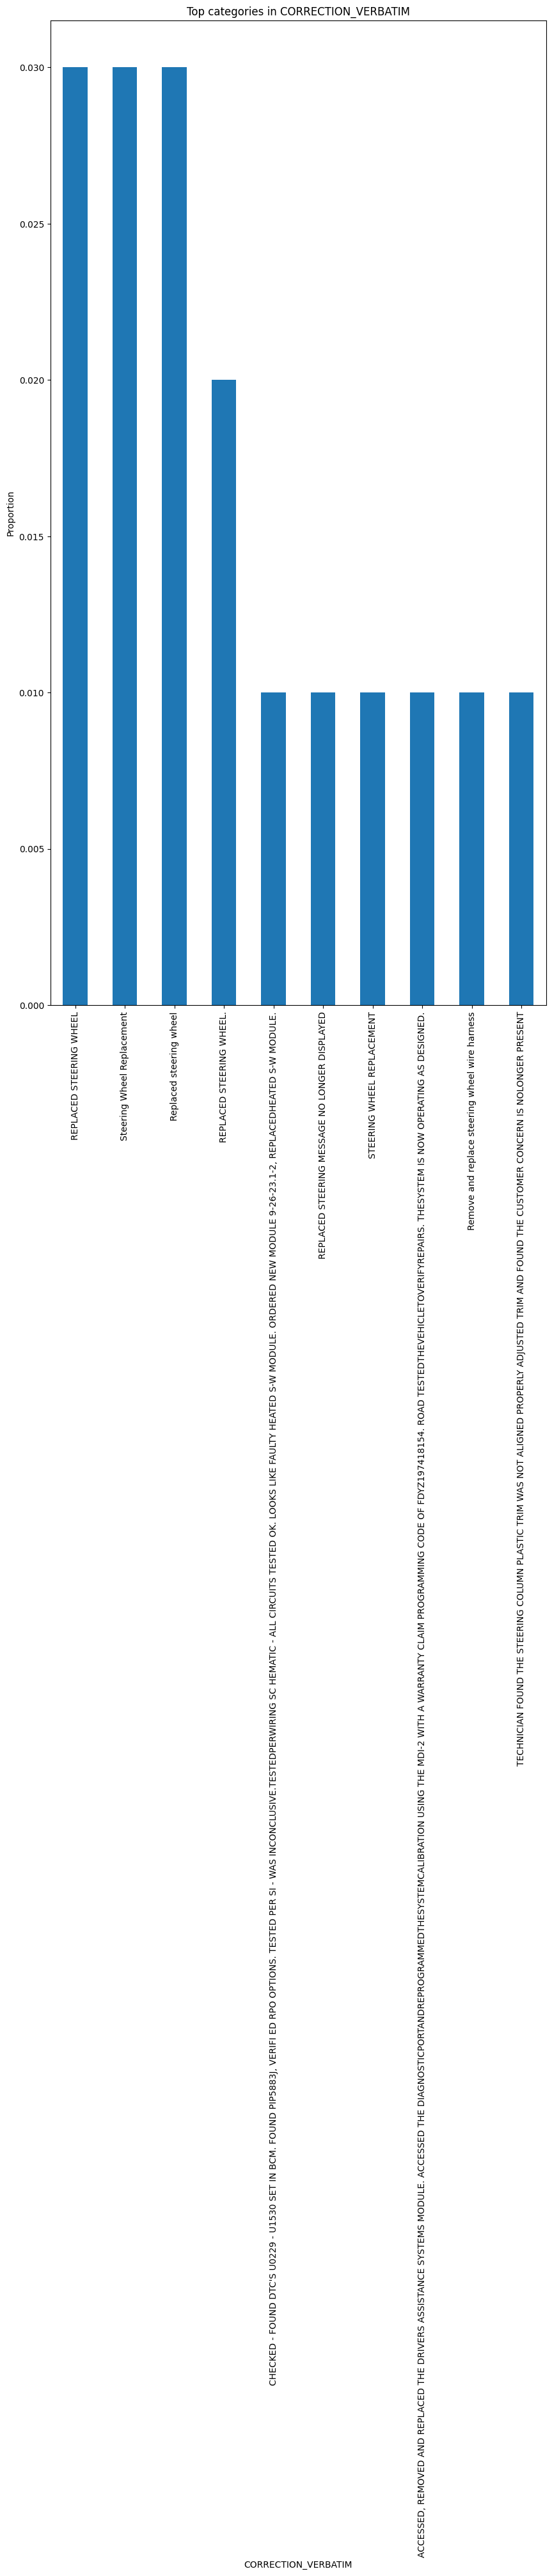

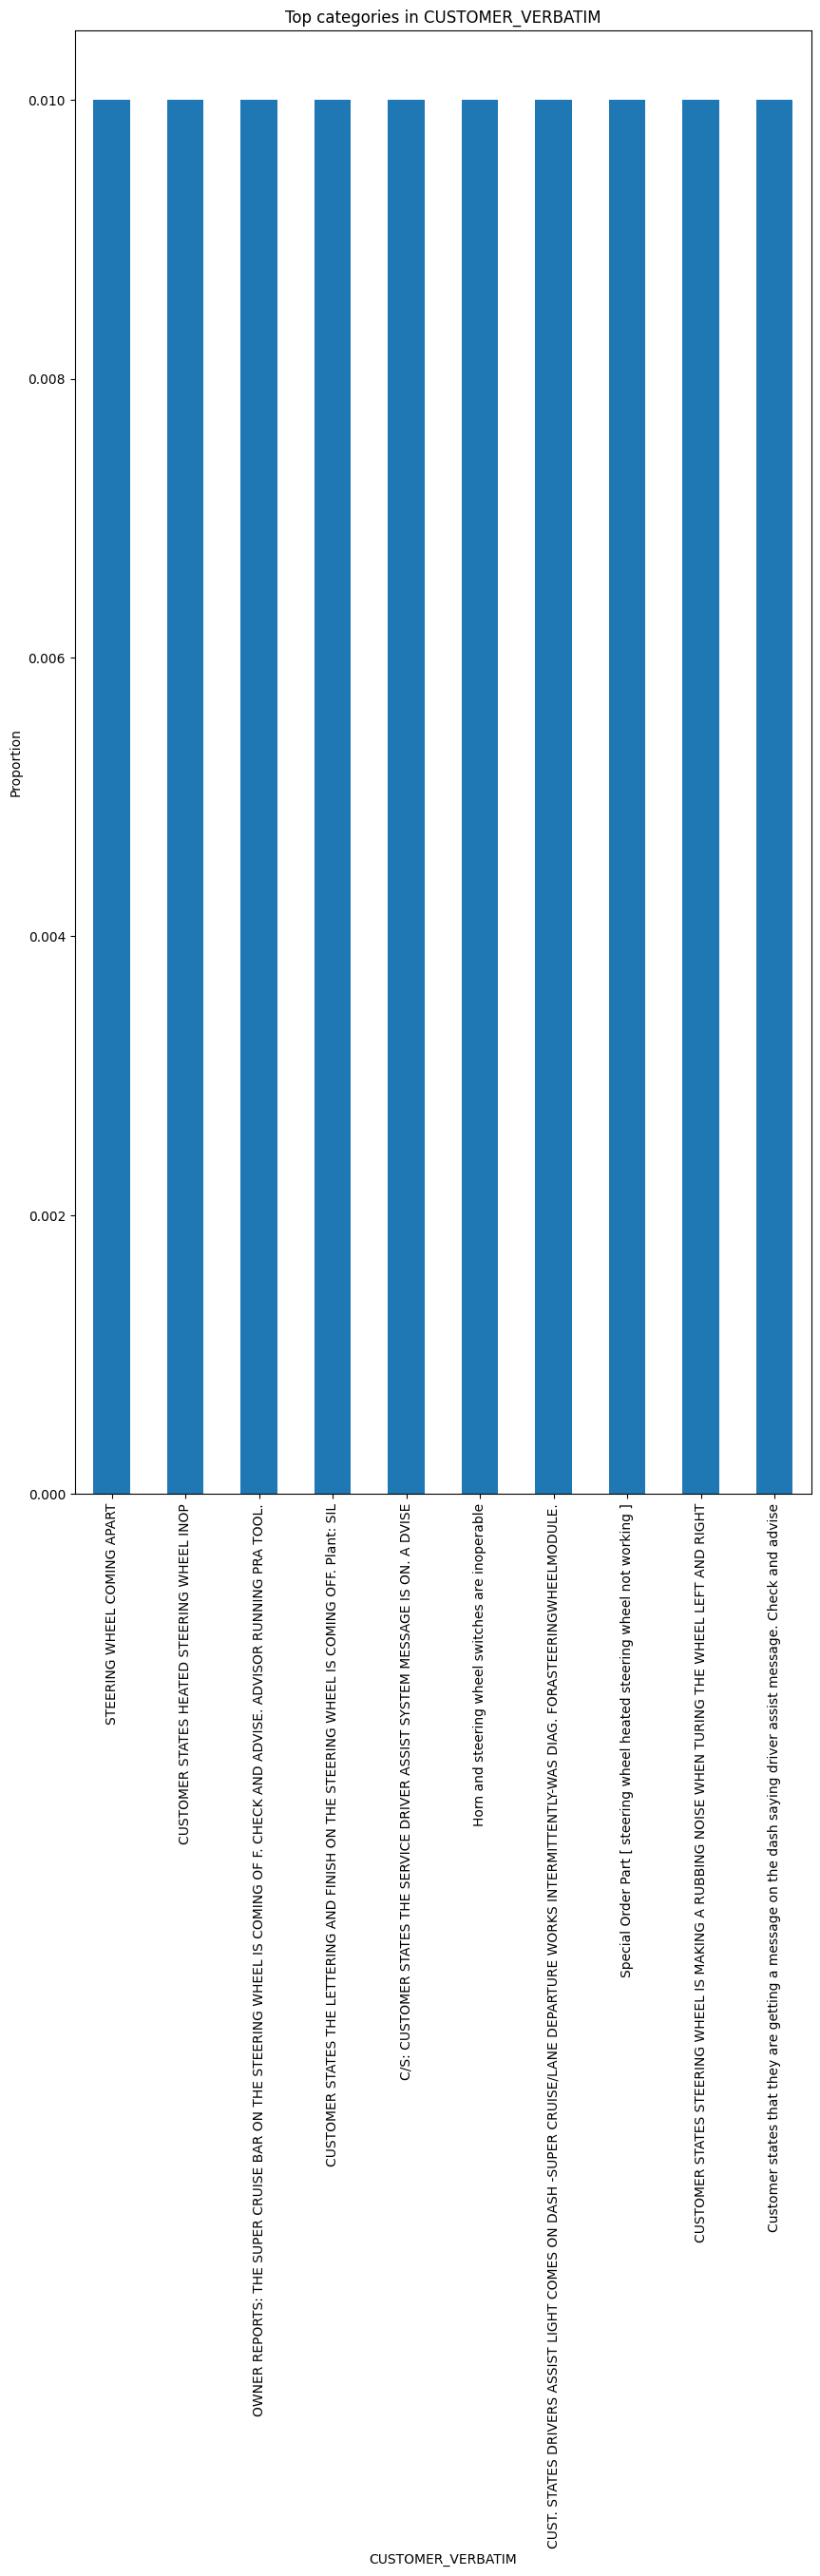

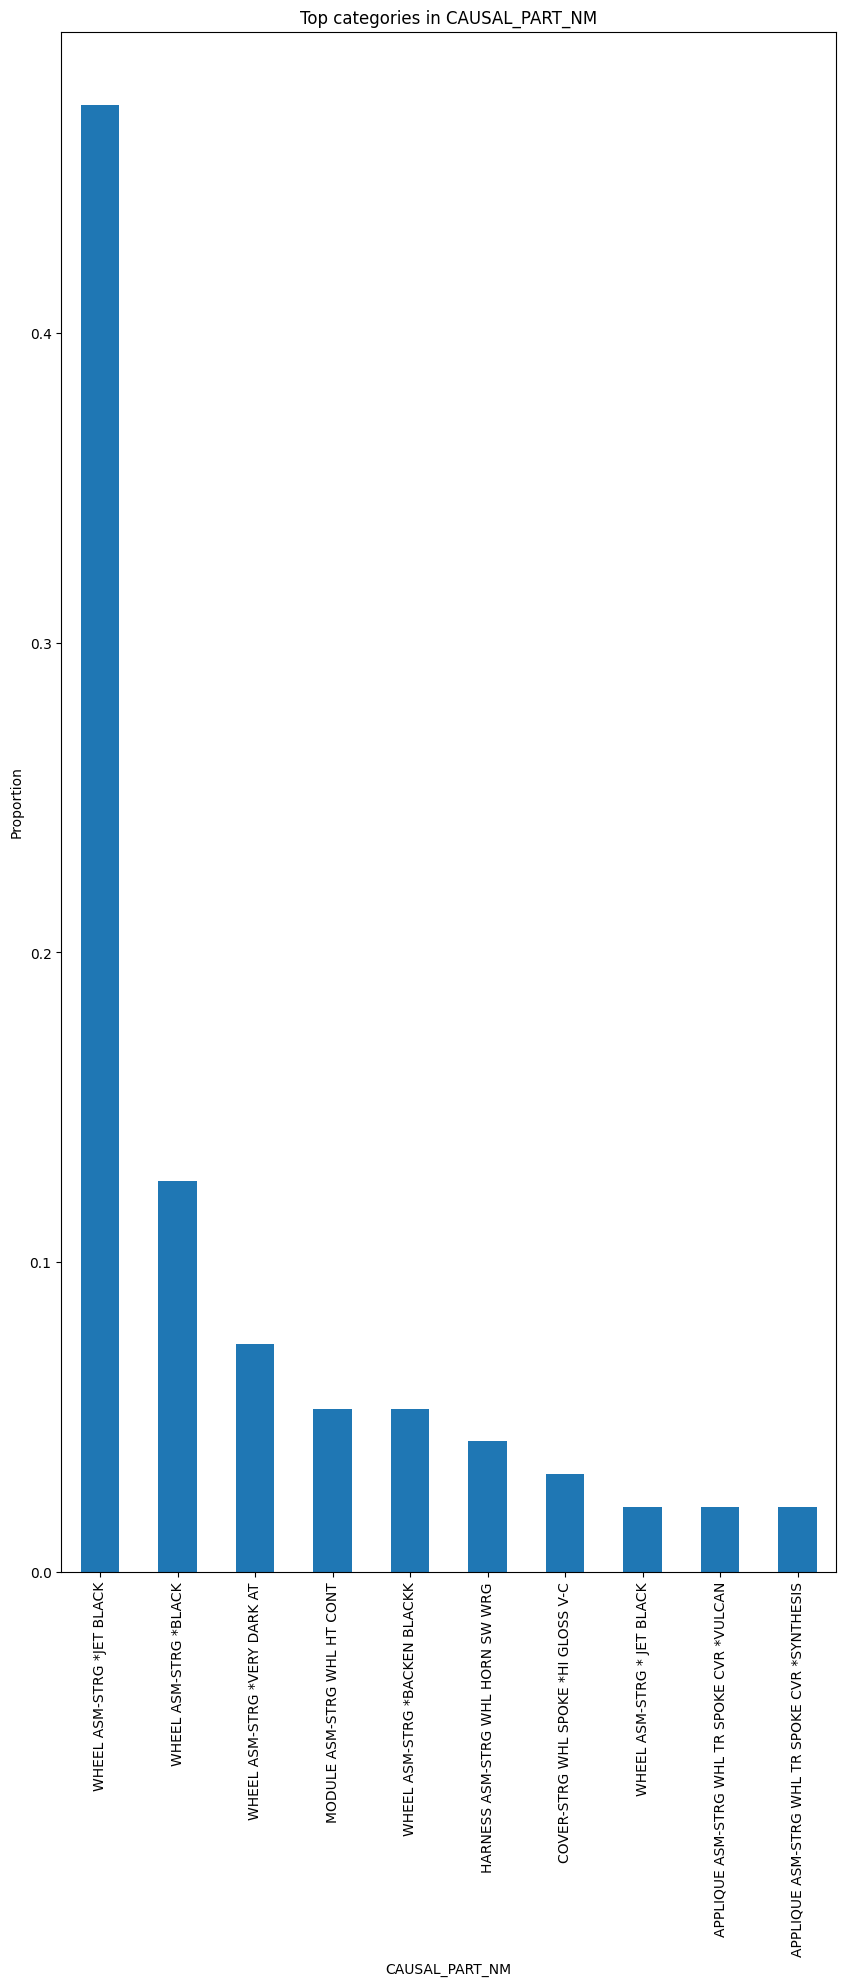

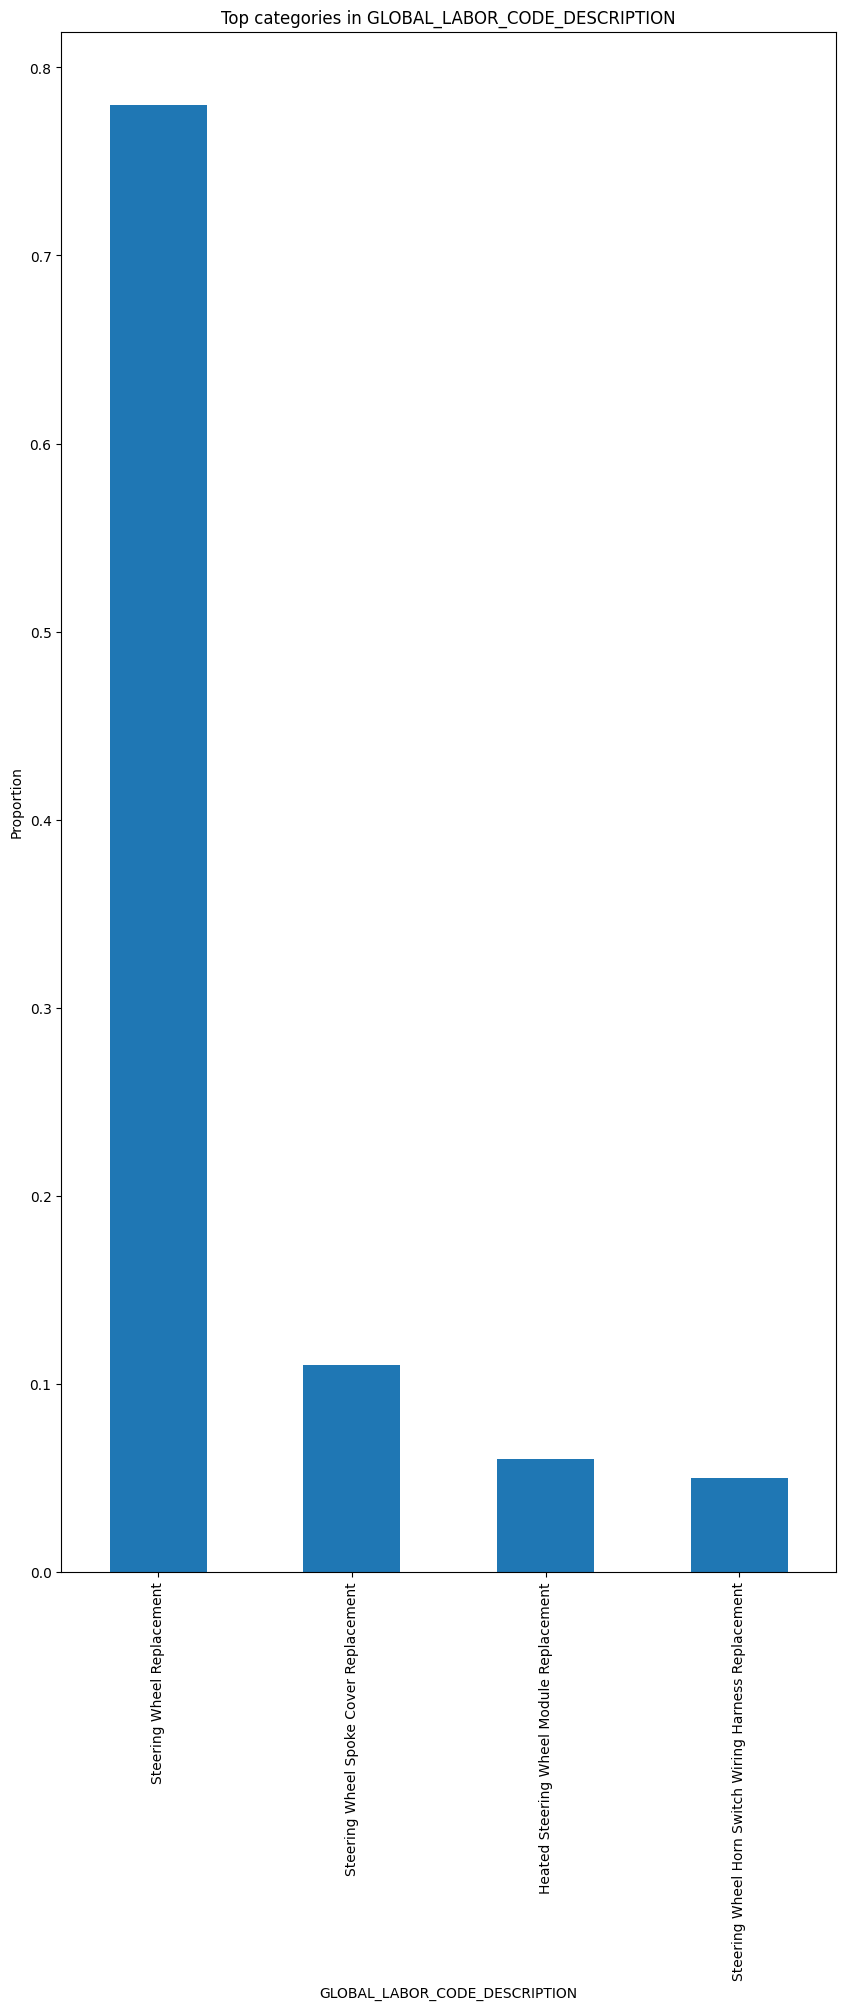

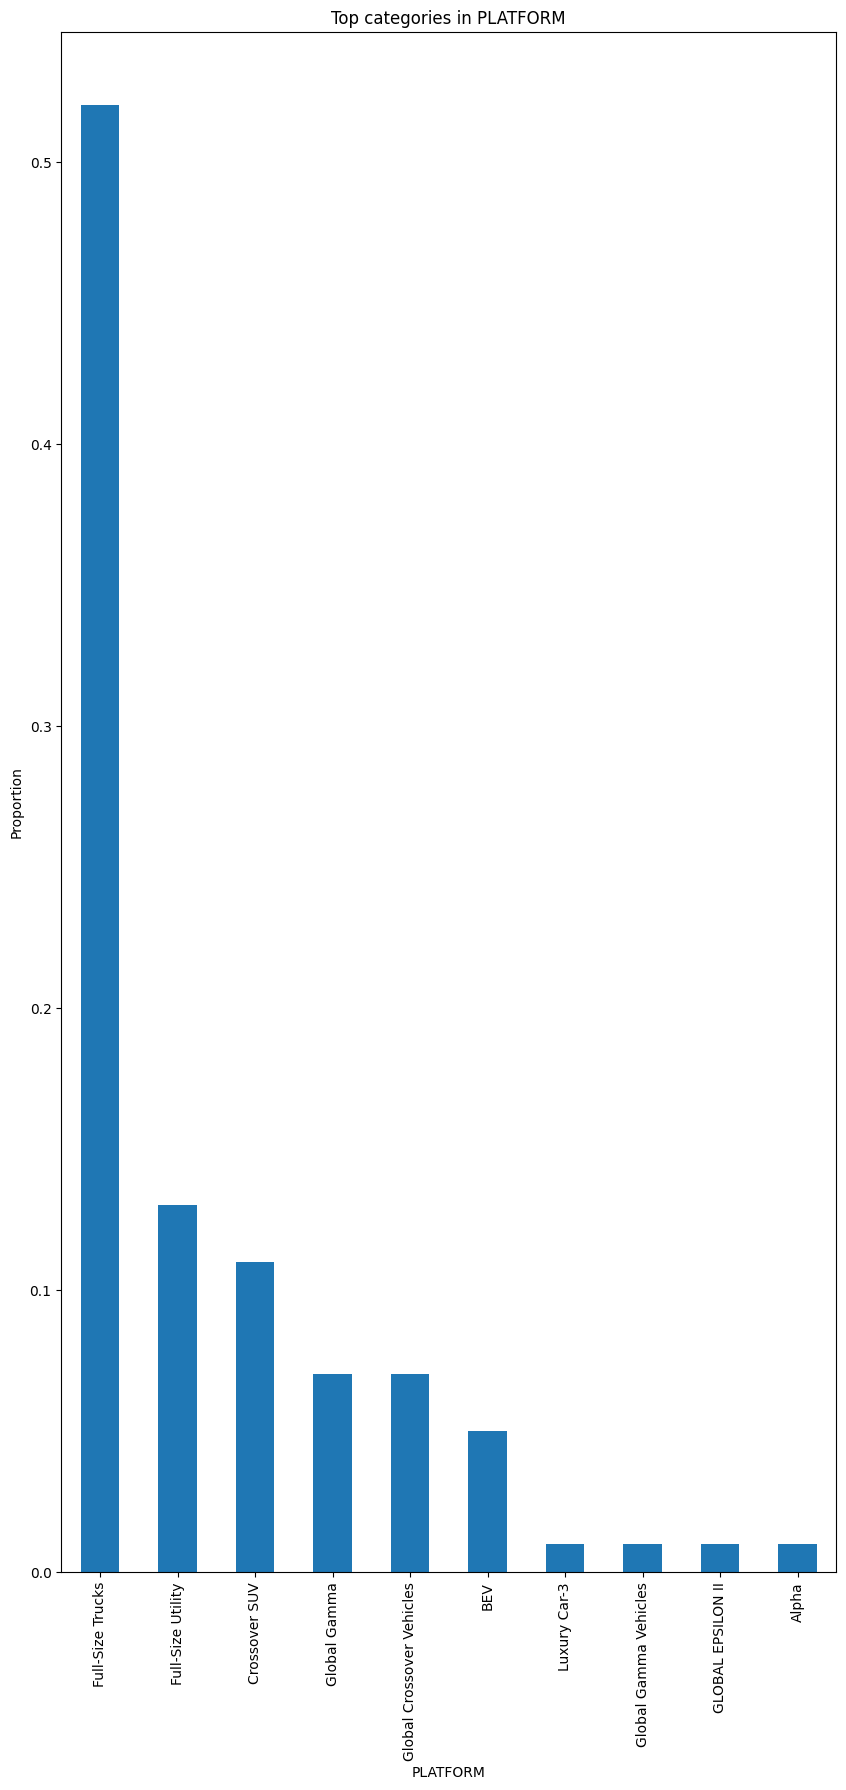

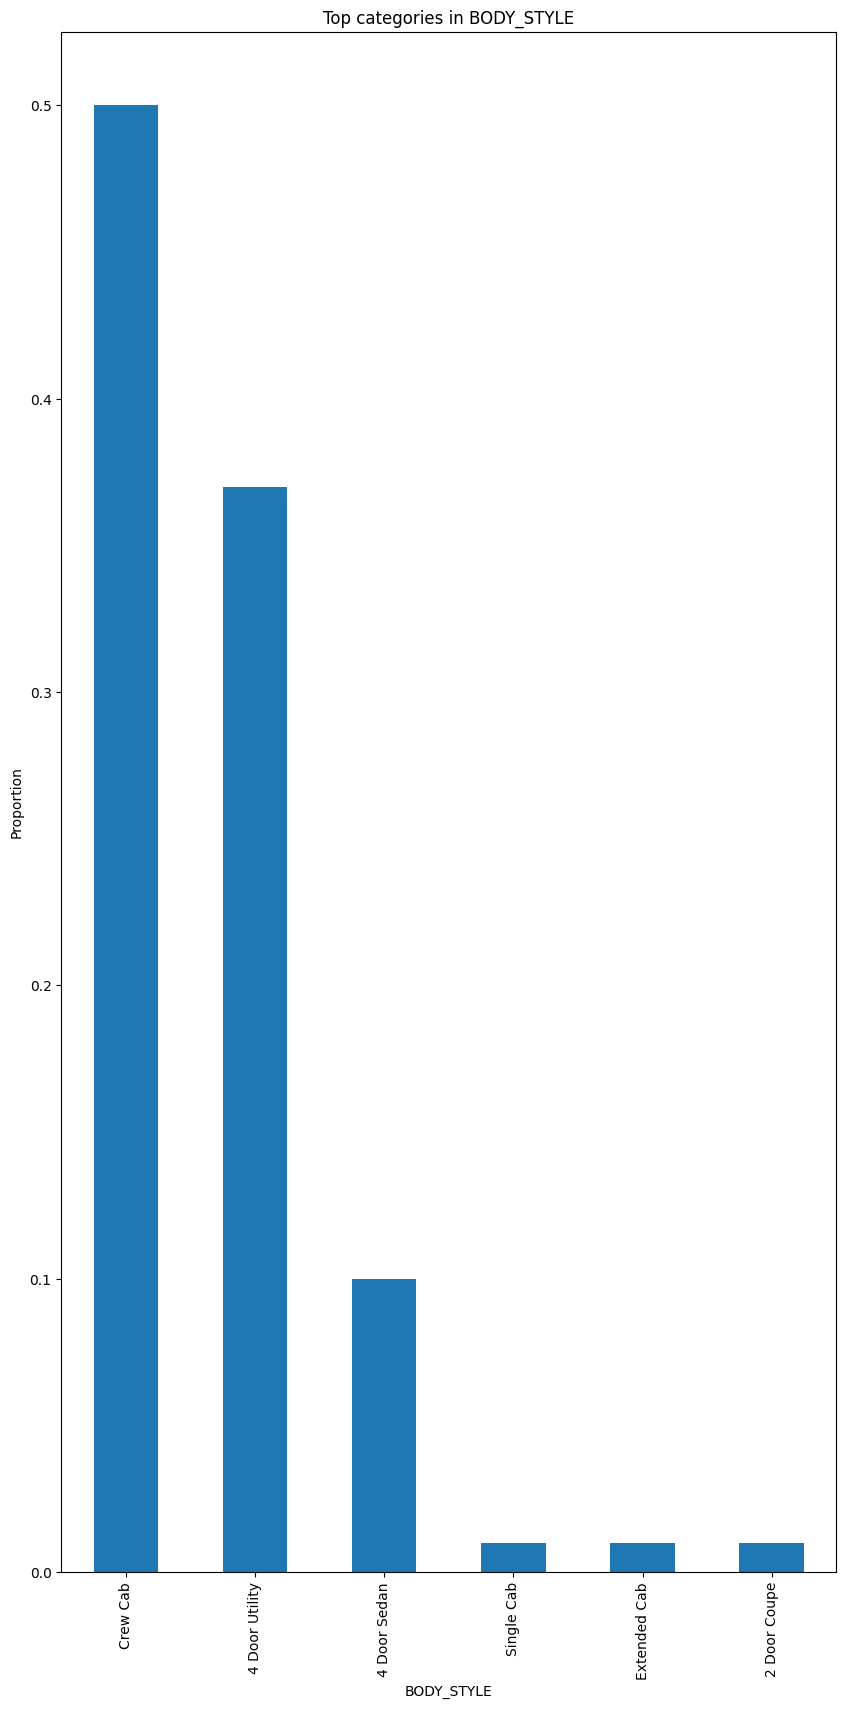

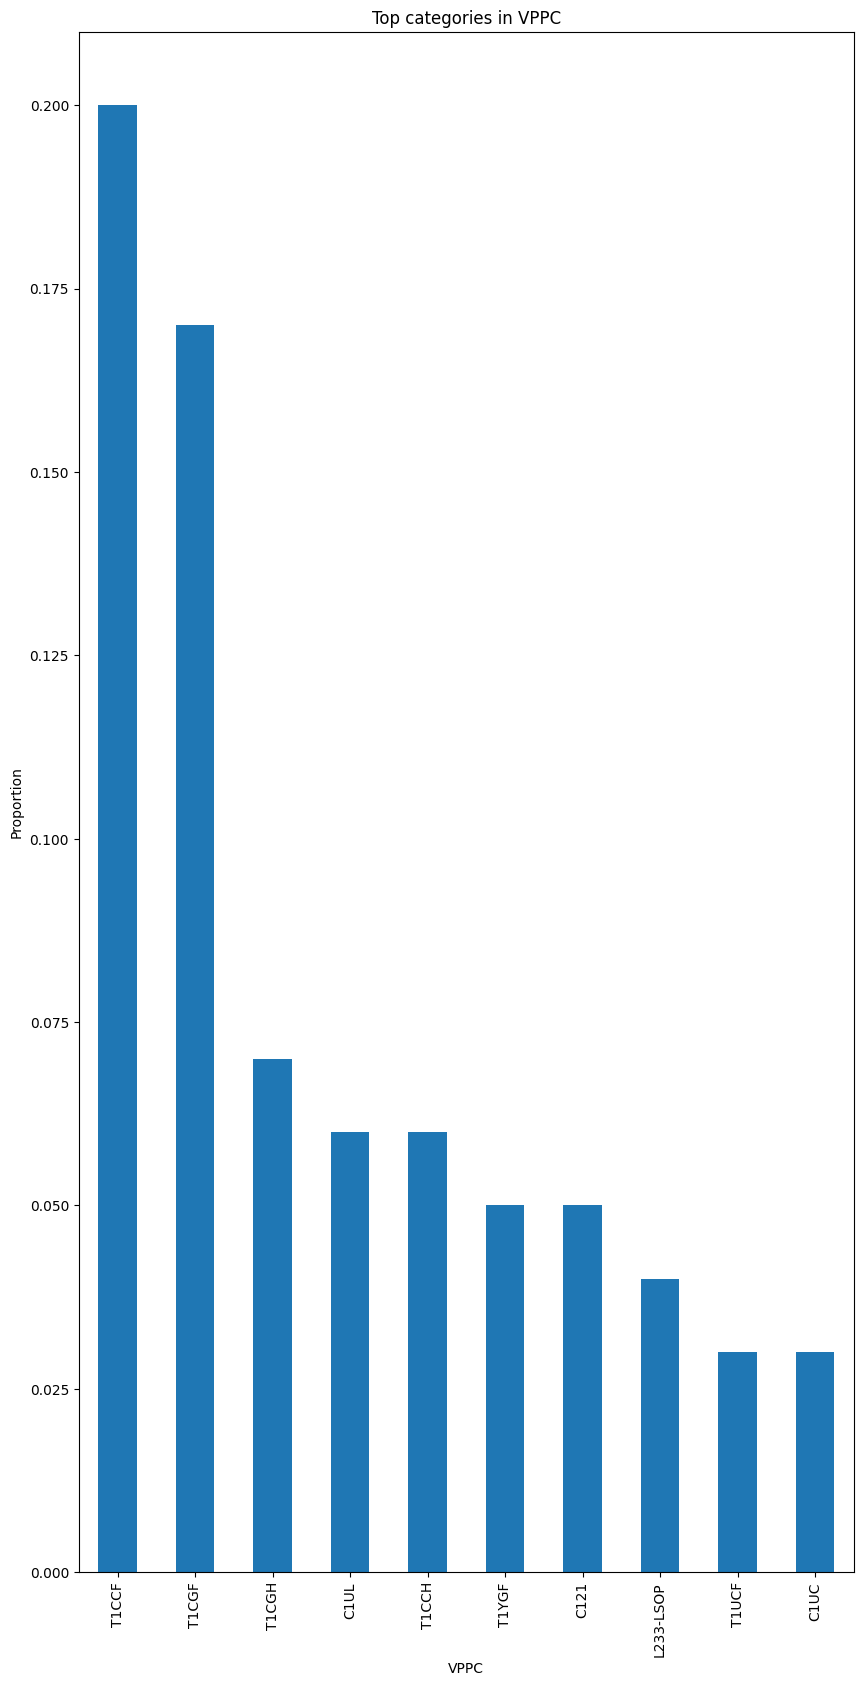

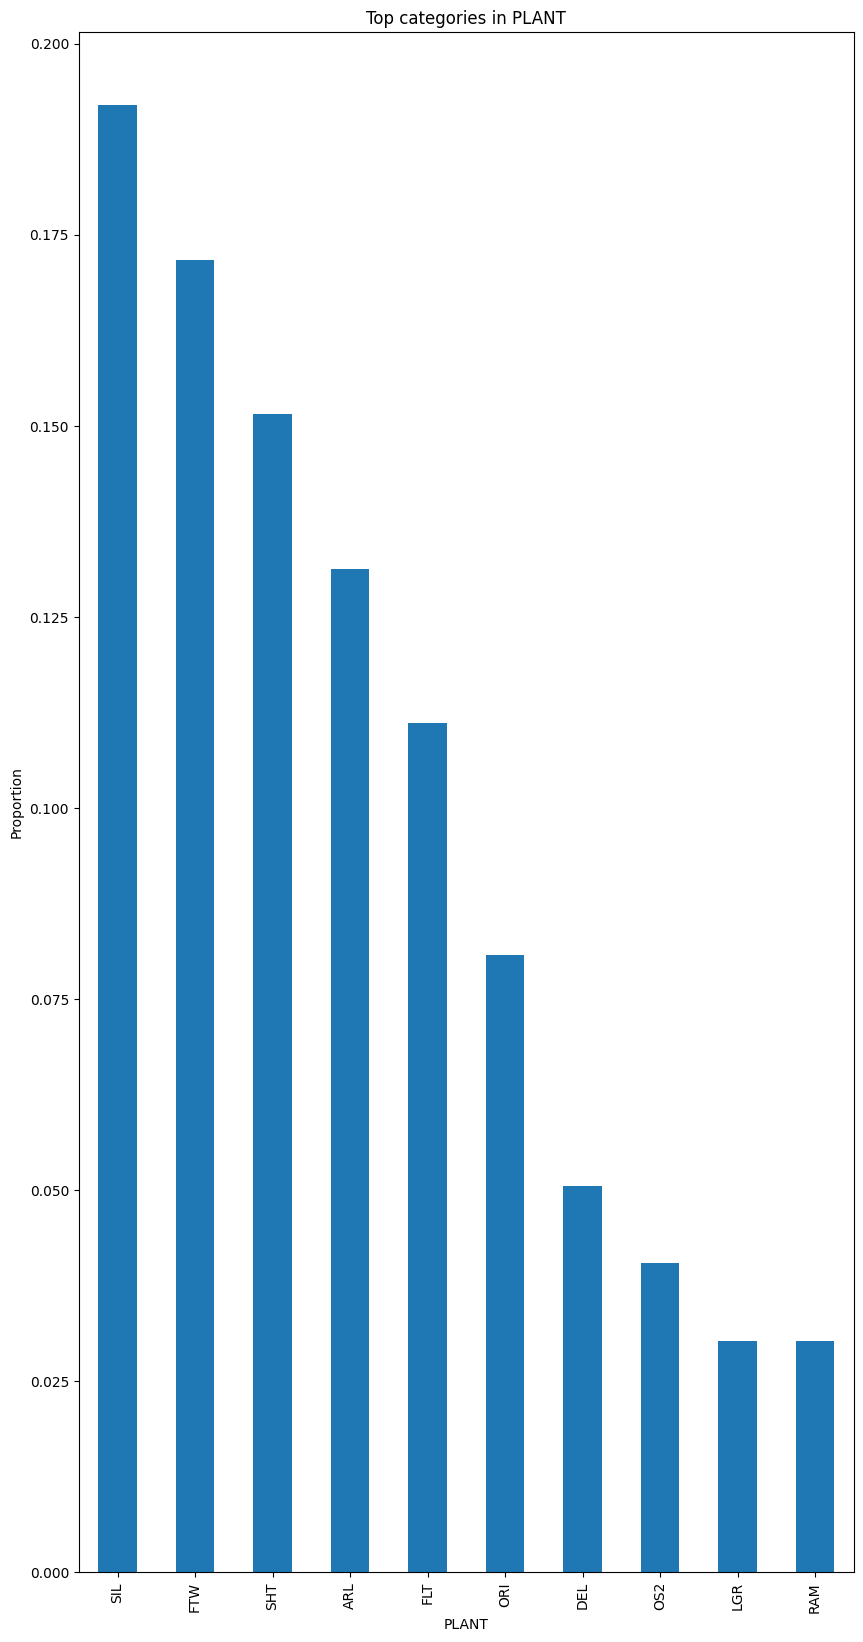

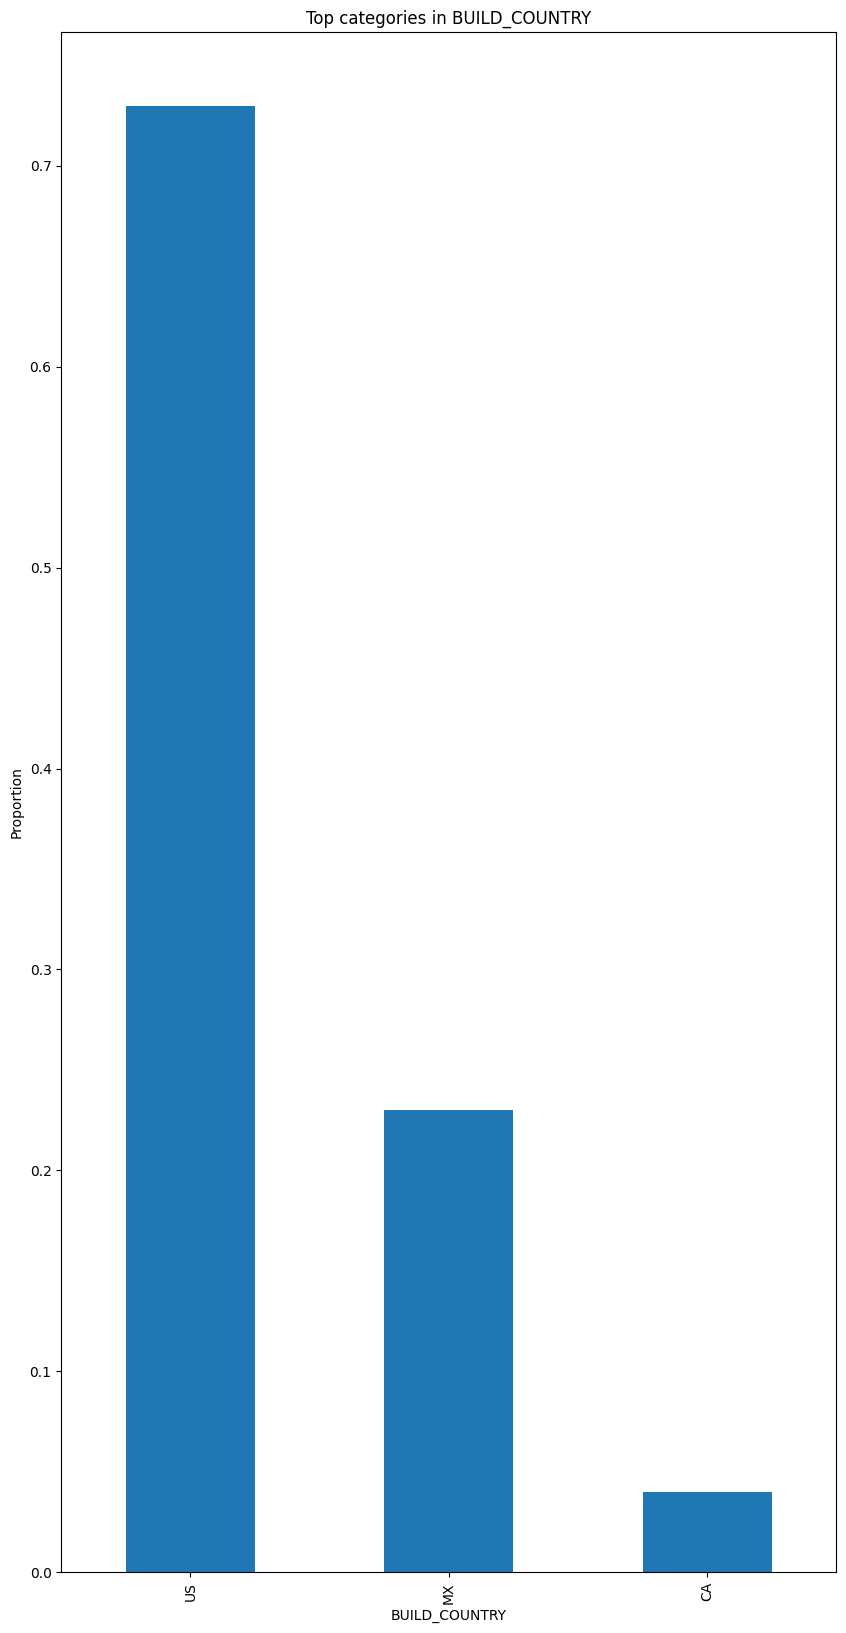

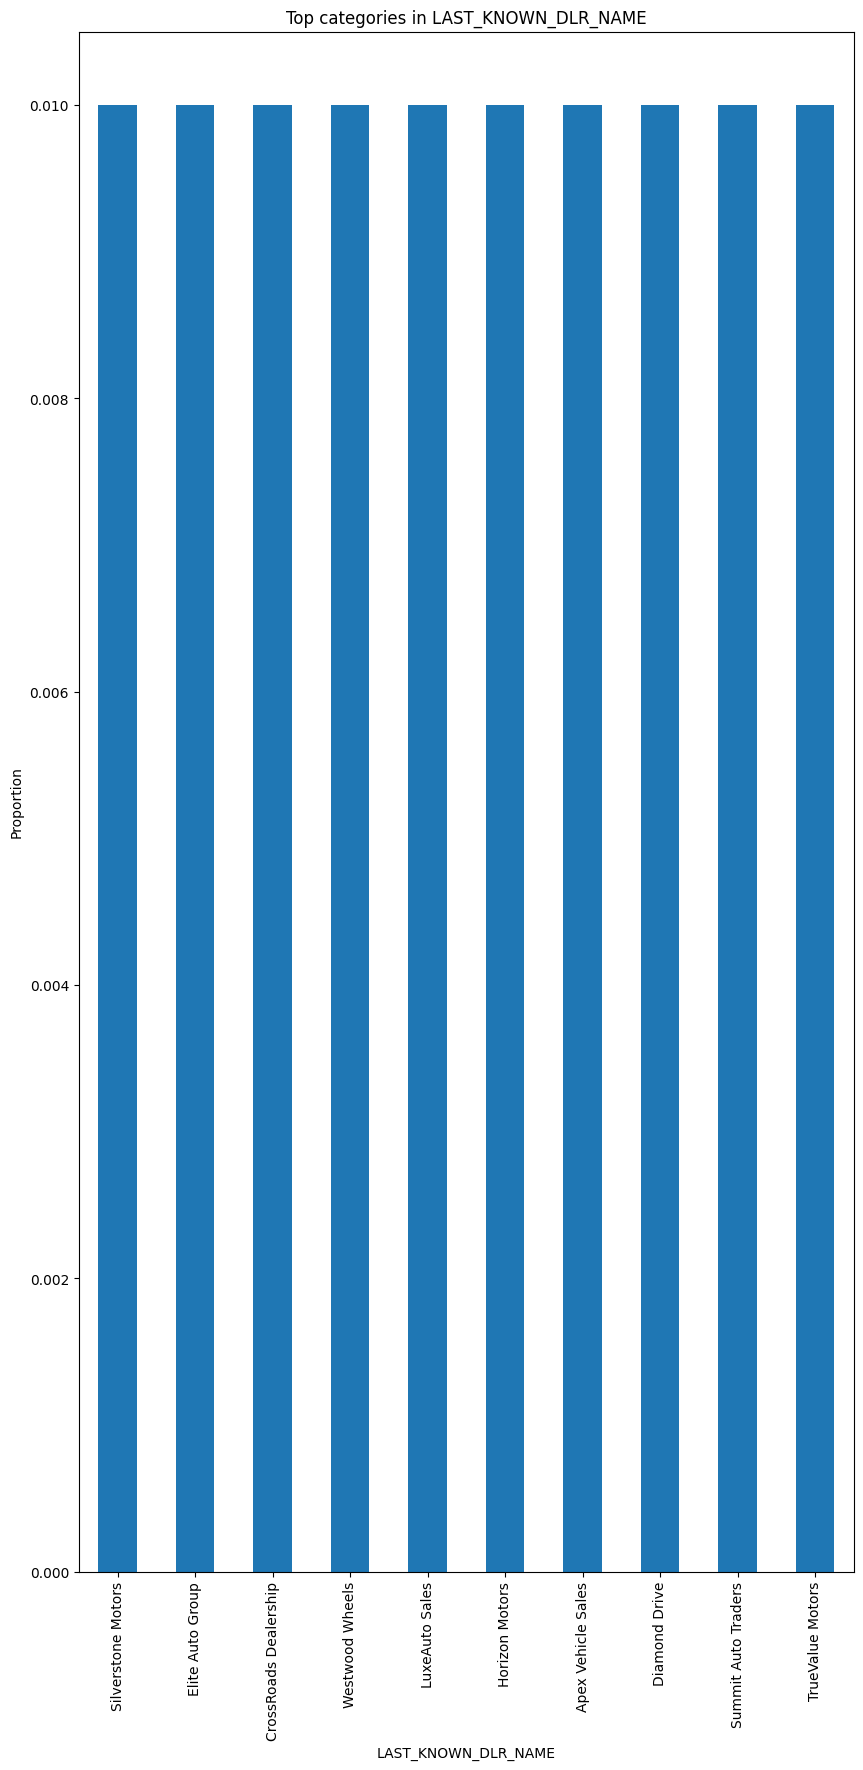

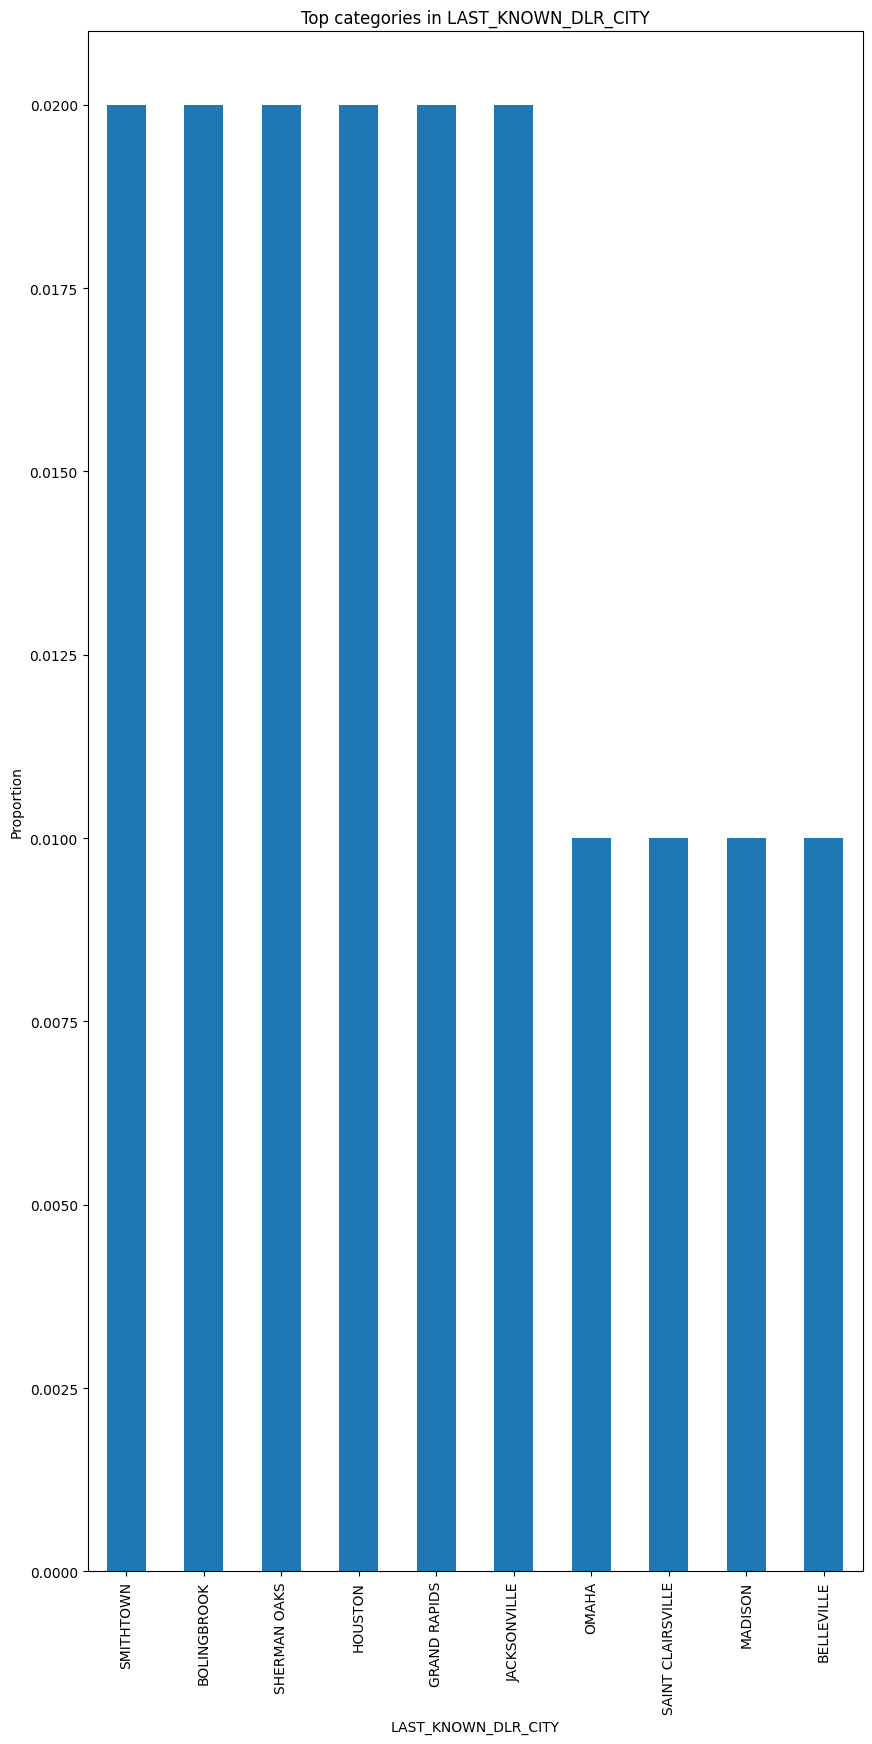

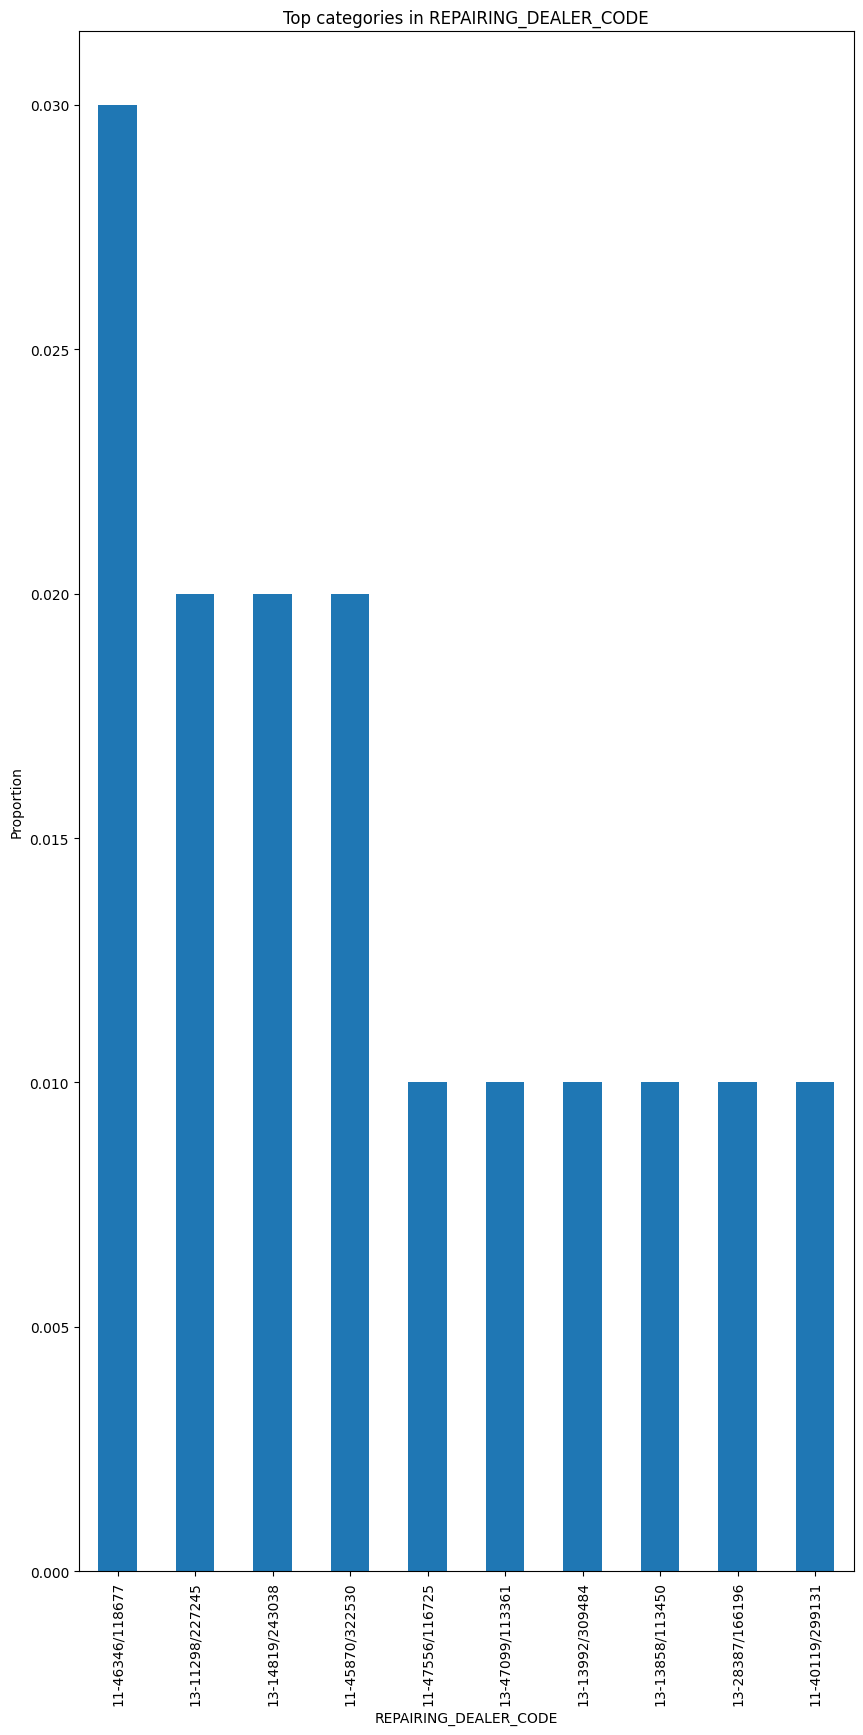

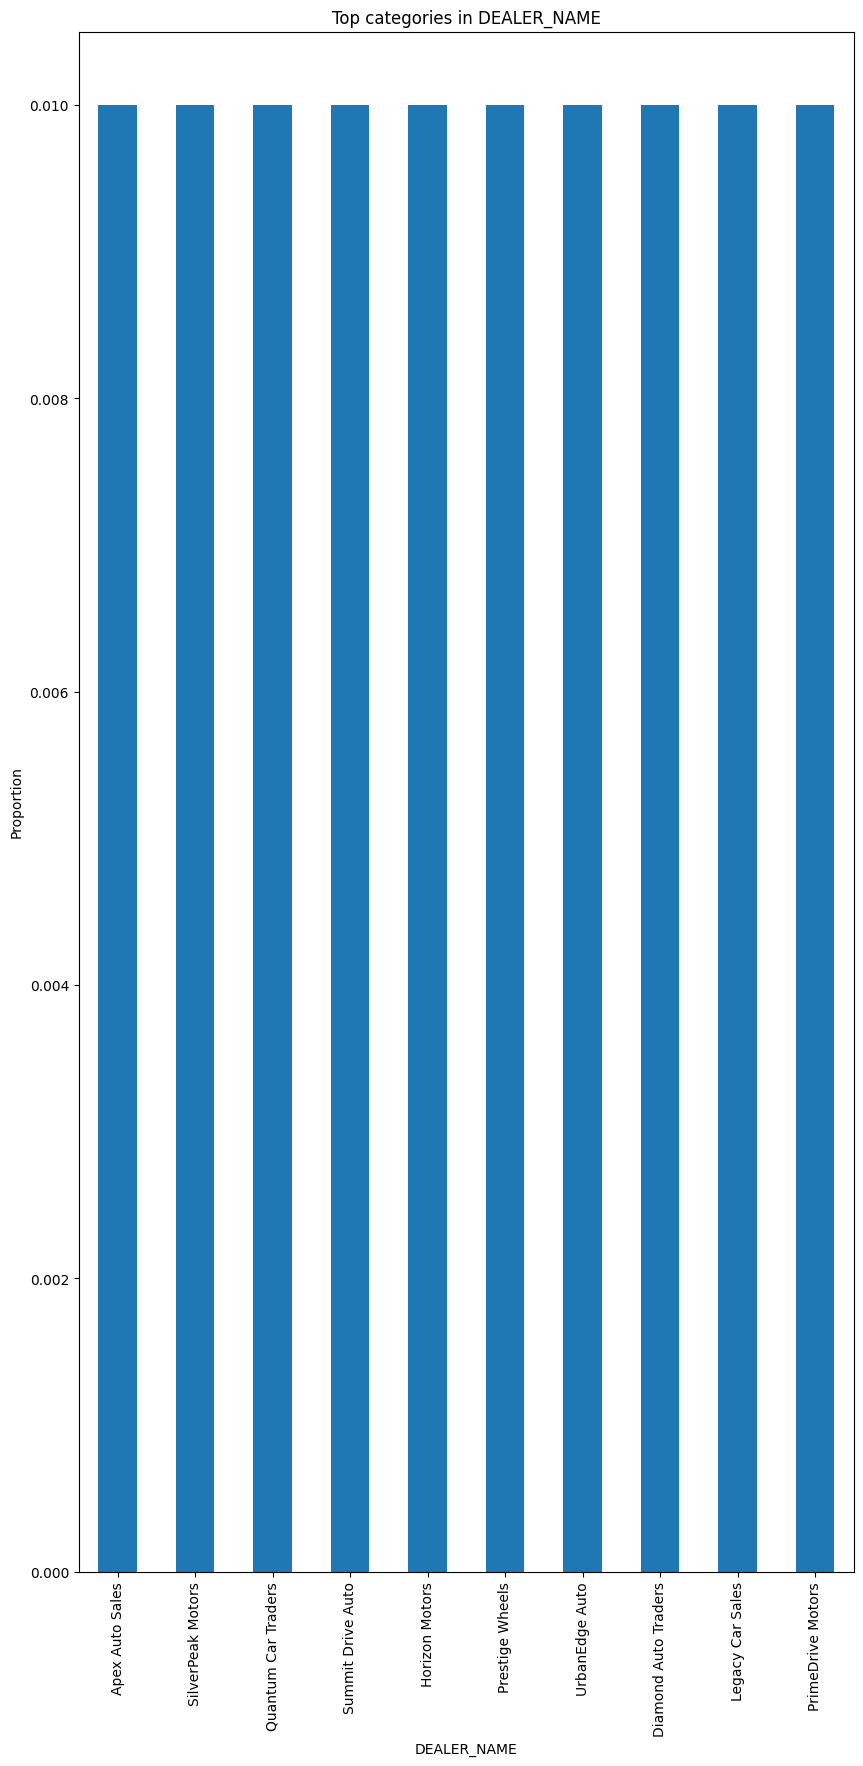

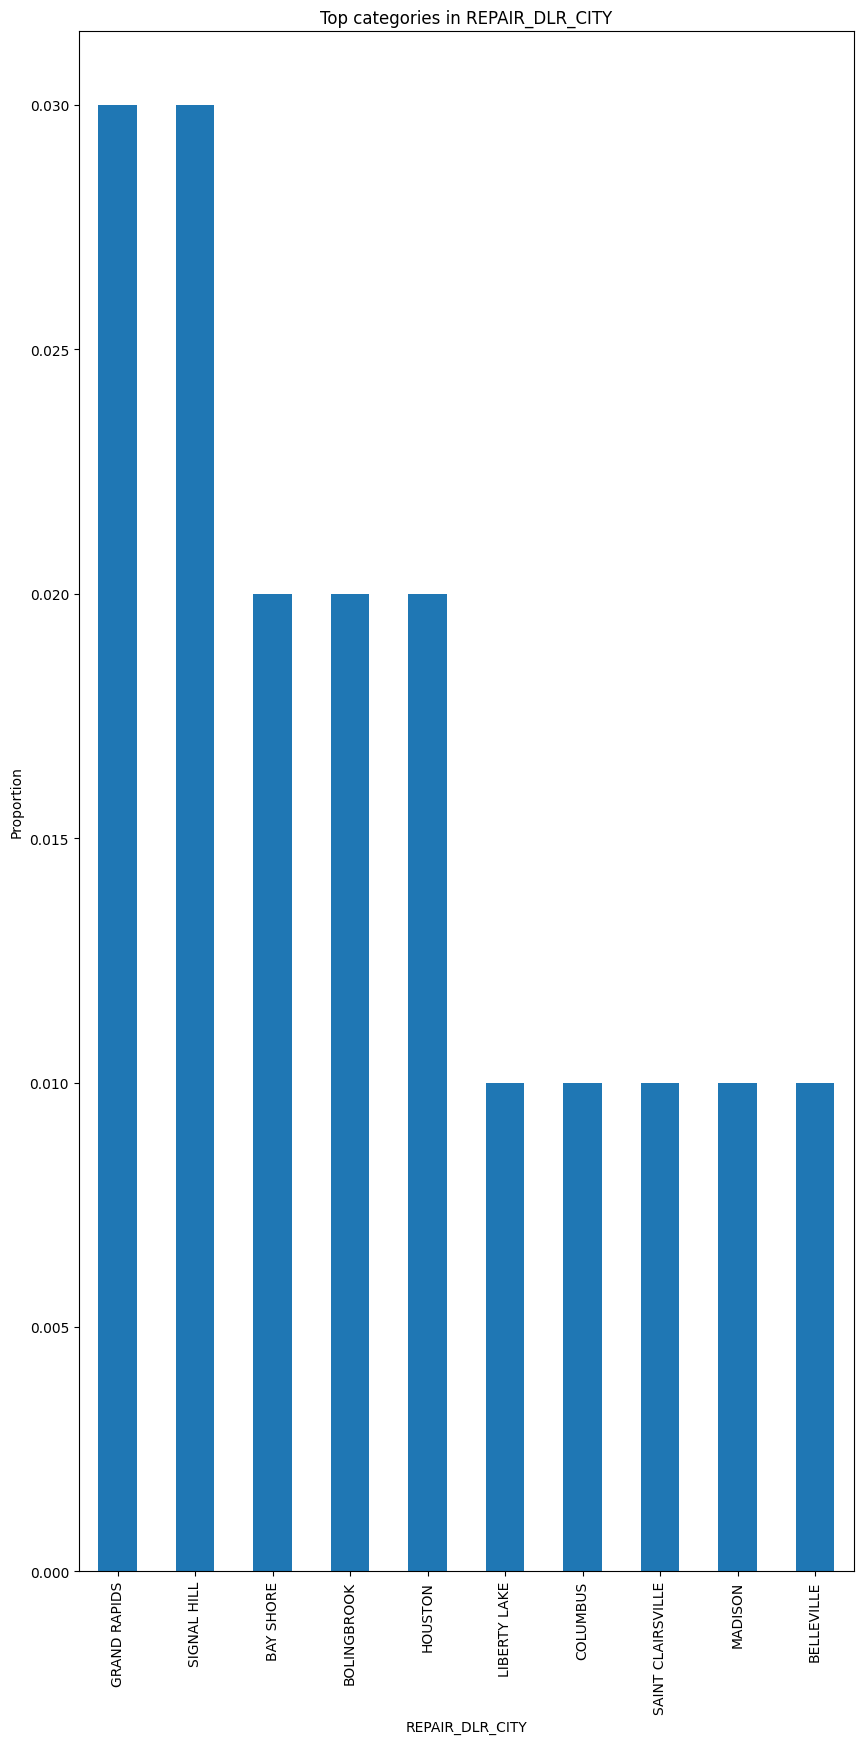

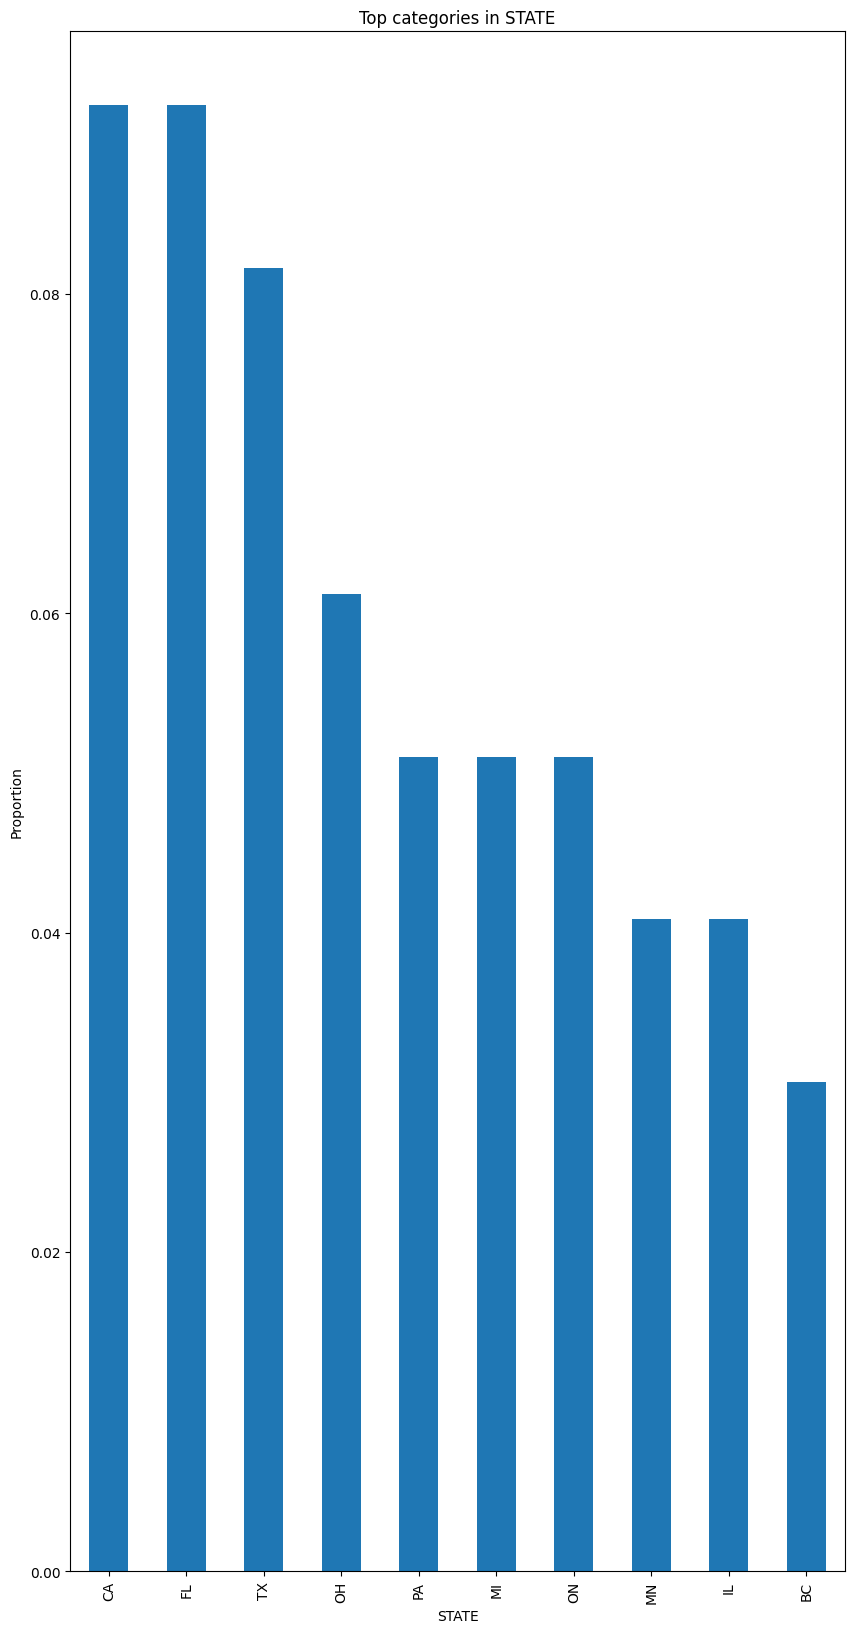

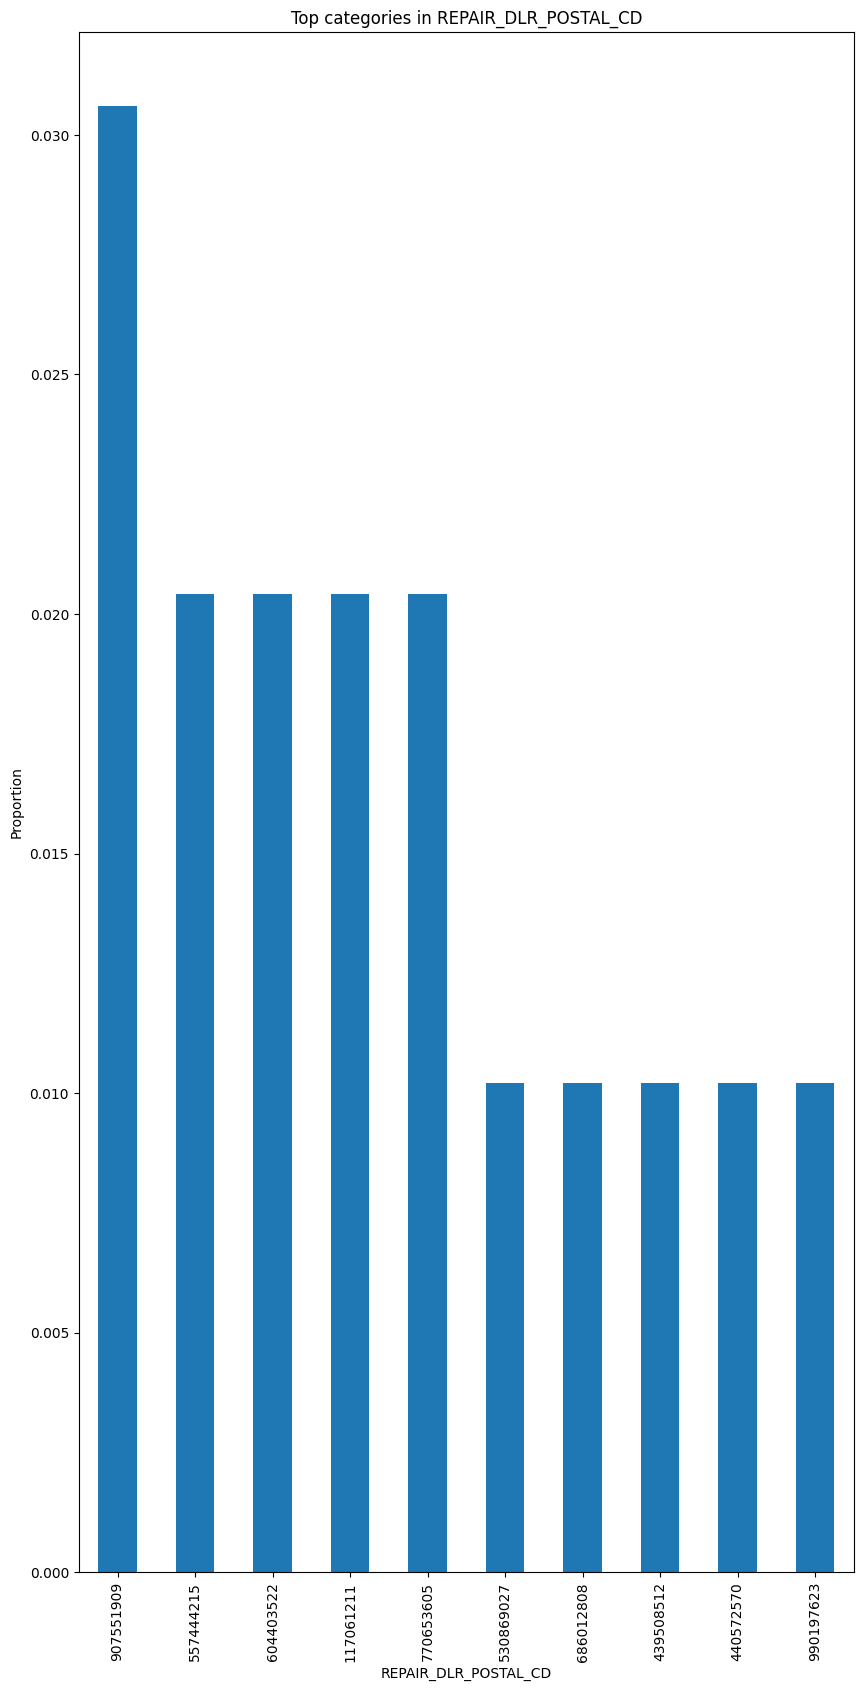

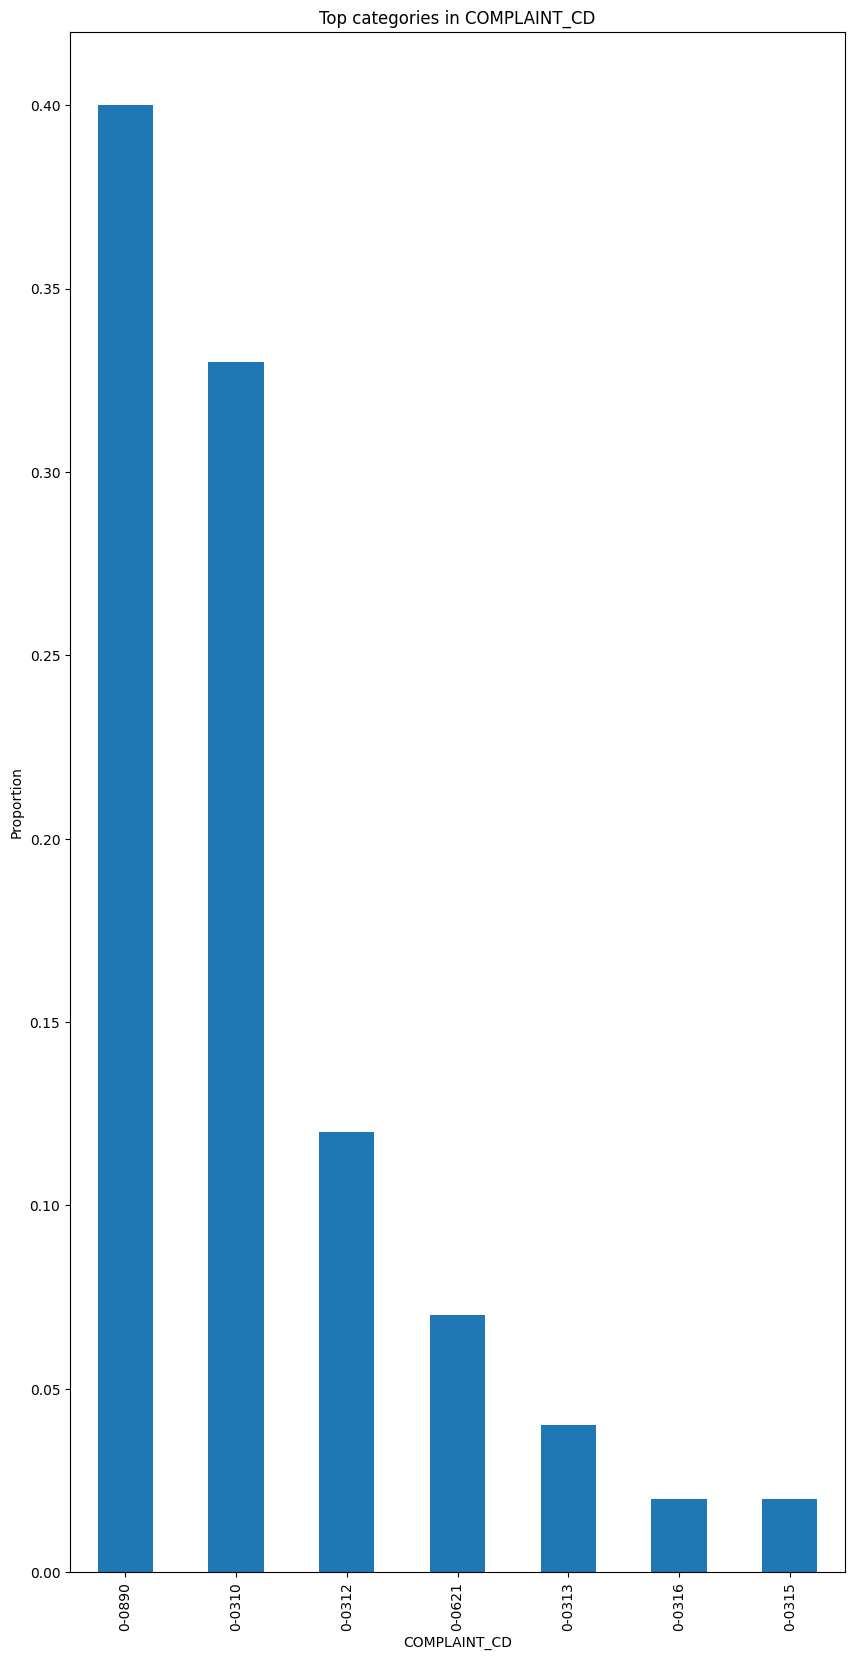

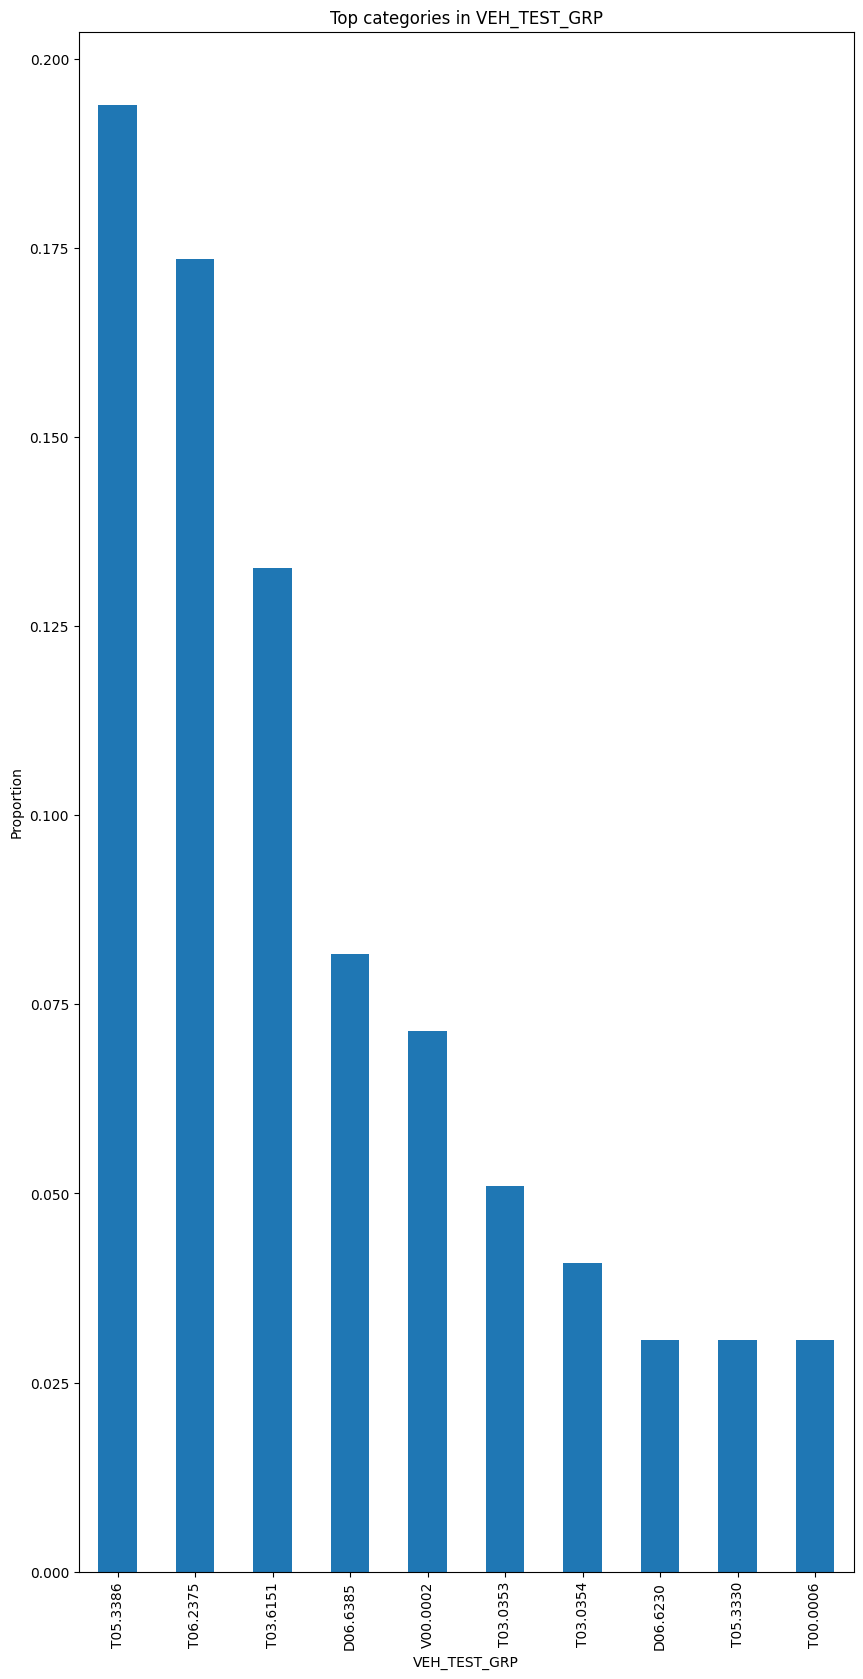

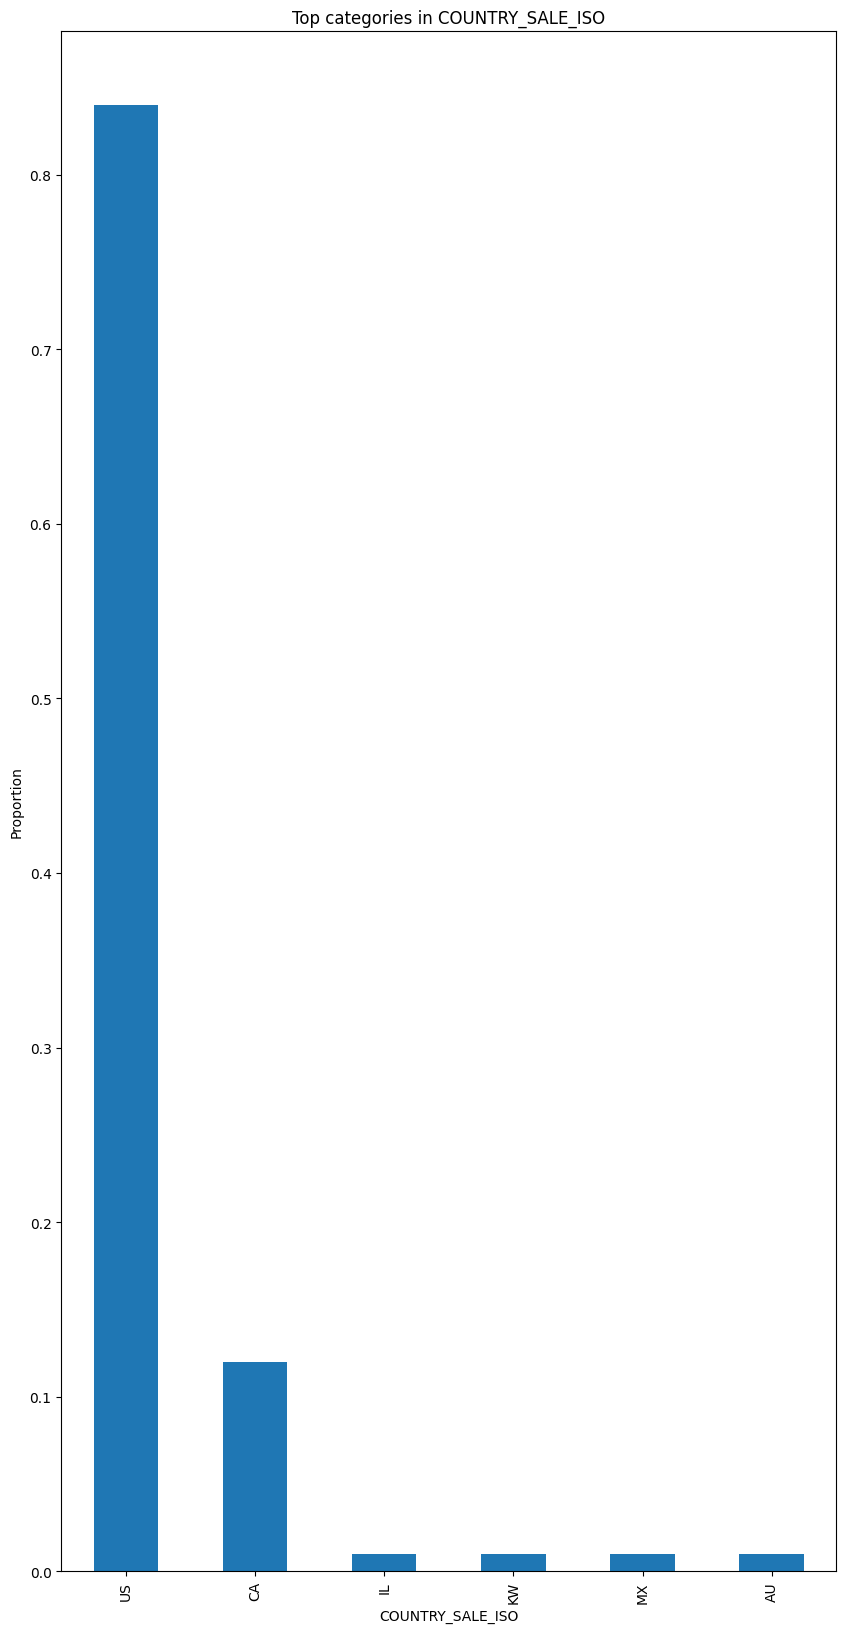

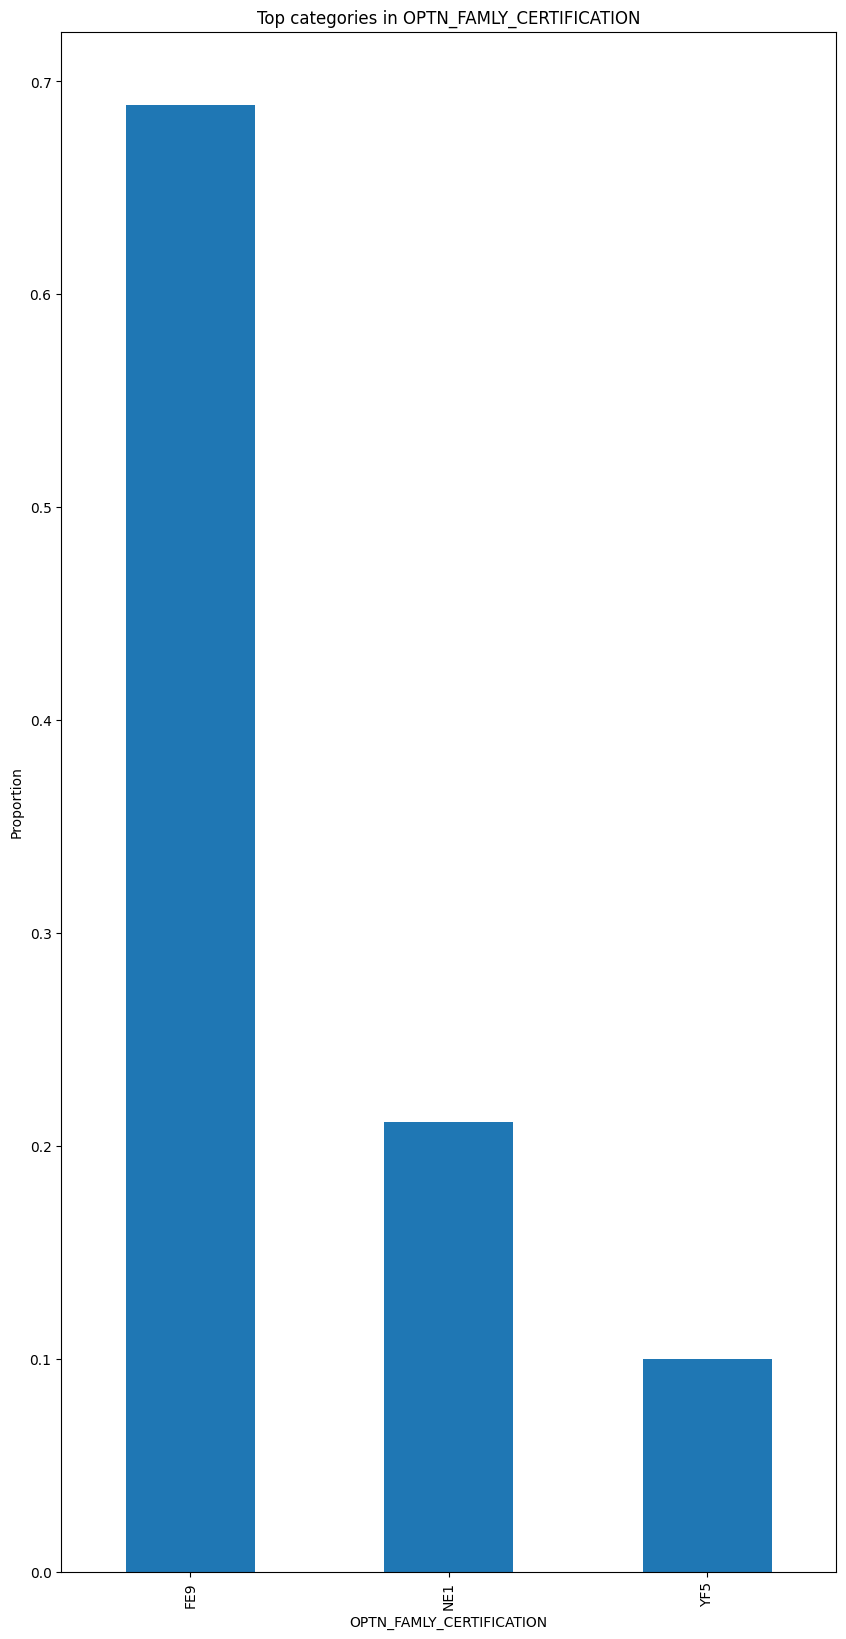

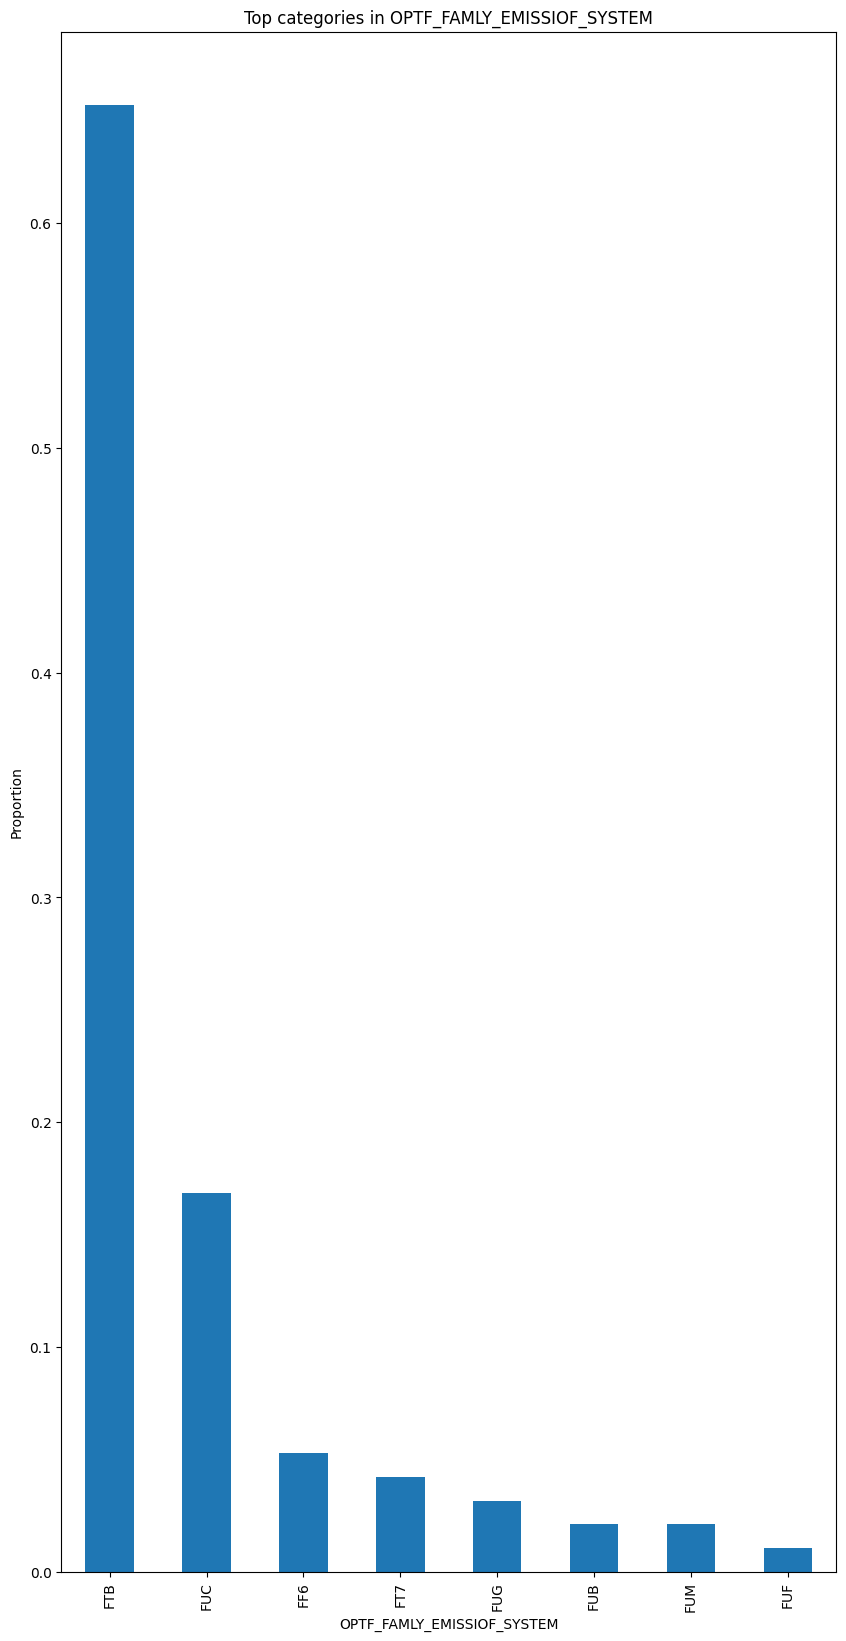

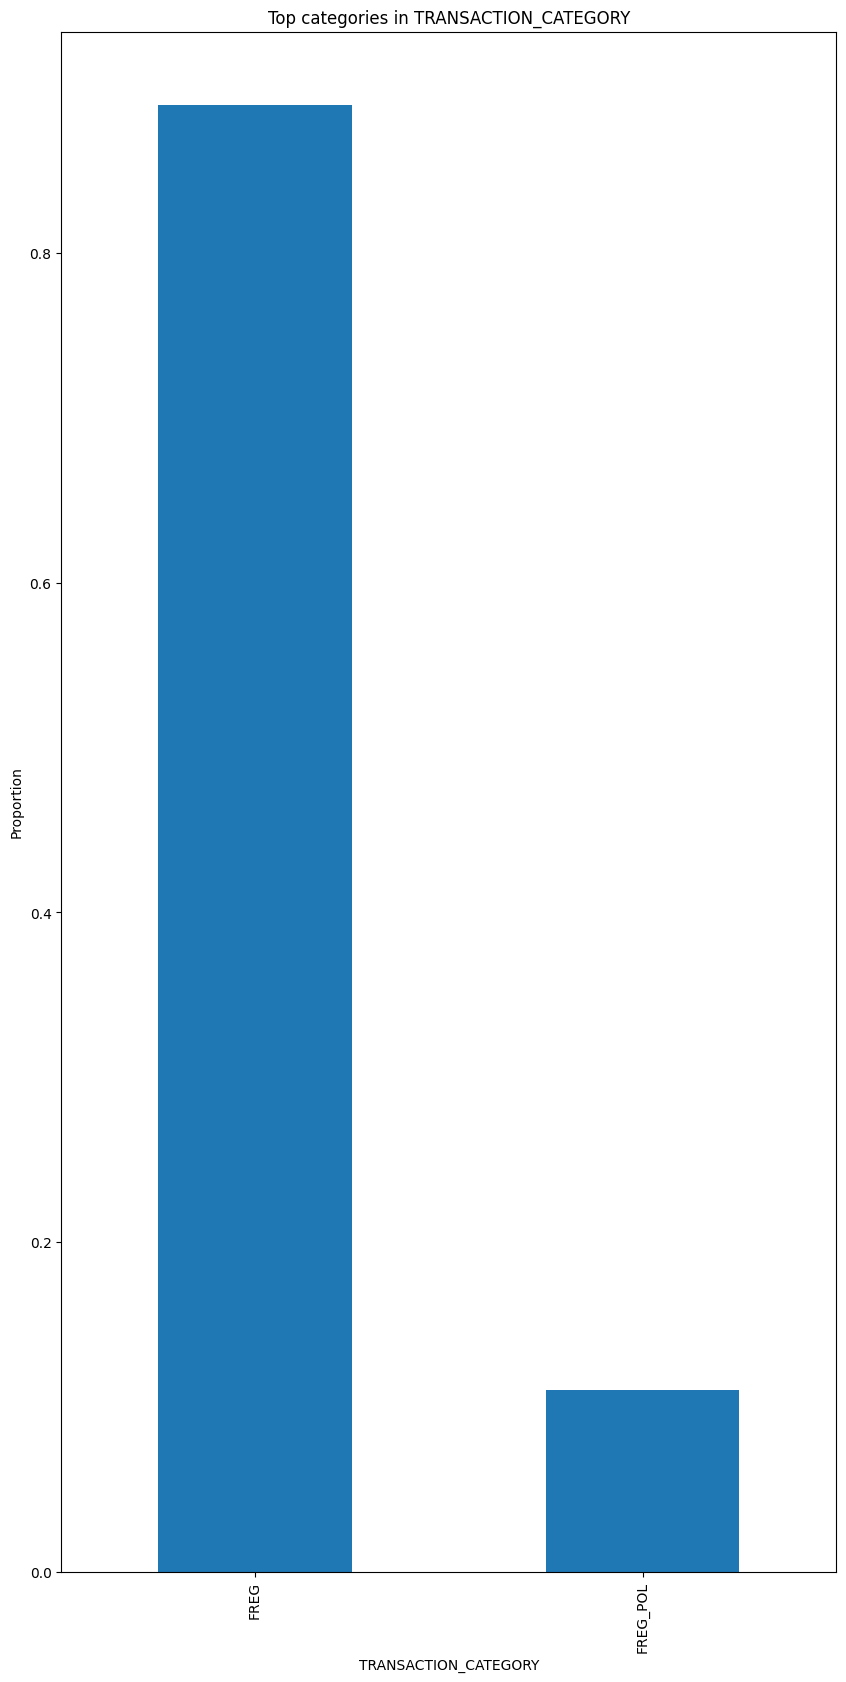

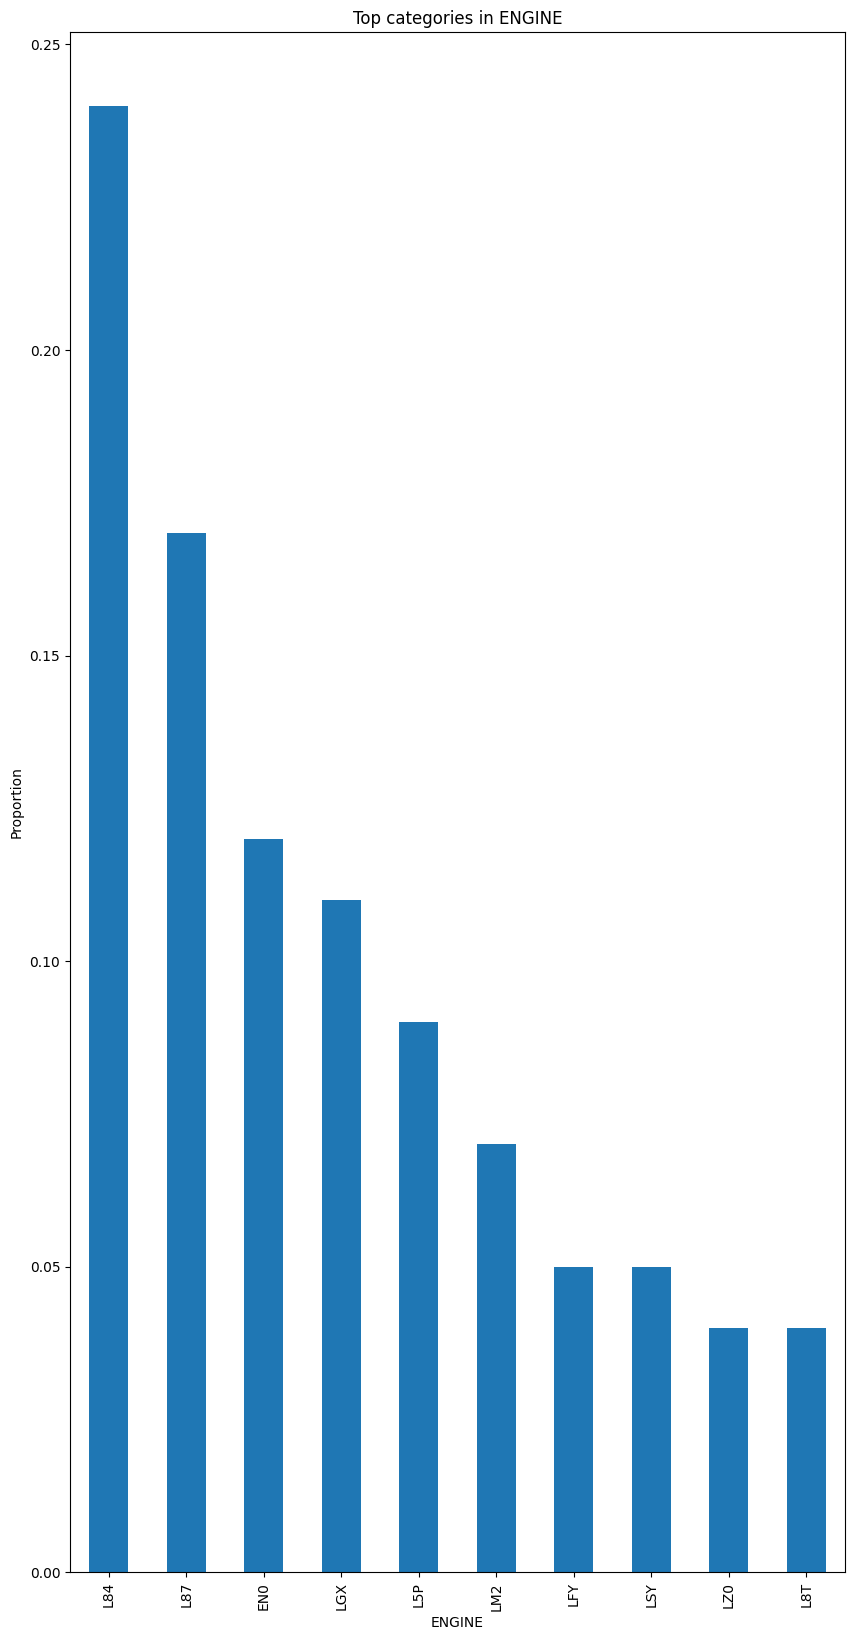

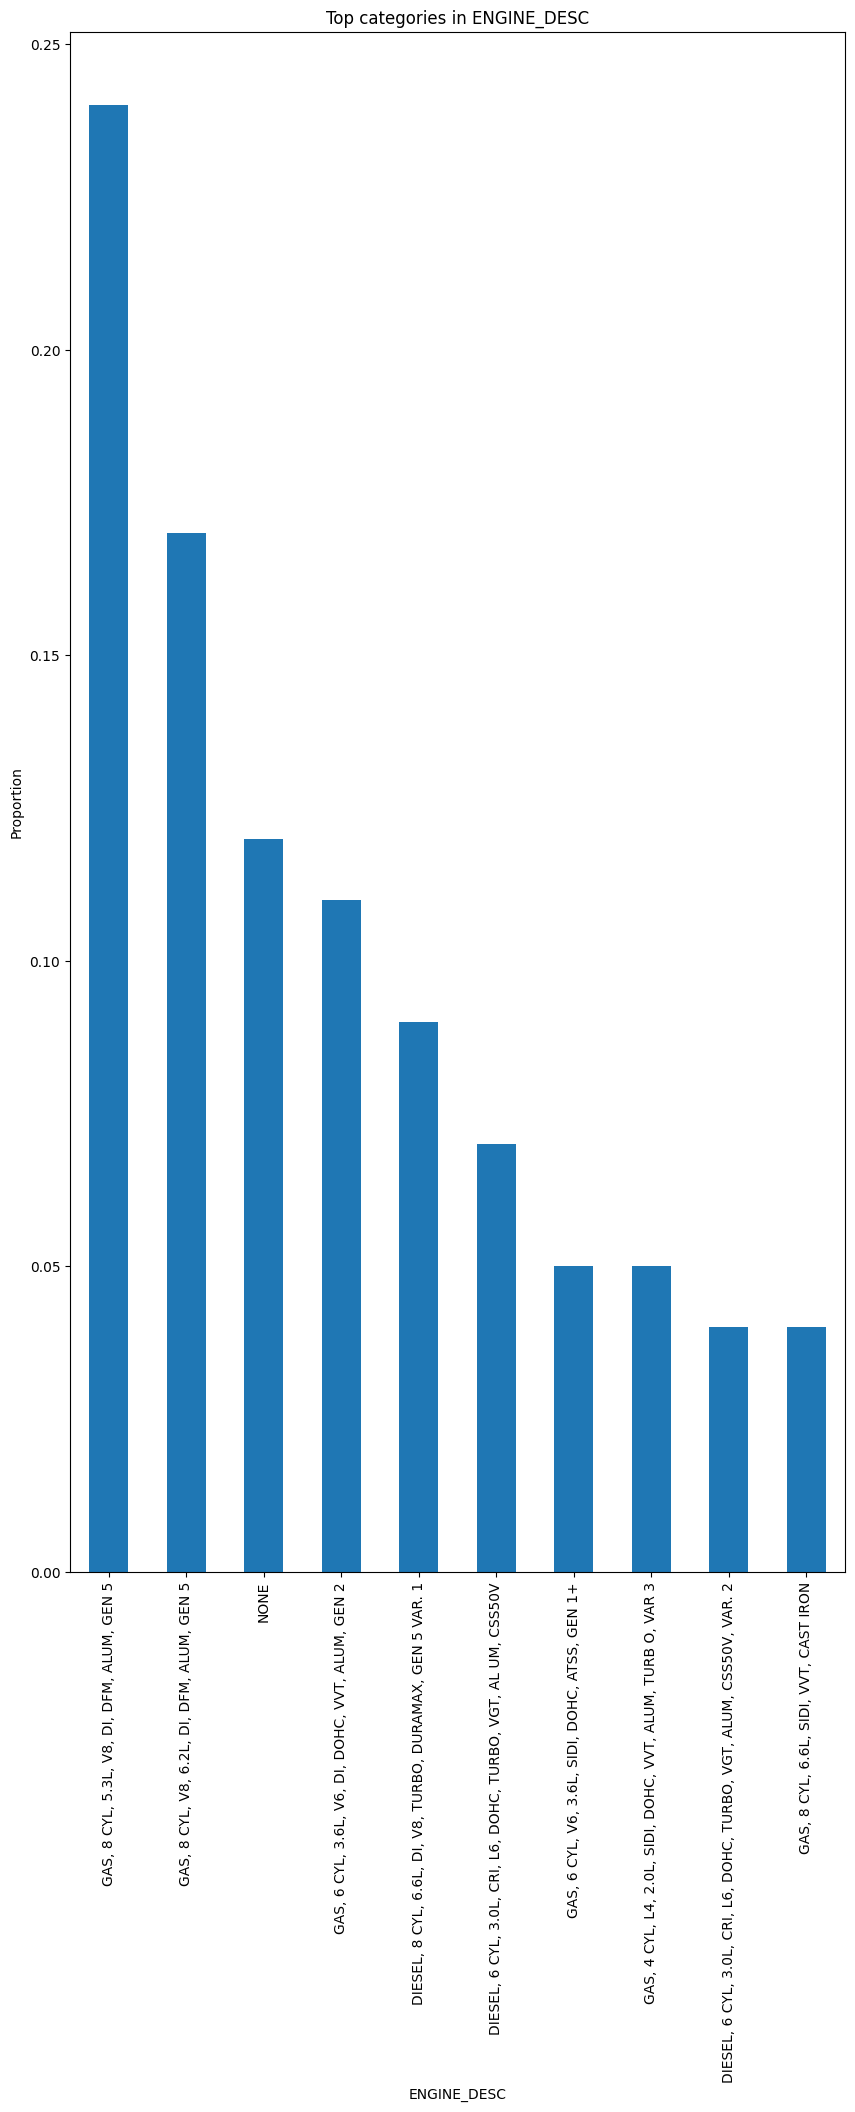

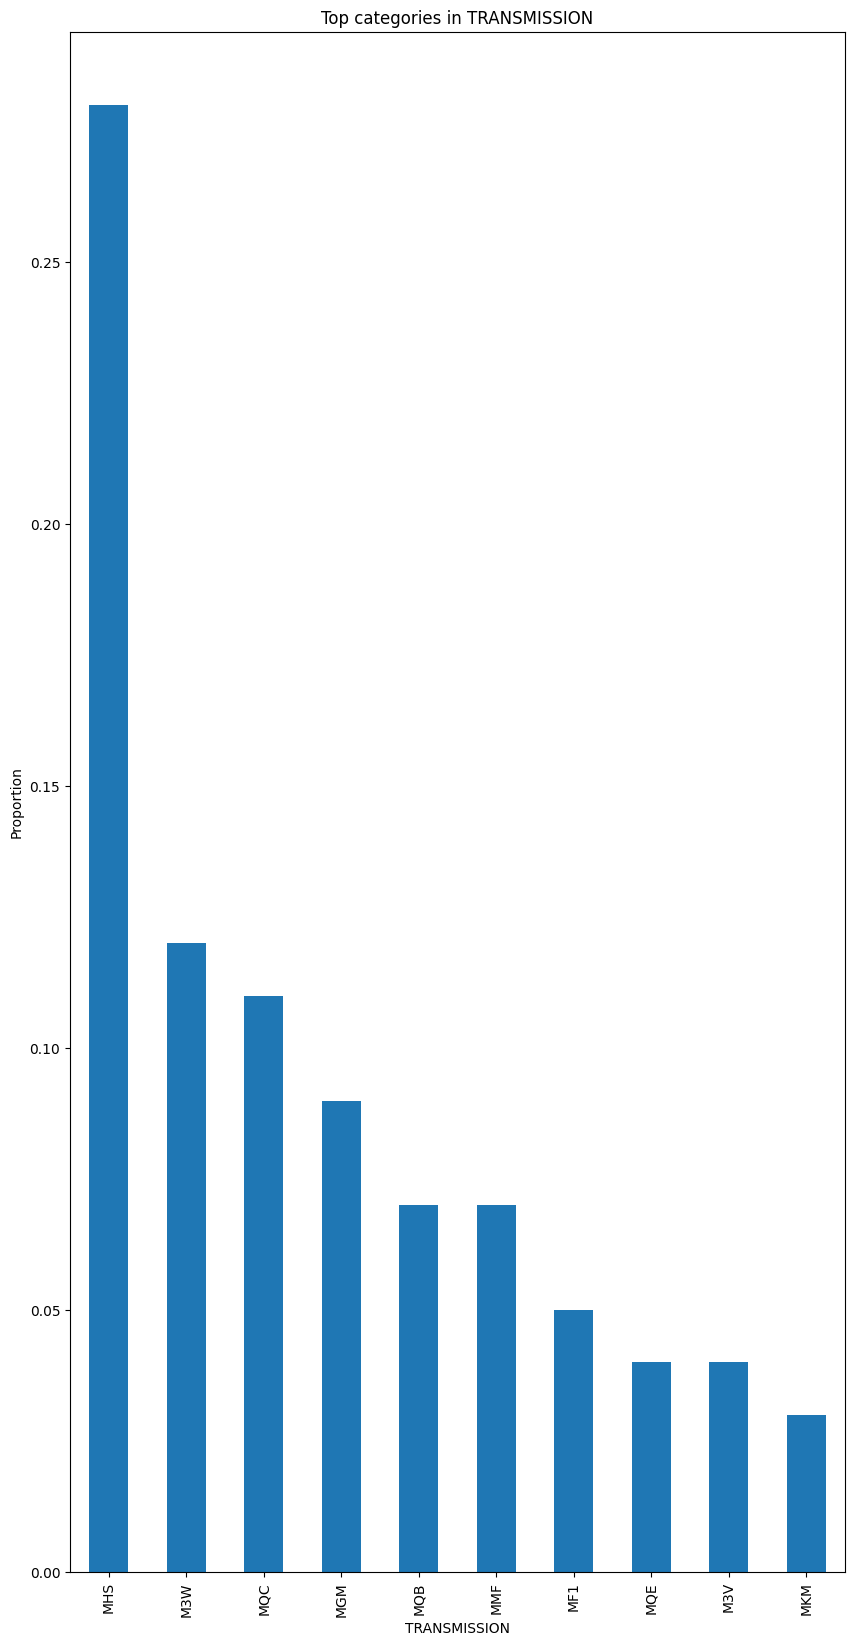

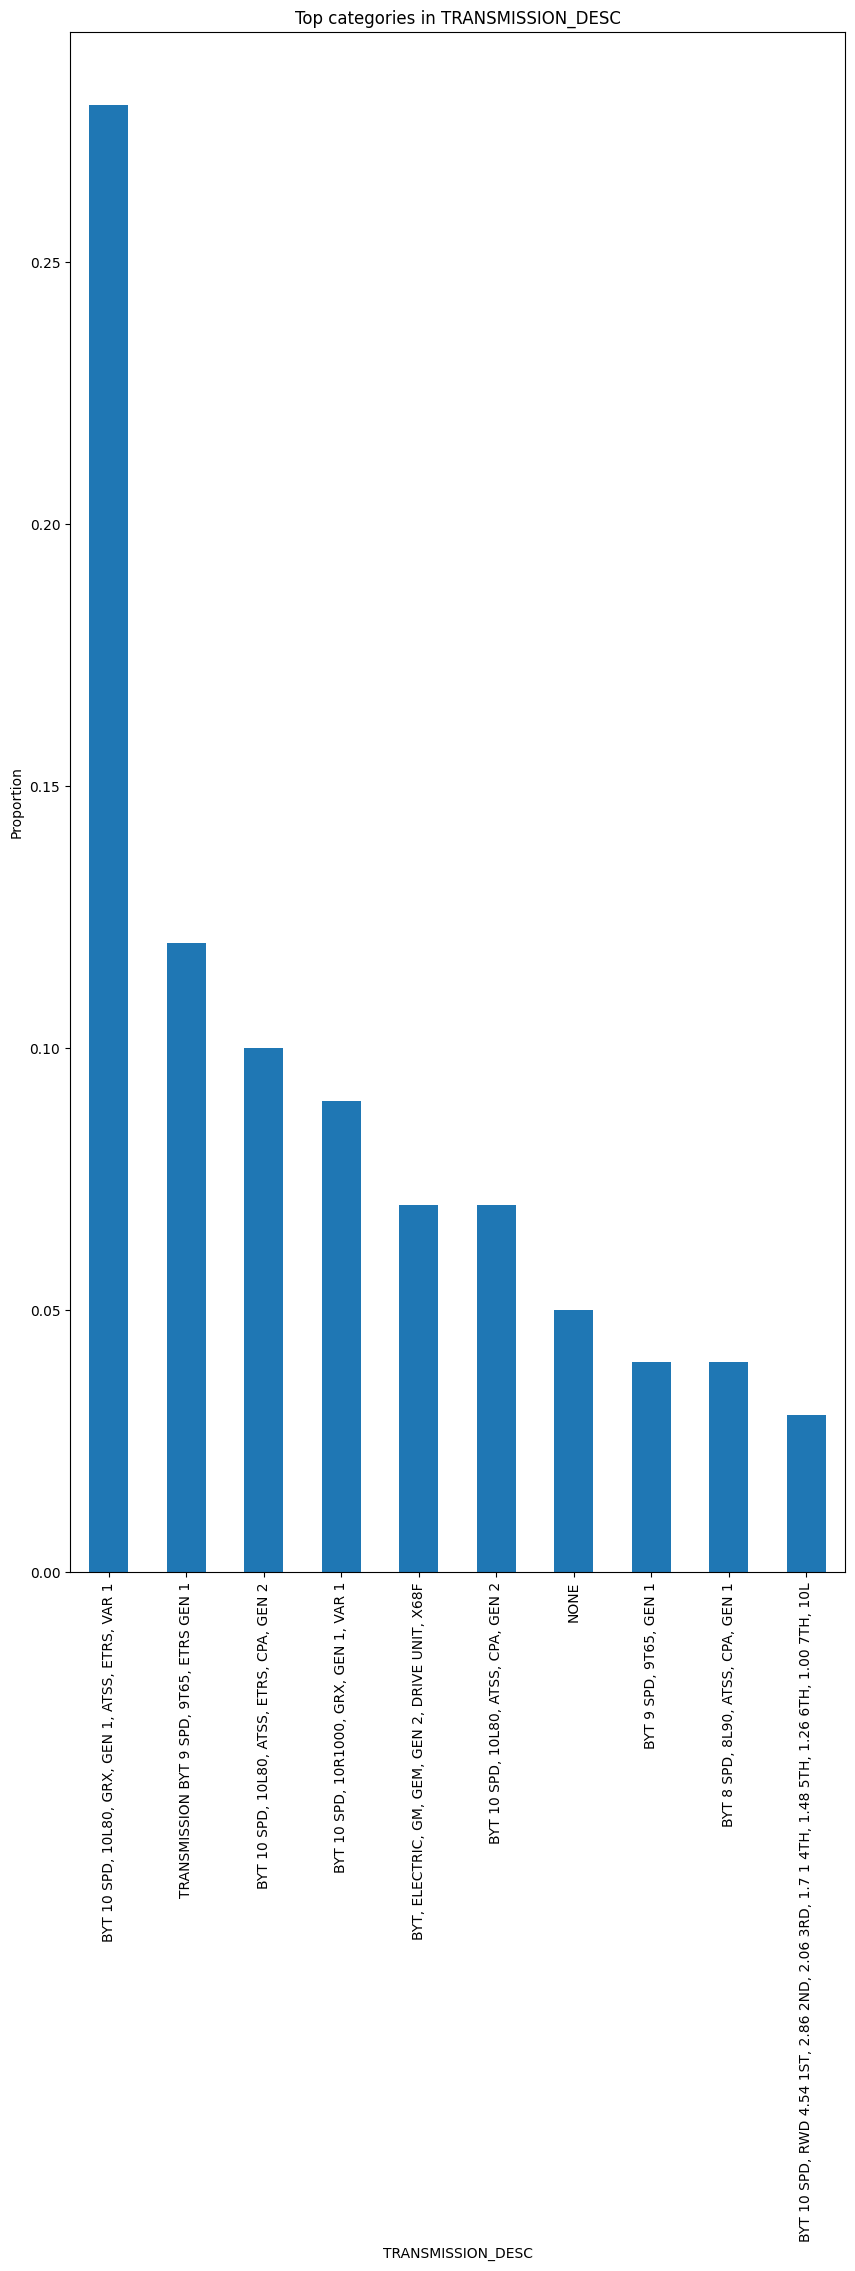

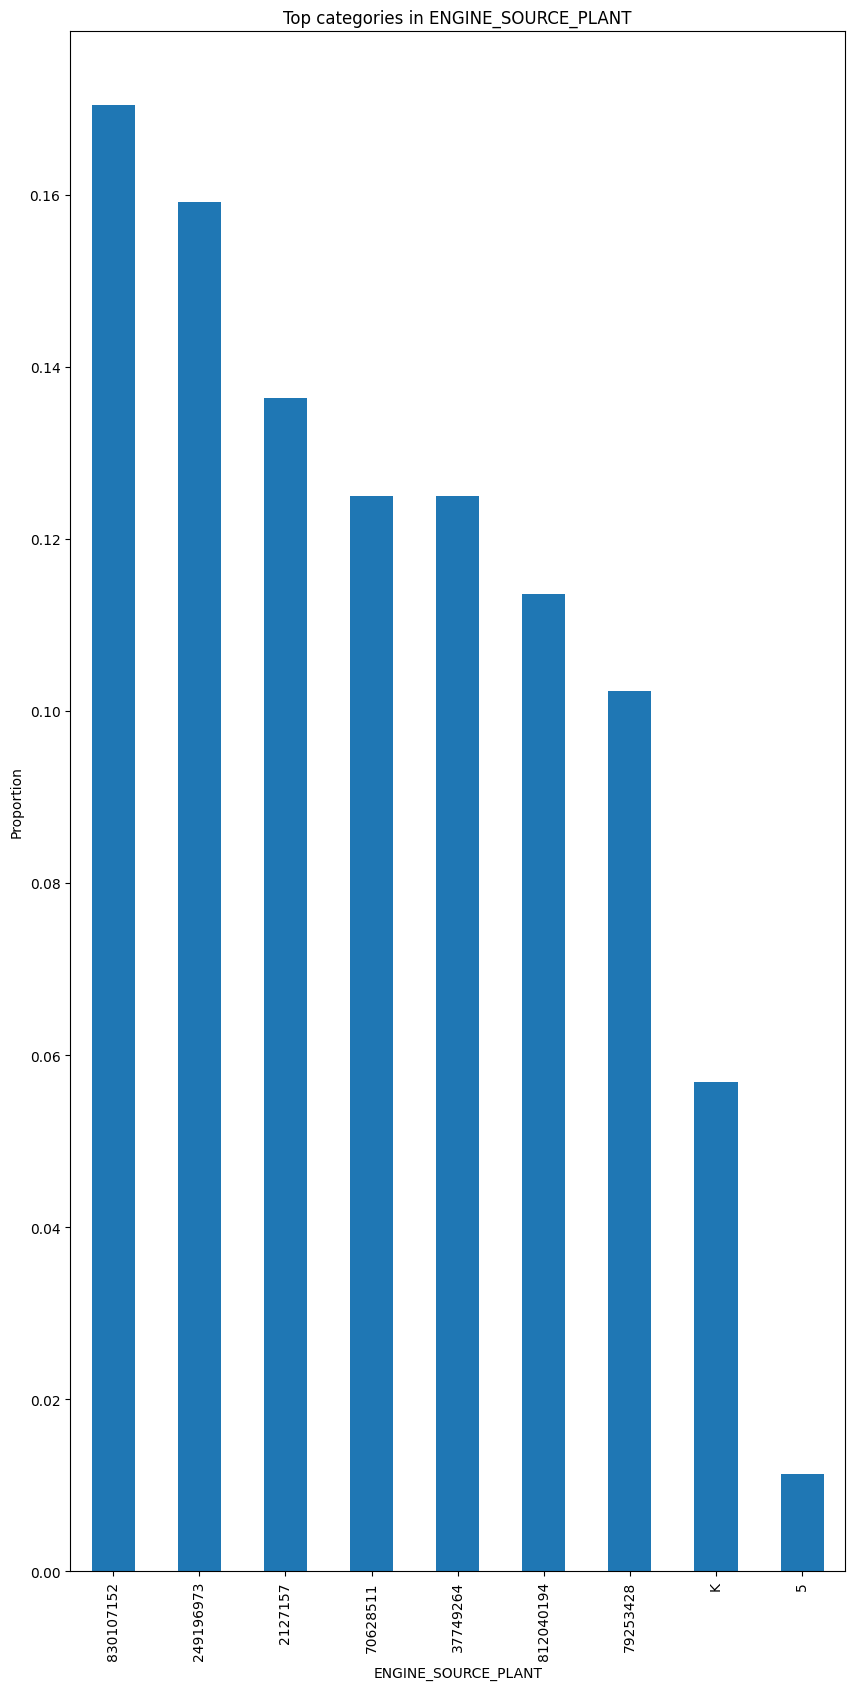

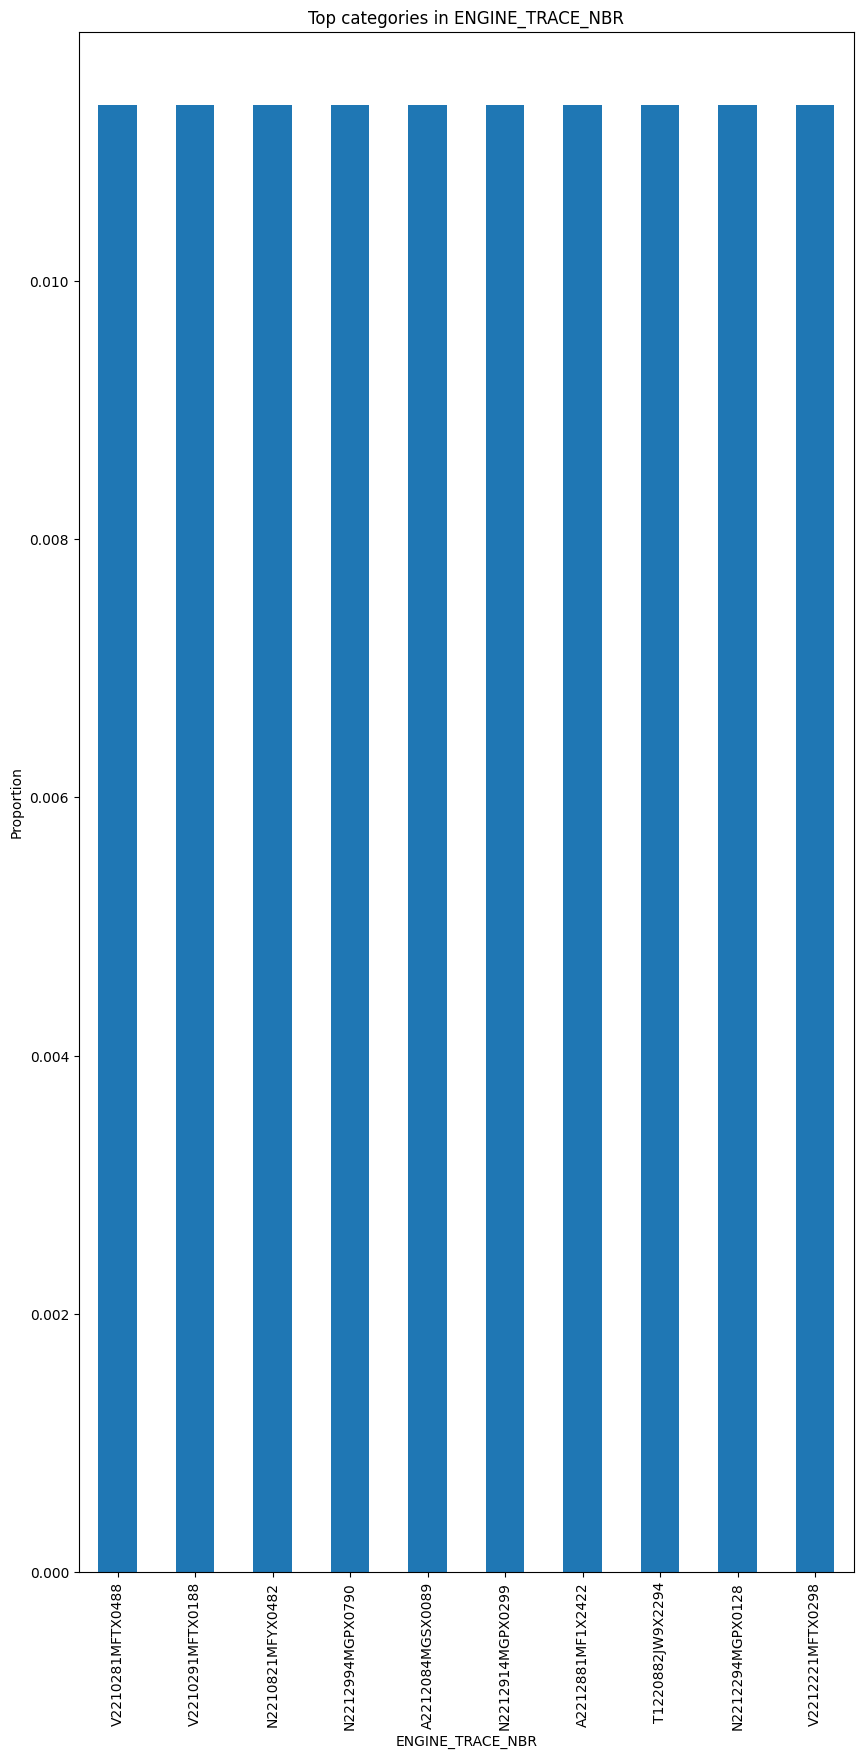

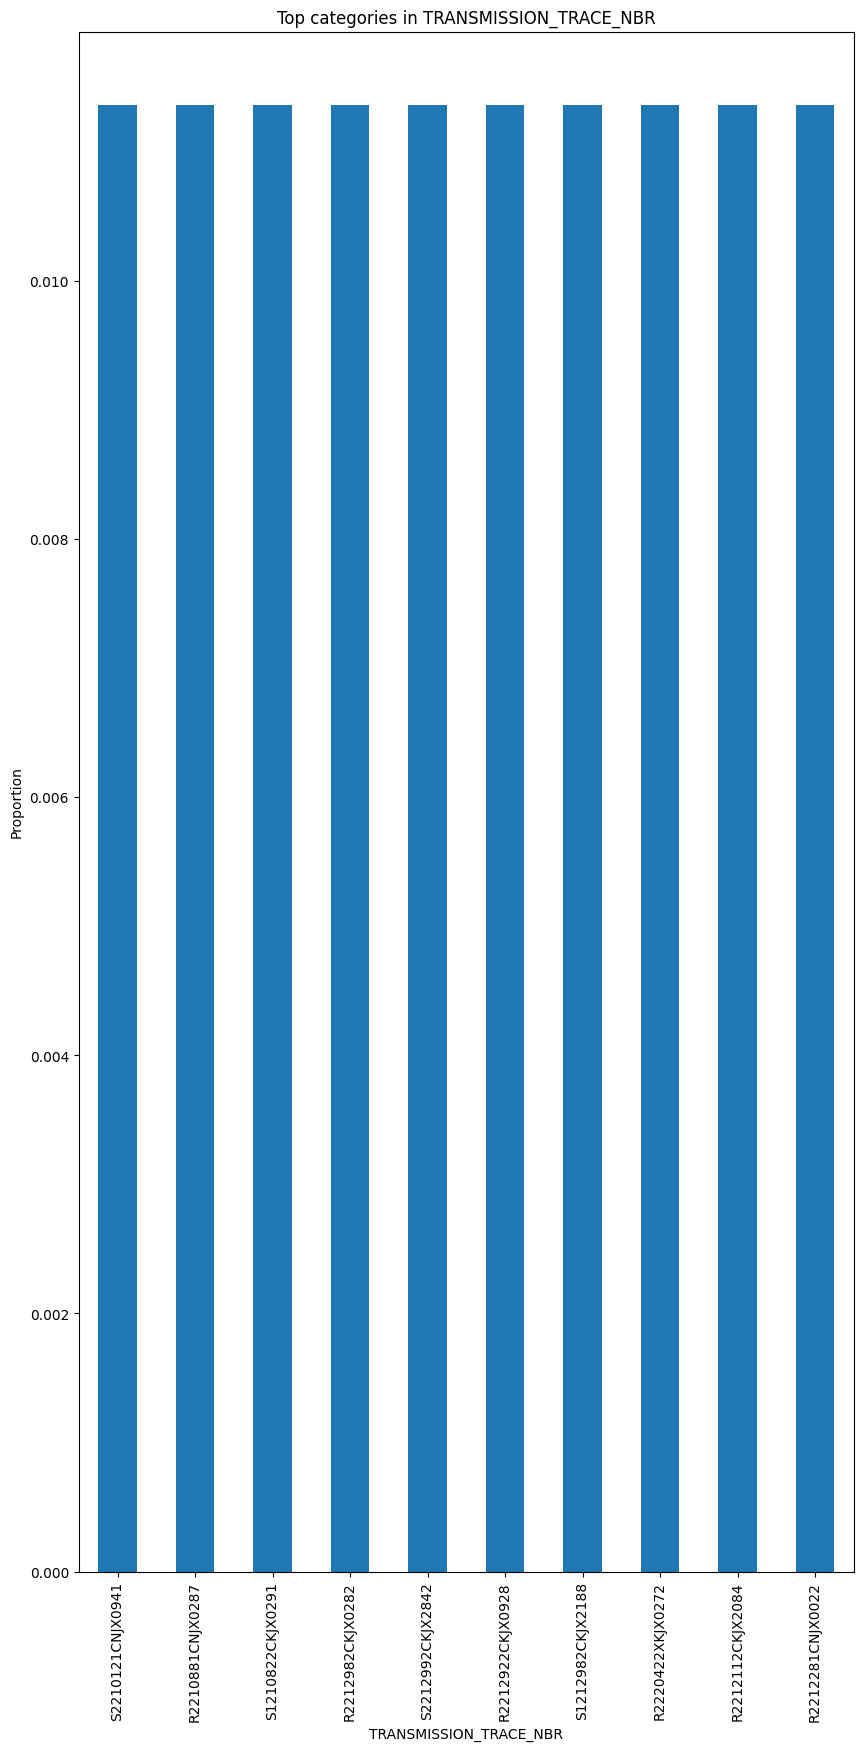

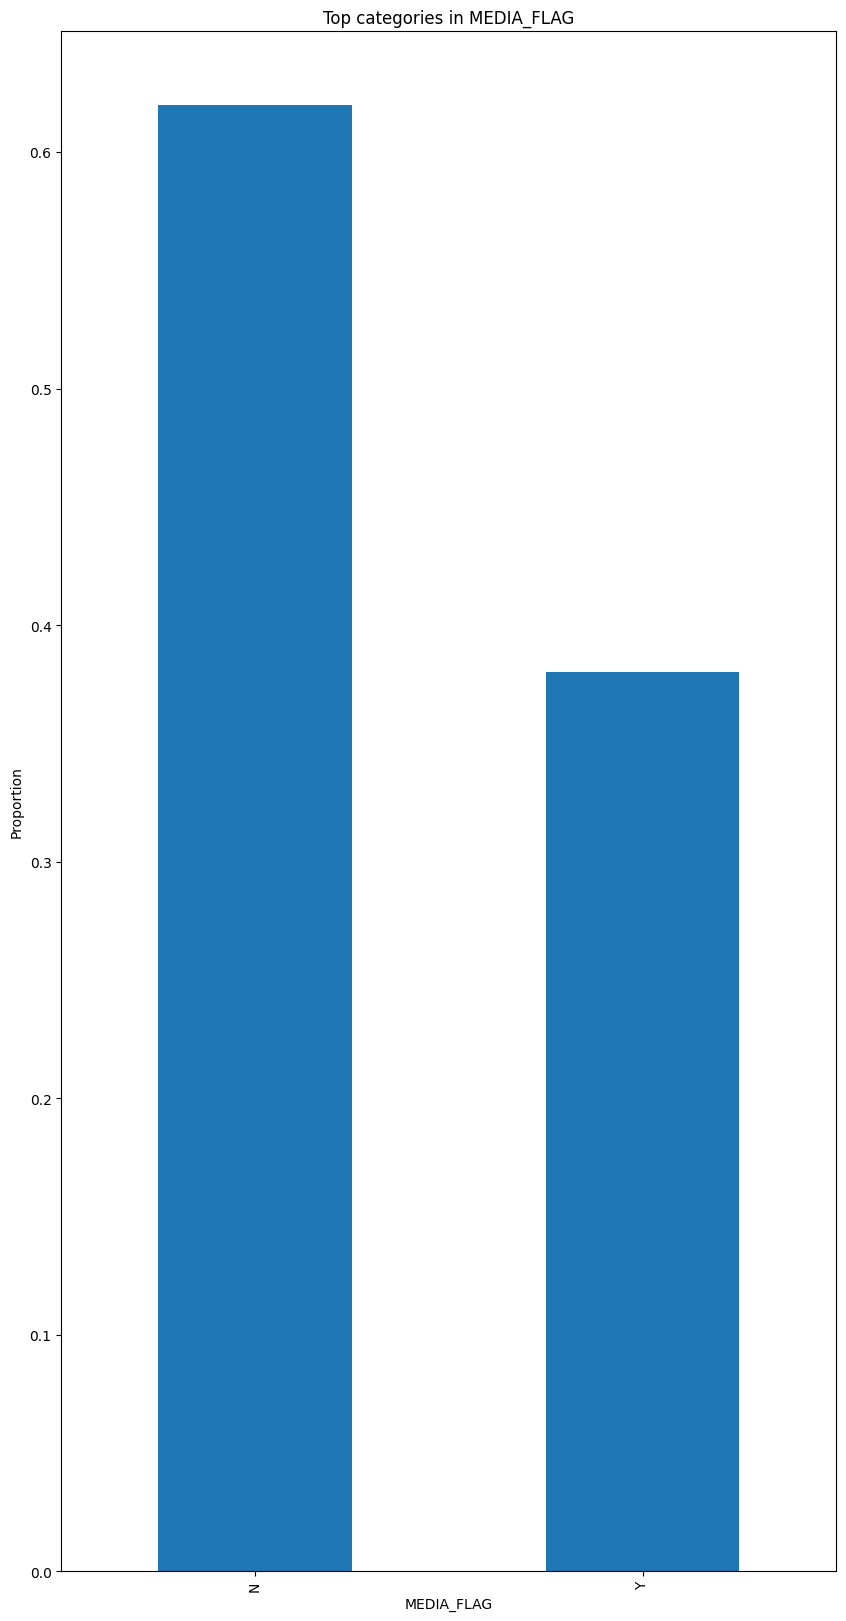

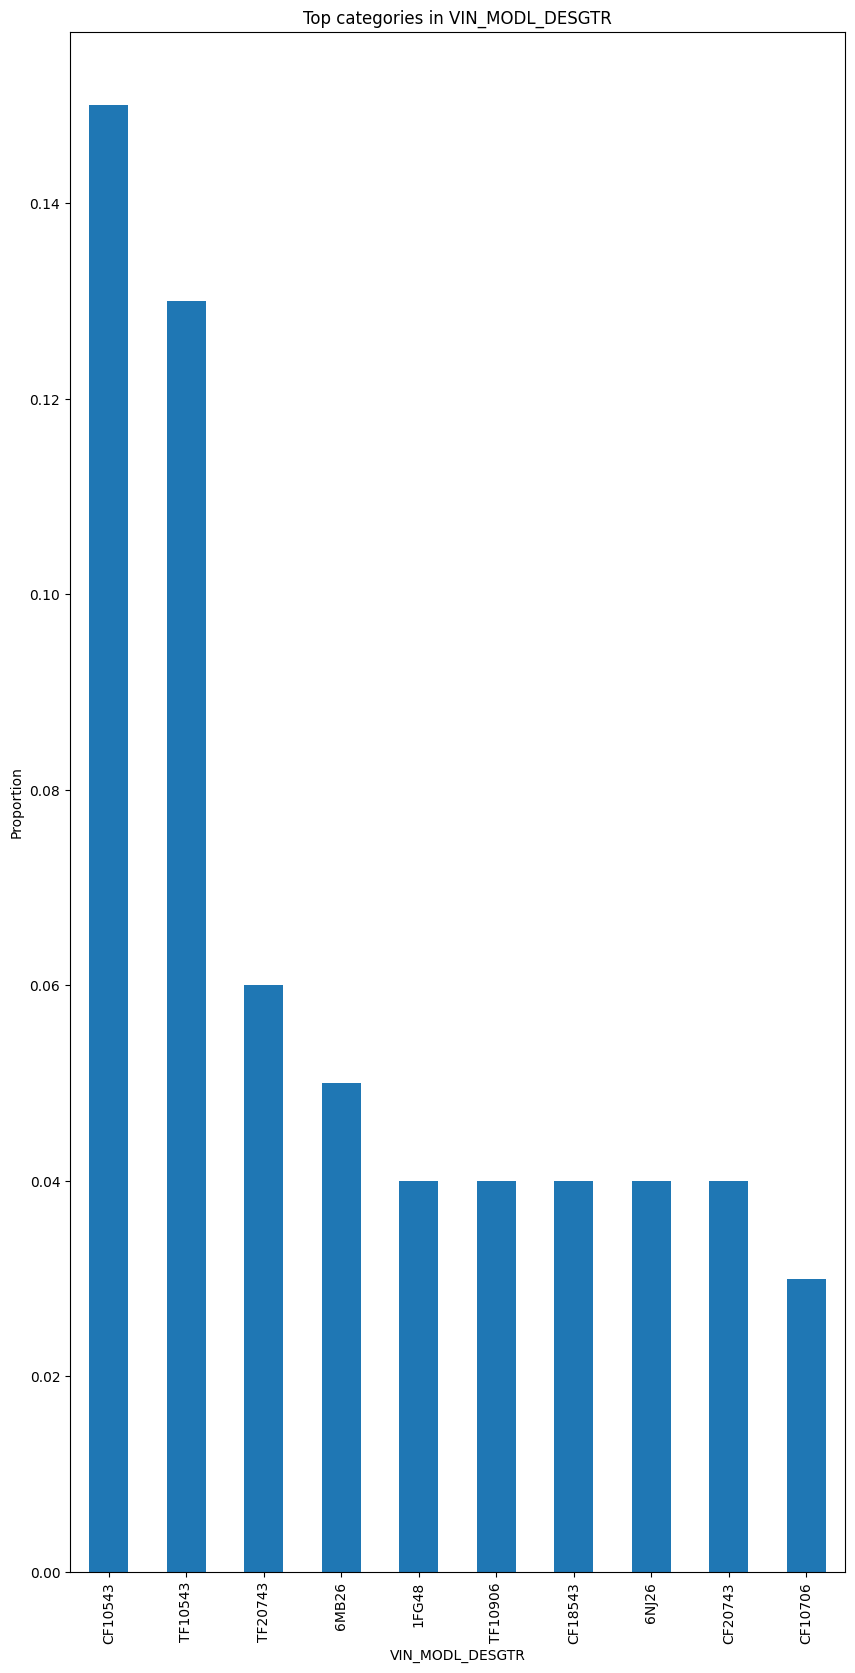

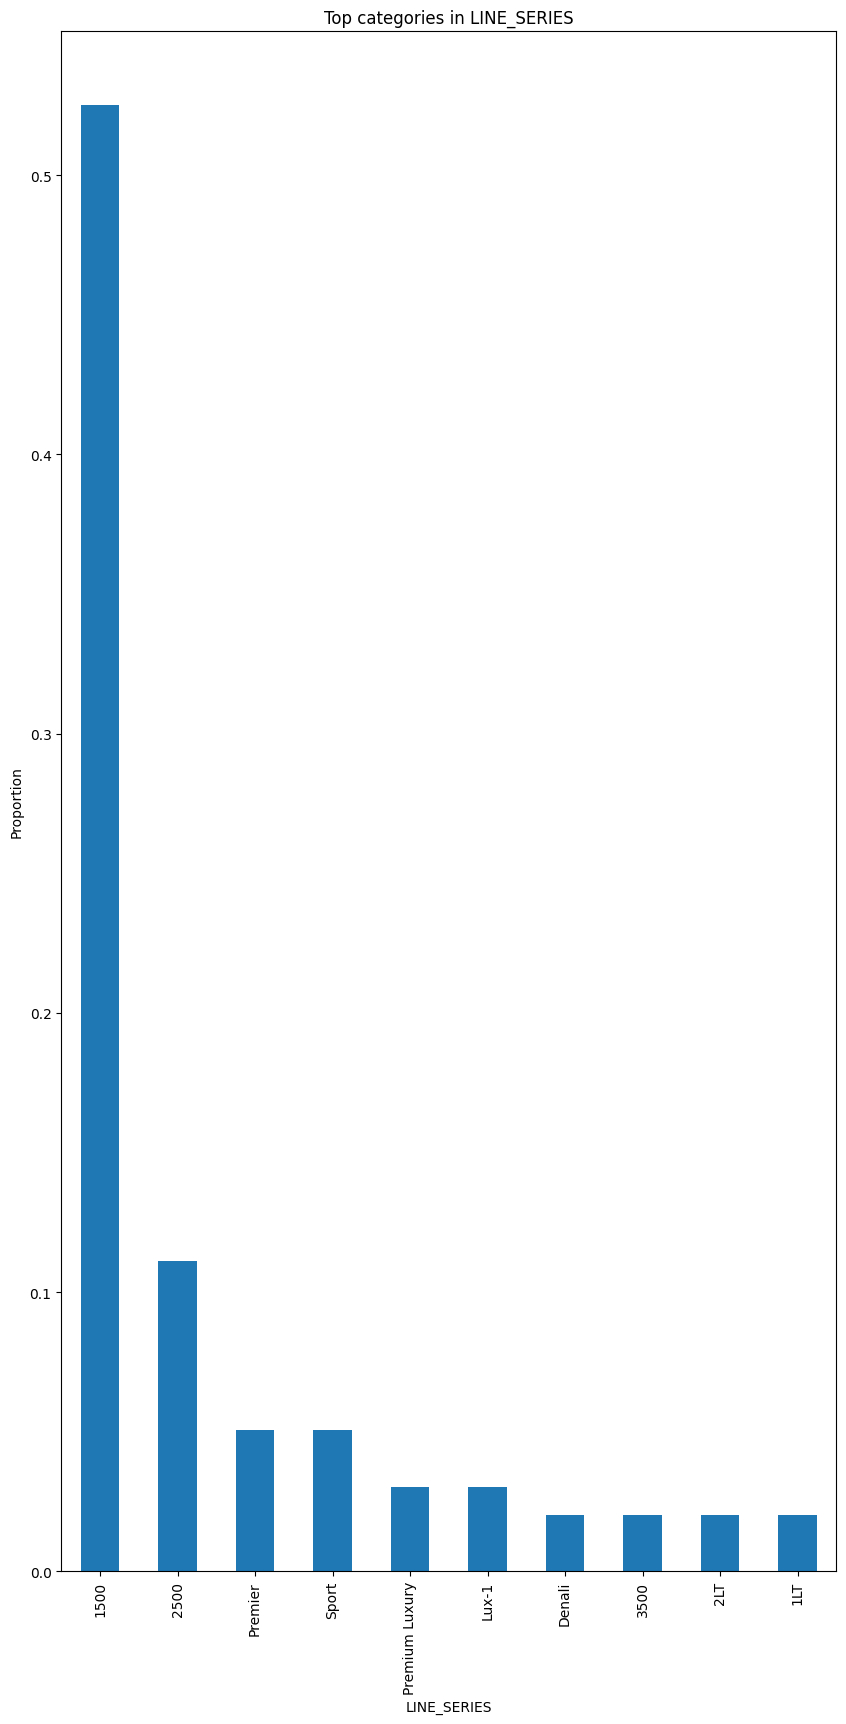

Column       Data Type  Unique Values % Missing  \
0                             VIN          object             98     0.00%   
1                  TRANSACTION_ID           int64             32     0.00%   
2             CORRECTION_VERBATIM          object             93     0.00%   
3               CUSTOMER_VERBATIM          object            100     0.00%   
4                     REPAIR_DATE  datetime64[ns]             29     0.00%   
5                  CAUSAL_PART_NM          object             18     5.00%   
6   GLOBAL_LABOR_CODE_DESCRIPTION          object              4     0.00%   
7                        PLATFORM          object             11     0.00%   
8                      BODY_STYLE          object              6     0.00%   
9                            VPPC          object             26     0.00%   
10                          PLANT          object             11     1.00%   
11                  BUILD_COUNTRY          object              3     0.00%   
12            LAST_KNOWN_DLR_NAME          object            100     0.00%   
13            LAST_KNOWN_DLR_CITY          object             94     0.00%   
14          REPAIRING_DEALER_CODE          object             95     0.00%   
15                    DEALER_NAME          object            100     0.00%   
16                REPAIR_DLR_CITY          object             93     0.00%   
17                          STATE          object             39     2.00%   
18                  DEALER_REGION           int64              2     0.00%   
19           REPAIR_DLR_POSTAL_CD          object             92     2.00%   
20                     REPAIR_AGE           int64             35     0.00%   
21                             KM           int64            100     0.00%   
22               COMPLAINT_CD_CSI           int64              1     0.00%   
23                   COMPLAINT_CD          object              7     0.00%   
24                   VEH_TEST_GRP          object             23     2.00%   
25               COUNTRY_SALE_ISO          object              6     0.00%   
26             ORD_SELLING_SRC_CD           int64              7     0.00%   
27       OPTN_FAMLY_CERTIFICATION          object              3    10.00%   
28     OPTF_FAMLY_EMISSIOF_SYSTEM          object              8     5.00%   
29              GLOBAL_LABOR_CODE           int64              4     0.00%   
30           TRANSACTION_CATEGORY          object              2     0.00%   
31                   CAMPAIGN_NBR         float64              0   100.00%   
32                 REPORTING_COST         float64            100     0.00%   
33                      TOTALCOST         float64            100     0.00%   
34                        LBRCOST         float64             99     0.00%   
35                         ENGINE          object             12     0.00%   
36                    ENGINE_DESC          object             12     0.00%   
37                   TRANSMISSION          object             19     0.00%   
38              TRANSMISSION_DESC          object             20     0.00%   
39            ENGINE_SOURCE_PLANT          object              9    12.00%   
40               ENGINE_TRACE_NBR          object             88    12.00%   
41      TRANSMISSION_SOURCE_PLANT         float64              6    12.00%   
42         TRANSMISSION_TRACE_NBR          object             88    12.00%   
43                     SRC_TXN_ID           int64            100     0.00%   
44                    SRC_VER_NBR           int64             10     0.00%   
45               TRANSACTION_CNTR           int64              1     0.00%   
46                     MEDIA_FLAG          object              2     0.00%   
47                VIN_MODL_DESGTR          object             41     0.00%   
48                    LINE_SERIES          object             22     1.00%   
49      LAST_KNOWN_DELVRY_TYPE_CD         float64             11     2.00%   
50            NON_CAUSAL_PART_QTY           int64

In [13]:
# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# --- Distribution for numerical columns ---
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# --- Distribution for categorical columns ---
for col in cat_cols:
    plt.figure(figsize=(10,20))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f"Top categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Proportion")
    plt.show()

# --- Overall column significance summary ---
col_summary = []
for col in df.columns:
    dtype = df[col].dtype
    unique_vals = df[col].nunique()
    missing_pct = df[col].isna().mean() * 100

    if dtype in ['int64','float64']:
        significance = "Numerical column; useful for trend analysis, outlier detection, and KPIs."
    else:
        significance = "Categorical/text column; useful for segmentation, tagging, and qualitative insights."

    col_summary.append([col, dtype, unique_vals, f"{missing_pct:.2f}%", significance])

col_summary_df = pd.DataFrame(col_summary, columns=["Column","Data Type","Unique Values","% Missing","Stakeholder Significance"])
display(col_summary_df)




#Check duplicates before analysis data

In [15]:
df.duplicated().sum()
# No duplicates

np.int64(0)

#Data Cleaning:

In [16]:
df.isnull().sum()

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
OPTN_FAMLY_CERTIFICATION          10
OPTF_FAMLY_EMISSIOF_SYSTEM         5
GLOBAL_LABOR_CODE                  0
TRANSACTION_CATEGORY               0
CAMPAIGN_NBR                     100
REPORTING_COST                     0
TOTALCOST                          0
LBRCOST                            0
ENGINE                             0
ENGINE_DESC                        0
TRANSMISSION                       0
TRANSMISSION_DESC                  0
ENGINE_SOURCE_PLANT               12
ENGINE_TRACE_NBR                  12
TRANSMISSION_SOURCE_PLANT         12
TRANSMISSION_TRACE_NBR            12
SRC_TXN_ID                         0
SRC_VER_NBR                        0
TRANSACTION_CNTR                   0
MEDIA_FLAG                         0
VIN_MODL_DESGTR                    0
LINE_SERIES                        1
LAST_KNOWN_DELVRY_TYPE_CD          2
NON_CAUSAL_PART_QTY                0
SALES_REGION_CODE                  0
dtype: int64

# There are few Missing values in both Numerical and Category:

Handle missing value by using mean(numeric) mode(category)

In [20]:
for col in df.columns:
     if df[col].dtype=='object':
        df[col].fillna(df[col].mode()[0],inplace=True)
     else:
        df[col].fillna(df[col].mean(), inplace=True)

In [21]:
df.isnull().sum()

VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     0
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              0
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              0
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               0
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       0
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD                 0
OPTN_FAMLY_CERTIFICATION           0
OPTF_FAMLY_EMISSIOF_SYSTEM         0
GLOBAL_LABOR_CODE                  0
TRANSACTION_CATEGORY               0
CAMPAIGN_NBR                     100
REPORTING_COST                     0
TOTALCOST                          0
LBRCOST                            0
ENGINE                             0
ENGINE_DESC                        0
TRANSMISSION                       0
TRANSMISSION_DESC                  0
ENGINE_SOURCE_PLANT                0
ENGINE_TRACE_NBR                   0
TRANSMISSION_SOURCE_PLANT          0
TRANSMISSION_TRACE_NBR             0
SRC_TXN_ID                         0
SRC_VER_NBR                        0
TRANSACTION_CNTR                   0
MEDIA_FLAG                         0
VIN_MODL_DESGTR                    0
LINE_SERIES                        0
LAST_KNOWN_DELVRY_TYPE_CD          0
NON_CAUSAL_PART_QTY                0
SALES_REGION_CODE                  0
dtype: int64

Irrelevent Column is " CAMPAIGN_NBR " so drop it

In [24]:
df.drop('CAMPAIGN_NBR',inplace=True,axis=1)

In [25]:
df.isnull().sum()

VIN                              0
TRANSACTION_ID                   0
CORRECTION_VERBATIM              0
CUSTOMER_VERBATIM                0
REPAIR_DATE                      0
CAUSAL_PART_NM                   0
GLOBAL_LABOR_CODE_DESCRIPTION    0
PLATFORM                         0
BODY_STYLE                       0
VPPC                             0
PLANT                            0
BUILD_COUNTRY                    0
LAST_KNOWN_DLR_NAME              0
LAST_KNOWN_DLR_CITY              0
REPAIRING_DEALER_CODE            0
DEALER_NAME                      0
REPAIR_DLR_CITY                  0
STATE                            0
DEALER_REGION                    0
REPAIR_DLR_POSTAL_CD             0
REPAIR_AGE                       0
KM                               0
COMPLAINT_CD_CSI                 0
COMPLAINT_CD                     0
VEH_TEST_GRP                     0
COUNTRY_SALE_ISO                 0
ORD_SELLING_SRC_CD               0
OPTN_FAMLY_CERTIFICATION         0
OPTF_FAMLY_EMISSIOF_SYSTEM       0
GLOBAL_LABOR_CODE                0
TRANSACTION_CATEGORY             0
REPORTING_COST                   0
TOTALCOST                        0
LBRCOST                          0
ENGINE                           0
ENGINE_DESC                      0
TRANSMISSION                     0
TRANSMISSION_DESC                0
ENGINE_SOURCE_PLANT              0
ENGINE_TRACE_NBR                 0
TRANSMISSION_SOURCE_PLANT        0
TRANSMISSION_TRACE_NBR           0
SRC_TXN_ID                       0
SRC_VER_NBR                      0
TRANSACTION_CNTR                 0
MEDIA_FLAG                       0
VIN_MODL_DESGTR                  0
LINE_SERIES                      0
LAST_KNOWN_DELVRY_TYPE_CD        0
NON_CAUSAL_PART_QTY              0
SALES_REGION_CODE                0
dtype: int64

#outliers:

<Axes: >

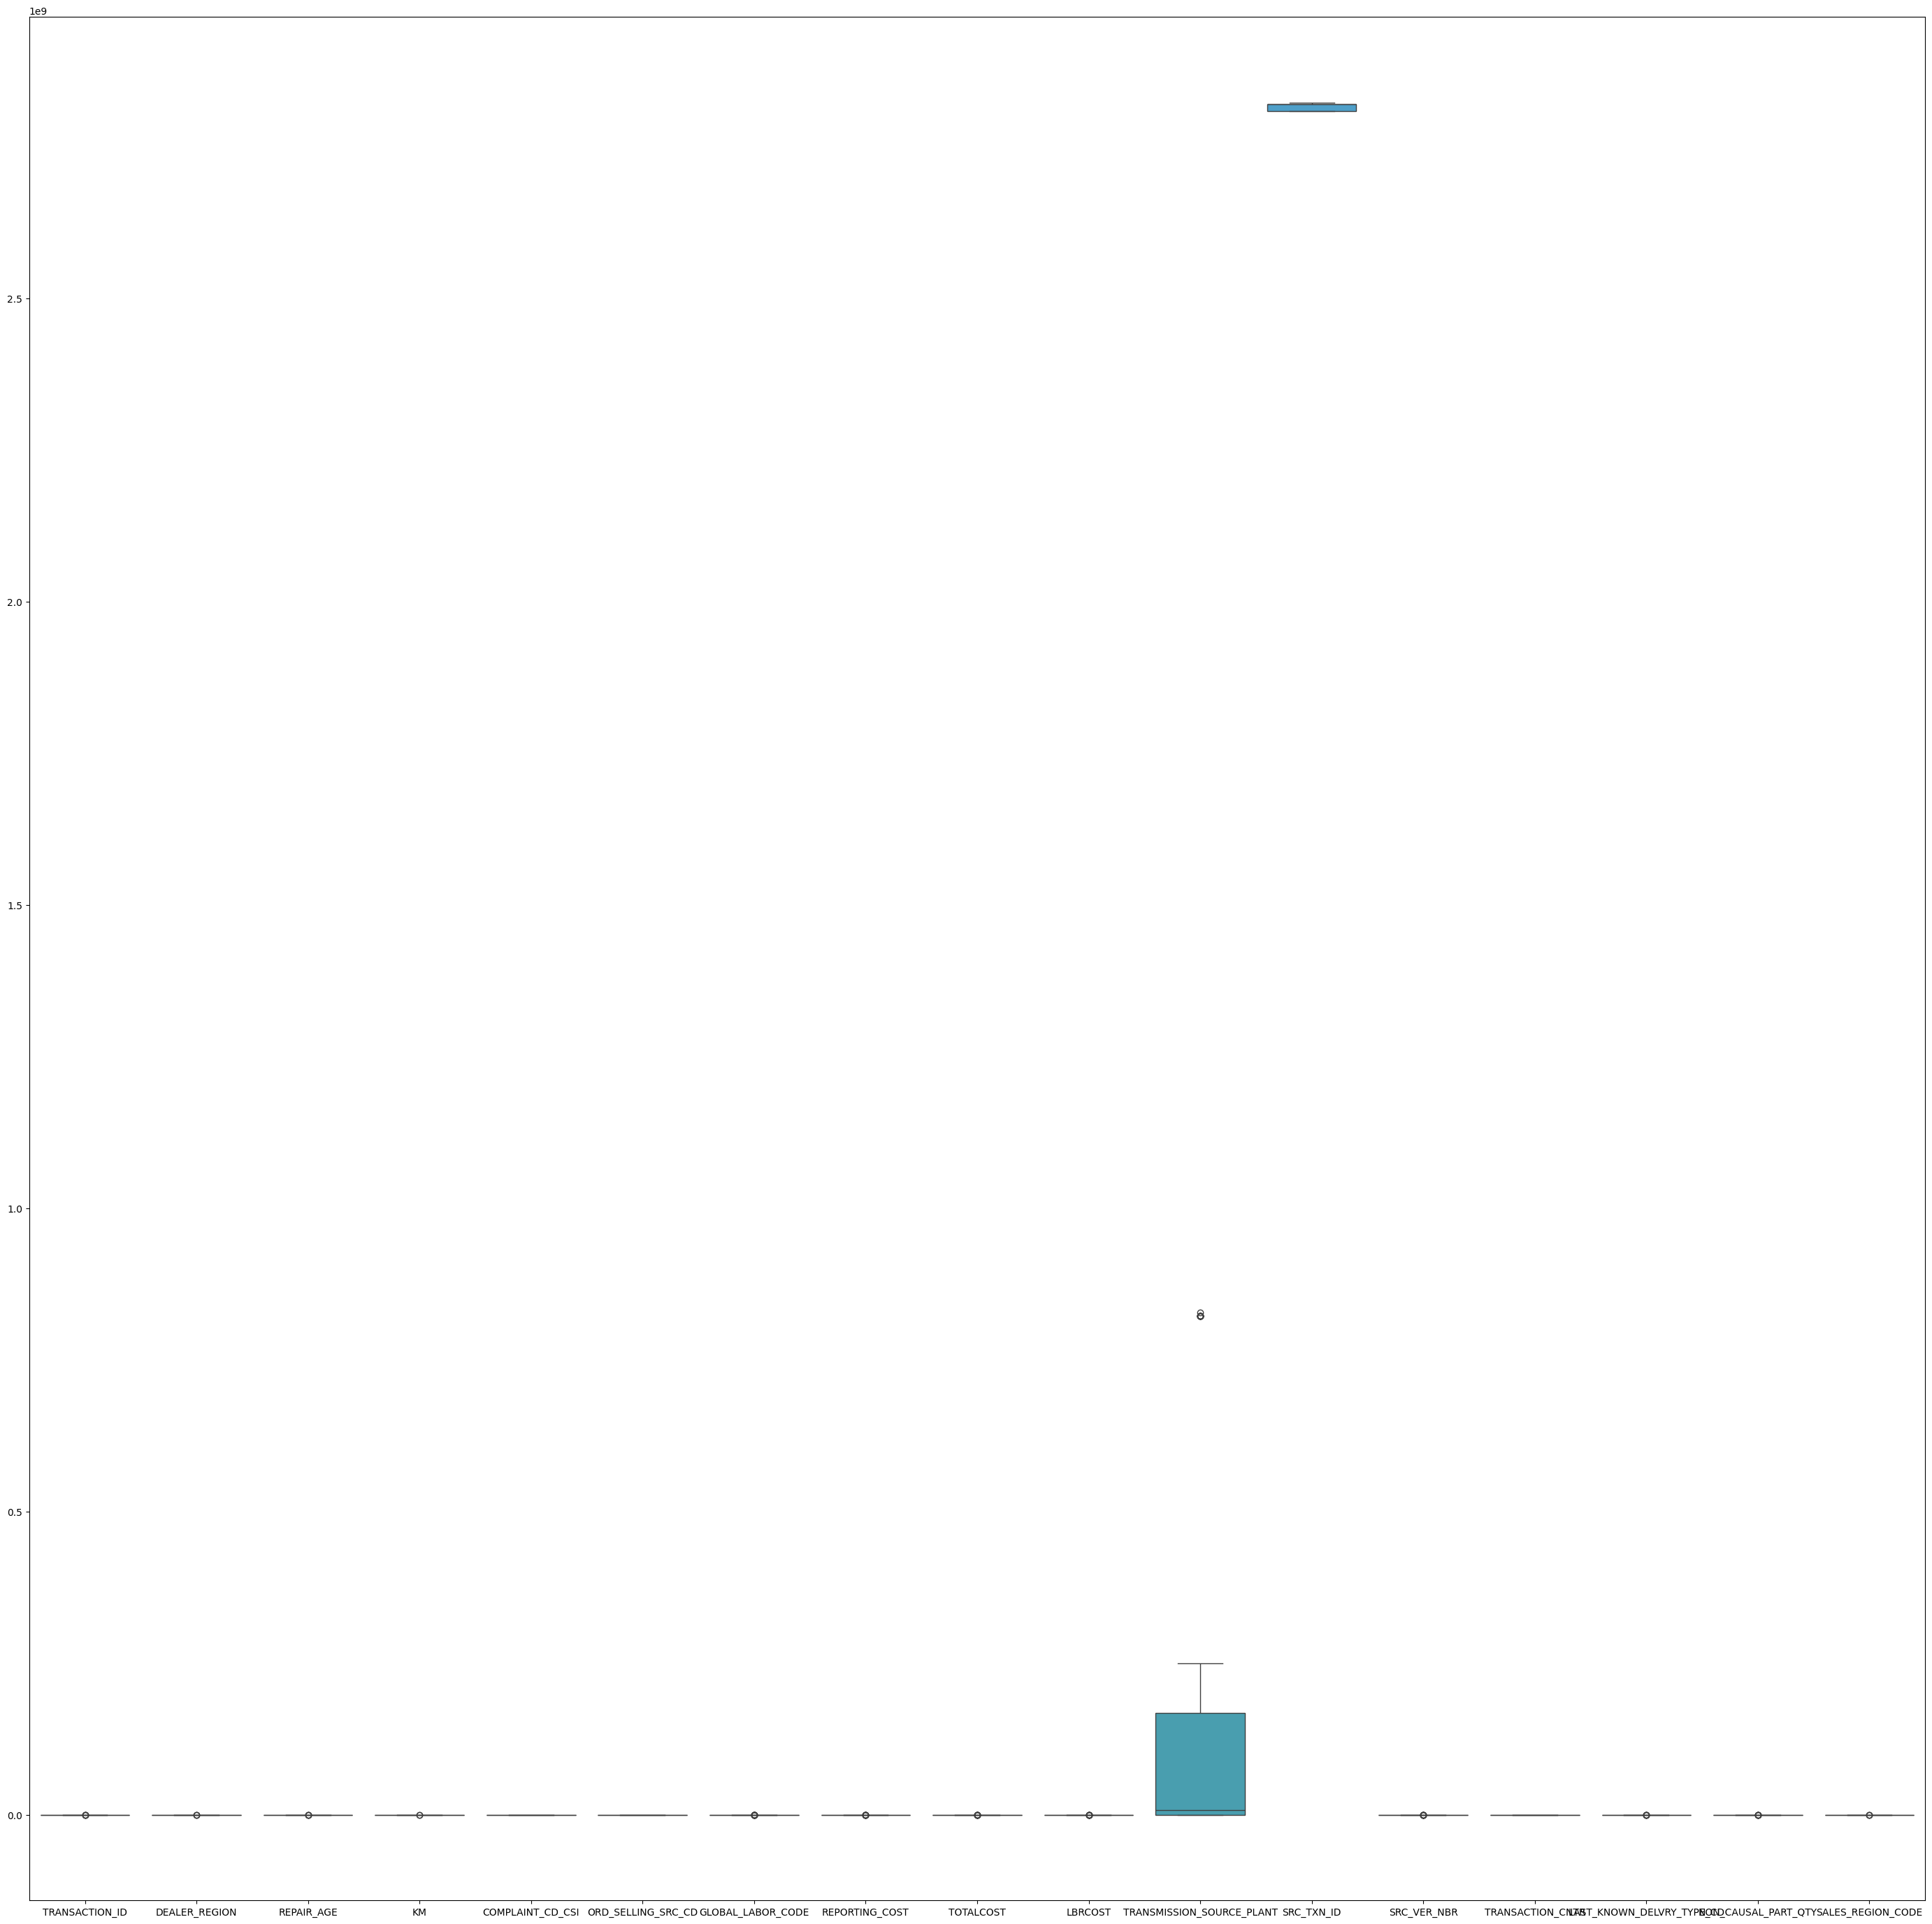

In [31]:
plt.figure(figsize=(35,35))
sns.boxplot(df)

#handle outliers all column in one frame:

<Axes: ylabel='KM'>

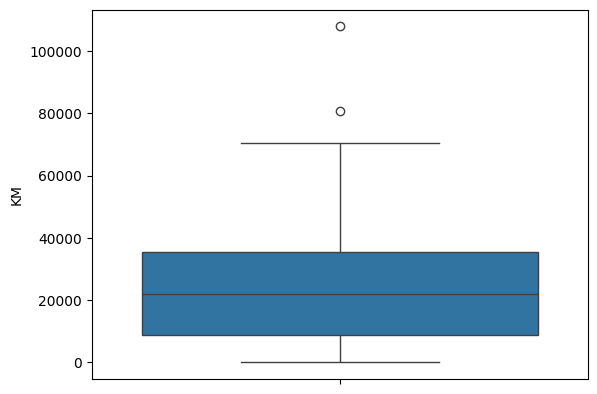

In [33]:
df.head(20)

VIN  TRANSACTION_ID  \
0   3HCFDDE89SH220903           13021   
1   1HRFFEE8XSZ230636           13028   
2   1HYKSMRK6SZ000990           13035   
3   3HCFDFEL3SH241701           13021   
4   1HRFFHEL1RZ181474           13021   
5   3HRFFHED7RH167541           13026   
6   1HRFFHEL4RZ149960           13071   
7   3HCFDFED4SH352945           13021   
8   1HRF9CED6NZ221061           13021   
9   1HRFFHEL8RZ133325           13074   
10  1HCFDHE86SZ274242           13023   
11  1HYKNDRS3MZ177921           13027   
12  1HYKSMRK4SZ001121           13025   
13  1H6DS5RK6S0127345           13025   
14  1HC4YSEY3RF110164           13023   
15  1HKS1JKL0SR282668           13024   
16  1HC4Y9EY2MF192148           13026   
17  1H1FZ6S00N4109597           13025   
18  1HNEVKKW6SJ216435           13025   
19  1HR49WEY2NF322460           13024   

                                  CORRECTION_VERBATIM  \
0                    REPLACED STEERING WHEEL NOW OKAY   
1   CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...   
2   APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...   
3                          STEERING WHEEL REPLACEMENT   
4       REPLACED STEERING MESSAGE NO LONGER DISPLAYED   
5      Remove and replace steering wheel wire harness   
6   ACCESSED, REMOVED AND REPLACED THE DRIVERS ASS...   
7                             REPLACED STEERING WHEEL   
8   TECHNICIAN FOUND THE STEERING COLUMN PLASTIC T...   
9                          Steering Wheel Replacement   
10  GAINED ACCESS AND REMOVED OLD STEERING WHEEL A...   
11  TECH REPLACED STEERING WHEEL TO CORRECT PRA 48...   
12                       REPLACED STEERING WHEEL ASMY   
13                     Replaced heated steering wheel   
14  CHECKED AND VERIFIED CUSTOMER CONCERN AND FOUN...   
15  VERIFIED CUSTOMER CONCERN ABOUT A HORN INOP. I...   
16                         Steering Wheel Replacement   
17         REPLACE STEERING WHEEL CHECK OK 1699-,0130   
18  INSTALLED SPECIAL ORDERED STEERING WHEEL DUE T...   
19            Reconnected horn checked operation, ok.   

                                    CUSTOMER_VERBATIM REPAIR_DATE  \
0                         STEERING WHEEL COMING APART  2024-01-02   
1          CUSTOMER STATES HEATED STEERING WHEEL INOP  2024-01-03   
2   OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...  2024-01-04   
3   CUSTOMER STATES THE LETTERING AND FINISH ON TH...  2024-01-04   
4   C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...  2024-01-05   
5     Horn and steering wheel switches are inoperable  2024-01-05   
6   CUST. STATES DRIVERS ASSIST LIGHT COMES ON DAS...  2024-01-05   
7   Special Order Part [ steering wheel heated ste...  2024-01-05   
8   CUSTOMER STATES STEERING WHEEL IS MAKING A RUB...  2024-01-08   
9   Customer states that they are getting a messag...  2024-01-09   
10  C/S: REMOVED STEERING WHEEL TO GAIN ACCESS TO ...  2024-01-09   
11  C/S: CUSTOMER STATES THERE IS A PIECE OF THE S...  2024-01-10   
12  (INSTALL SPECIAL ORDER PART) CUSTOMER STATES T...  2024-01-10   
13  Customer states heated steering wheel isnt wor...  2024-01-10   
14  CUSTOMER STATES STEERING WHEEL CONROL PASSENGE...  2024-01-10   
15  CUSTOMER STATES CK HORN ON THE STEERING WHEEL ...  2024-01-11   
16                         �������� ������ ����������  2024-01-11   
17  HEATED STEERING WHEEL INOP. WHEN YOU HIT THE B...  2024-01-11   
18                STEERING WHEEL FRAYING PARTS ARE IN  2024-01-11   
19  Added Operation horn doesnt work hasnt worked ...  2024-01-11   

                               CAUSAL_PART_NM  \
0                   WHEEL ASM-STRG *JET BLACK   
1                 MODULE ASM-STRG WHL HT CONT   
2               WHEEL ASM-STRG *BACKEN BLACKK   
3                   WHEEL ASM-STRG *JET BLACK   
4                   WHEEL ASM-STRG *JET BLACK   
5            HARNESS ASM-STRG WHL HORN SW WRG   
6                   WHEEL ASM-STRG *JET BLACK   
7                   WHEEL ASM-STRG *JET BLACK   
8                   WHEEL ASM-STRG *JET BLACK   
9                W

#Detect Inconsistencies & Suggest Fixes

In [35]:
%pip install fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 48.2 MB/s eta 0:00:00


In [38]:
import pandas as pd
import re
from fuzzywuzzy import process

# Function to detect inconsistencies
def find_inconsistencies(df, threshold=85):
    issues = {}

    for col in df.select_dtypes(include='object').columns:
        unique_vals = df[col].dropna().unique()
        cleaned_vals = [str(v).strip() for v in unique_vals]

        # Case-insensitive duplicates
        lower_map = {}
        for v in cleaned_vals:
            key = v.lower()
            if key not in lower_map:
                lower_map[key] = v
            else:
                if col not in issues:
                    issues[col] = []
                issues[col].append((v, lower_map[key], "Case mismatch"))

        # Special characters
        for v in cleaned_vals:
            if re.search(r'[^a-zA-Z0-9\s]', v):
                if col not in issues:
                    issues[col] = []
                issues[col].append((v, None, "Special character"))

        # Fuzzy matching for typos
        for v in cleaned_vals:
            matches = process.extract(v, cleaned_vals, limit=3)
            for m in matches:
                if m[0] != v and m[1] >= threshold:  # high similarity
                    if col not in issues:
                        issues[col] = []
                    issues[col].append((v, m[0], f"Possible typo (similarity={m[1]})"))

    return issues

# Run inconsistency detection
inconsistencies = find_inconsistencies(df)

# Show results
for col, problems in inconsistencies.items():
    print(f"\n--- {col} ---")
    for bad, good, reason in problems:
        print(f"  '{bad}' → '{good}'   ({reason})")


--- CORRECTION_VERBATIM ---
  'Steering Wheel Replacement' → 'STEERING WHEEL REPLACEMENT'   (Case mismatch)
  'Replaced steering wheel' → 'REPLACED STEERING WHEEL'   (Case mismatch)
  'REMOVE AND REPLACE STEERING WHEEL' → 'remove and replace steering wheel'   (Case mismatch)
  'replaced steering wheel' → 'REPLACED STEERING WHEEL'   (Case mismatch)
  'removed and replaced steering wheel' → 'REMOVED AND REPLACED STEERING WHEEL'   (Case mismatch)
  'CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.' → 'None'   (Special character)
  'APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DR

#Detect Inconsistencies

In [40]:
from fuzzywuzzy import process
import re

def generate_corrections(df, threshold=85):
    corrections = {}

    for col in df.select_dtypes(include='object').columns:
        unique_vals = df[col].dropna().unique()
        cleaned_vals = [str(v).strip() for v in unique_vals]

        # Standardize dictionary for this column
        col_map = {}

        # Case-insensitive duplicates
        for v in cleaned_vals:
            v_clean = v.strip()
            if v_clean.lower() not in col_map:
                col_map[v_clean.lower()] = v_clean
            else:
                corrections.setdefault(col, {})[v_clean] = col_map[v_clean.lower()]

        # Special characters: unify "-" with space
        for v in cleaned_vals:
            if "-" in v:
                corrections.setdefault(col, {})[v] = v.replace("-", " ")

        # Fuzzy matching for typos
        for v in cleaned_vals:
            matches = process.extract(v, cleaned_vals, limit=3)
            for m in matches:
                if m[0] != v and m[1] >= threshold:
                    corrections.setdefault(col, {})[v] = m[0]

    return corrections

# Generate correction mappings
corrections = generate_corrections(df)

# Preview suggestions
for col, mapping in corrections.items():
    print(f"\n--- Suggested fixes for {col} ---")
    for bad, good in mapping.items():
        print(f"  '{bad}' → '{good}'")



--- Suggested fixes for CORRECTION_VERBATIM ---
  'Steering Wheel Replacement' → 'DIAGNOSIS OF OPEN CIRCUIT INSIDE WHEEL. REPLACE STEERING WHEEL ( 0130 .3+ .4= .7 HRS ),Steering Wheel Replacement GM PREAUTH# 498654000000'
  'Replaced steering wheel' → 'REPLACED STEERING WHEEL.'
  'REMOVE AND REPLACE STEERING WHEEL' → 'REMOVED AND REPLACED STEERING WHEEL'
  'replaced steering wheel' → 'REPLACED STEERING WHEEL.'
  'removed and replaced steering wheel' → 'remove and replace steering wheel'
  'CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.' → 'TECHNICIAN FOUND THE STEERING COLUMN PLASTIC TRIM WAS NOT ALIGNED PROPERLY ADJUSTED TRIM AND FOUND THE CUSTOMER CONCERN IS NOLONGER PRESENT'
  'APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMI

#Apply Cleaning

In [41]:
def apply_corrections(df, corrections):
    for col, mapping in corrections.items():
        df[col] = df[col].replace(mapping)
        # Standardize capitalization to Title Case for stakeholders
        df[col] = df[col].str.strip().str.title()
    return df

# Apply cleaning
df_cleaned = apply_corrections(df.copy(), corrections)


#Verify

In [42]:
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df_cleaned[col].unique())



Unique values in VIN:
['3HCFDDE89SH220903' '1HRFFEE8XSZ230636' '1HYKSMRK6SZ000990'
 '3HCFDFEL3SH241701' '1HRFFHEL1RZ181474' '3HRFFHED7RH167541'
 '1HRFFHEL4RZ149960' '3HCFDFED4SH352945' '1HRF9CED6NZ221061'
 '1HRFFHEL8RZ133325' '1HCFDHE86SZ274242' '1HYKNDRS3MZ177921'
 '1HYKSMRK4SZ001121' '1H6DS5RK6S0127345' '1HC4YSEY3RF110164'
 '1HKS1JKL0SR282668' '1HC4Y9EY2MF192148' '1H1FZ6S00N4109597'
 '1HNEVKKW6SJ216435' '1HR49WEY2NF322460' '3HRFFCER3NH528824'
 '1HYKNDR46NZ151056' '1HNEVNKW4SJ144359' '3HRS9EED0LH255650'
 '1HKS2JKR2NR336997' '1HCFDEED3SZ308171' '1HYKNHRS1LZ157005'
 '1HCFYEED6NZ182017' '1HCFDEED5SZ117691' '3HNKBHRS8SS220860'
 '1HR49SE7XRF103023' '3HRFFEE82RH175165' '3HCND9ED5SH144160'
 '1HYKSSRL1RZ101481' '1HR49REY4SF251024' '3HCFDFED5SH364828'
 '2HC4YSEY1S1701193' '1HKS2JKL9MR285352' '1HNSKRKD0RR120386'
 '1HCFDEER5NZ580922' '1HRS9EED3MZ313803' '2HCFDEED4R1147650'
 '1HR49XEY0RF190021' '1HR19SEY5RF265525' '1HCFYEEL0NZ210174'
 '1HCFDEED0NZ543303' '1HCRYDED2NZ208869' '5HAERBKW0LJ197079'
 

In [43]:
df_cleaned.head(20)

VIN  TRANSACTION_ID  \
0   3HCFDDE89SH220903           13021   
1   1HRFFEE8XSZ230636           13028   
2   1HYKSMRK6SZ000990           13035   
3   3HCFDFEL3SH241701           13021   
4   1HRFFHEL1RZ181474           13021   
5   3HRFFHED7RH167541           13026   
6   1HRFFHEL4RZ149960           13071   
7   3HCFDFED4SH352945           13021   
8   1HRF9CED6NZ221061           13021   
9   1HRFFHEL8RZ133325           13074   
10  1HCFDHE86SZ274242           13023   
11  1HYKNDRS3MZ177921           13027   
12  1HYKSMRK4SZ001121           13025   
13  1H6DS5RK6S0127345           13025   
14  1HC4YSEY3RF110164           13023   
15  1HKS1JKL0SR282668           13024   
16  1HC4Y9EY2MF192148           13026   
17  1H1FZ6S00N4109597           13025   
18  1HNEVKKW6SJ216435           13025   
19  1HR49WEY2NF322460           13024   

                                  CORRECTION_VERBATIM  \
0                             Replaced Steering Wheel   
1   Technician Found The Steering Column Plastic T...   
2   Accessed, Removed And Replaced The Drivers Ass...   
3   Diagnosis Of Open Circuit Inside Wheel. Replac...   
4   Accessed, Removed And Replaced The Drivers Ass...   
5                   Remove And Replace Steering Wheel   
6       Replaced Steering Message No Longer Displayed   
7                            Replaced Steering Wheel.   
8   Checked - Found Dtc'S U0229 - U1530 Set In Bcm...   
9   Diagnosis Of Open Circuit Inside Wheel. Replac...   
10      Replaced Steering Message No Longer Displayed   
11                            Replaced Steering Wheel   
12                            Replaced Steering Wheel   
13                            Replaced Steering Wheel   
14  Checked - Found Dtc'S U0229 - U1530 Set In Bcm...   
15  Approved 4.9(Olh) For Added Diagnostics With T...   
16  Diagnosis Of Open Circuit Inside Wheel. Replac...   
17                             Replace Steering Wheel   
18  Checked - Found Dtc'S U0229 - U1530 Set In Bcm...   
19  Checked And Verified Customer Concern And Foun...   

                                    CUSTOMER_VERBATIM REPAIR_DATE  \
0          Customer States Heated Steering Wheel Inop  2024-01-02   
1                          Heated Steering Wheel Inop  2024-01-03   
2          Customer States Heated Steering Wheel Inop  2024-01-04   
3          Customer States Heated Steering Wheel Inop  2024-01-04   
4   Owner Reports: The Super Cruise Bar On The Ste...  2024-01-05   
5   Owner Reports: The Super Cruise Bar On The Ste...  2024-01-05   
6   C/S: Customer States The Service Driver Assist...  2024-01-05   
7          Customer States Heated Steering Wheel Inop  2024-01-05   
8          Customer States Heated Steering Wheel Inop  2024-01-08   
9     Horn And Steering Wheel Switches Are Inoperable  2024-01-09   
10  Owner Reports: The Super Cruise Bar On The Ste...  2024-01-09   
11         Customer States Heated Steering Wheel Inop  2024-01-10   
12         Customer States Heated Steering Wheel Inop  2024-01-10   
13  Customer States Heated Steering Wheel Is Not W...  2024-01-10   
14         Customer States Heated Steering Wheel Inop  2024-01-10   
15         Customer States Heated Steering Wheel Inop  2024-01-11   
16                         �������� ������ ����������  2024-01-11   
17                        Steering Wheel Coming Apart  2024-01-11   
18  Customer States The Lettering And Finish On Th...  2024-01-11   
19  Customer States The Lettering And Finish On Th...  2024-01-11   

                                   CAUSAL_PART_NM  \
0                           Wheel Asm-Strg *Black   
1      Applique Asm-Strg Whl Tr Spoke Cvr *Vulcan   
2   Applique Asm-Strg Whl Tr Spoke Cvr *Jet Black   
3                           Wheel Asm-Strg *Black   
4                           Wheel Asm-Strg *Black   
5                            Wheel Asm-Strg *Fawn   
6                           Wheel Asm-Strg *Black   
7                           Wheel Asm-Strg *Black   
8                           Whe

In [75]:
import numpy as np

# Detect non-ASCII / corrupted values in categorical columns
def clean_garbage_text(df, replacement="Unknown"):
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].apply(
            lambda x: replacement if isinstance(x, str) and not x.isascii() else x
        )
    return df  # Explicitly return the modified dataframe

# Apply cleaning
df_cleaned = apply_corrections(df.copy(), corrections)
df_cleaned = clean_garbage_text(df_cleaned, replacement="Unknown")


# Verify
for col in df_cleaned.select_dtypes(include='object').columns:
    if "Unknown" in df_cleaned[col].values:
        print(f"Replaced garbage text in {col}")

Replaced garbage text in CORRECTION_VERBATIM
Replaced garbage text in CUSTOMER_VERBATIM


In [76]:
df_cleaned.head(20)

VIN  TRANSACTION_ID  \
0   3HCFDDE89SH220903           13021   
1   1HRFFEE8XSZ230636           13028   
2   1HYKSMRK6SZ000990           13035   
3   3HCFDFEL3SH241701           13021   
4   1HRFFHEL1RZ181474           13021   
5   3HRFFHED7RH167541           13026   
6   1HRFFHEL4RZ149960           13071   
7   3HCFDFED4SH352945           13021   
8   1HRF9CED6NZ221061           13021   
9   1HRFFHEL8RZ133325           13074   
10  1HCFDHE86SZ274242           13023   
11  1HYKNDRS3MZ177921           13027   
12  1HYKSMRK4SZ001121           13025   
13  1H6DS5RK6S0127345           13025   
14  1HC4YSEY3RF110164           13023   
15  1HKS1JKL0SR282668           13024   
16  1HC4Y9EY2MF192148           13026   
17  1H1FZ6S00N4109597           13025   
18  1HNEVKKW6SJ216435           13025   
19  1HR49WEY2NF322460           13024   

                                  CORRECTION_VERBATIM  \
0                             Replaced Steering Wheel   
1   Technician Found The Steering Column Plastic T...   
2   Accessed, Removed And Replaced The Drivers Ass...   
3   Diagnosis Of Open Circuit Inside Wheel. Replac...   
4   Accessed, Removed And Replaced The Drivers Ass...   
5                   Remove And Replace Steering Wheel   
6       Replaced Steering Message No Longer Displayed   
7                            Replaced Steering Wheel.   
8   Checked - Found Dtc'S U0229 - U1530 Set In Bcm...   
9   Diagnosis Of Open Circuit Inside Wheel. Replac...   
10      Replaced Steering Message No Longer Displayed   
11                            Replaced Steering Wheel   
12                            Replaced Steering Wheel   
13                            Replaced Steering Wheel   
14  Checked - Found Dtc'S U0229 - U1530 Set In Bcm...   
15  Approved 4.9(Olh) For Added Diagnostics With T...   
16  Diagnosis Of Open Circuit Inside Wheel. Replac...   
17                             Replace Steering Wheel   
18  Checked - Found Dtc'S U0229 - U1530 Set In Bcm...   
19  Checked And Verified Customer Concern And Foun...   

                                    CUSTOMER_VERBATIM REPAIR_DATE  \
0          Customer States Heated Steering Wheel Inop  2024-01-02   
1                          Heated Steering Wheel Inop  2024-01-03   
2          Customer States Heated Steering Wheel Inop  2024-01-04   
3          Customer States Heated Steering Wheel Inop  2024-01-04   
4   Owner Reports: The Super Cruise Bar On The Ste...  2024-01-05   
5   Owner Reports: The Super Cruise Bar On The Ste...  2024-01-05   
6   C/S: Customer States The Service Driver Assist...  2024-01-05   
7          Customer States Heated Steering Wheel Inop  2024-01-05   
8          Customer States Heated Steering Wheel Inop  2024-01-08   
9     Horn And Steering Wheel Switches Are Inoperable  2024-01-09   
10  Owner Reports: The Super Cruise Bar On The Ste...  2024-01-09   
11         Customer States Heated Steering Wheel Inop  2024-01-10   
12         Customer States Heated Steering Wheel Inop  2024-01-10   
13  Customer States Heated Steering Wheel Is Not W...  2024-01-10   
14         Customer States Heated Steering Wheel Inop  2024-01-10   
15         Customer States Heated Steering Wheel Inop  2024-01-11   
16                                            Unknown  2024-01-11   
17                        Steering Wheel Coming Apart  2024-01-11   
18  Customer States The Lettering And Finish On Th...  2024-01-11   
19  Customer States The Lettering And Finish On Th...  2024-01-11   

                                   CAUSAL_PART_NM  \
0                           Wheel Asm-Strg *Black   
1      Applique Asm-Strg Whl Tr Spoke Cvr *Vulcan   
2   Applique Asm-Strg Whl Tr Spoke Cvr *Jet Black   
3                           Wheel Asm-Strg *Black   
4                           Wheel Asm-Strg *Black   
5                            Wheel Asm-Strg *Fawn   
6                           Wheel Asm-Strg *Black   
7                           Wheel Asm-Strg *Black   
8                           Whe

In [77]:
for col in df_cleaned.select_dtypes(include='object').columns:
    print(f"\nunique values in {col}:")
    print(df_cleaned[col].unique())


unique values in VIN:
['3HCFDDE89SH220903' '1HRFFEE8XSZ230636' '1HYKSMRK6SZ000990'
 '3HCFDFEL3SH241701' '1HRFFHEL1RZ181474' '3HRFFHED7RH167541'
 '1HRFFHEL4RZ149960' '3HCFDFED4SH352945' '1HRF9CED6NZ221061'
 '1HRFFHEL8RZ133325' '1HCFDHE86SZ274242' '1HYKNDRS3MZ177921'
 '1HYKSMRK4SZ001121' '1H6DS5RK6S0127345' '1HC4YSEY3RF110164'
 '1HKS1JKL0SR282668' '1HC4Y9EY2MF192148' '1H1FZ6S00N4109597'
 '1HNEVKKW6SJ216435' '1HR49WEY2NF322460' '3HRFFCER3NH528824'
 '1HYKNDR46NZ151056' '1HNEVNKW4SJ144359' '3HRS9EED0LH255650'
 '1HKS2JKR2NR336997' '1HCFDEED3SZ308171' '1HYKNHRS1LZ157005'
 '1HCFYEED6NZ182017' '1HCFDEED5SZ117691' '3HNKBHRS8SS220860'
 '1HR49SE7XRF103023' '3HRFFEE82RH175165' '3HCND9ED5SH144160'
 '1HYKSSRL1RZ101481' '1HR49REY4SF251024' '3HCFDFED5SH364828'
 '2HC4YSEY1S1701193' '1HKS2JKL9MR285352' '1HNSKRKD0RR120386'
 '1HCFDEER5NZ580922' '1HRS9EED3MZ313803' '2HCFDEED4R1147650'
 '1HR49XEY0RF190021' '1HR19SEY5RF265525' '1HCFYEEL0NZ210174'
 '1HCFDEED0NZ543303' '1HCRYDED2NZ208869' '5HAERBKW0LJ197079'
 

#NOw Removed all garbage text by using fuzzywuzzy library

<Axes: >

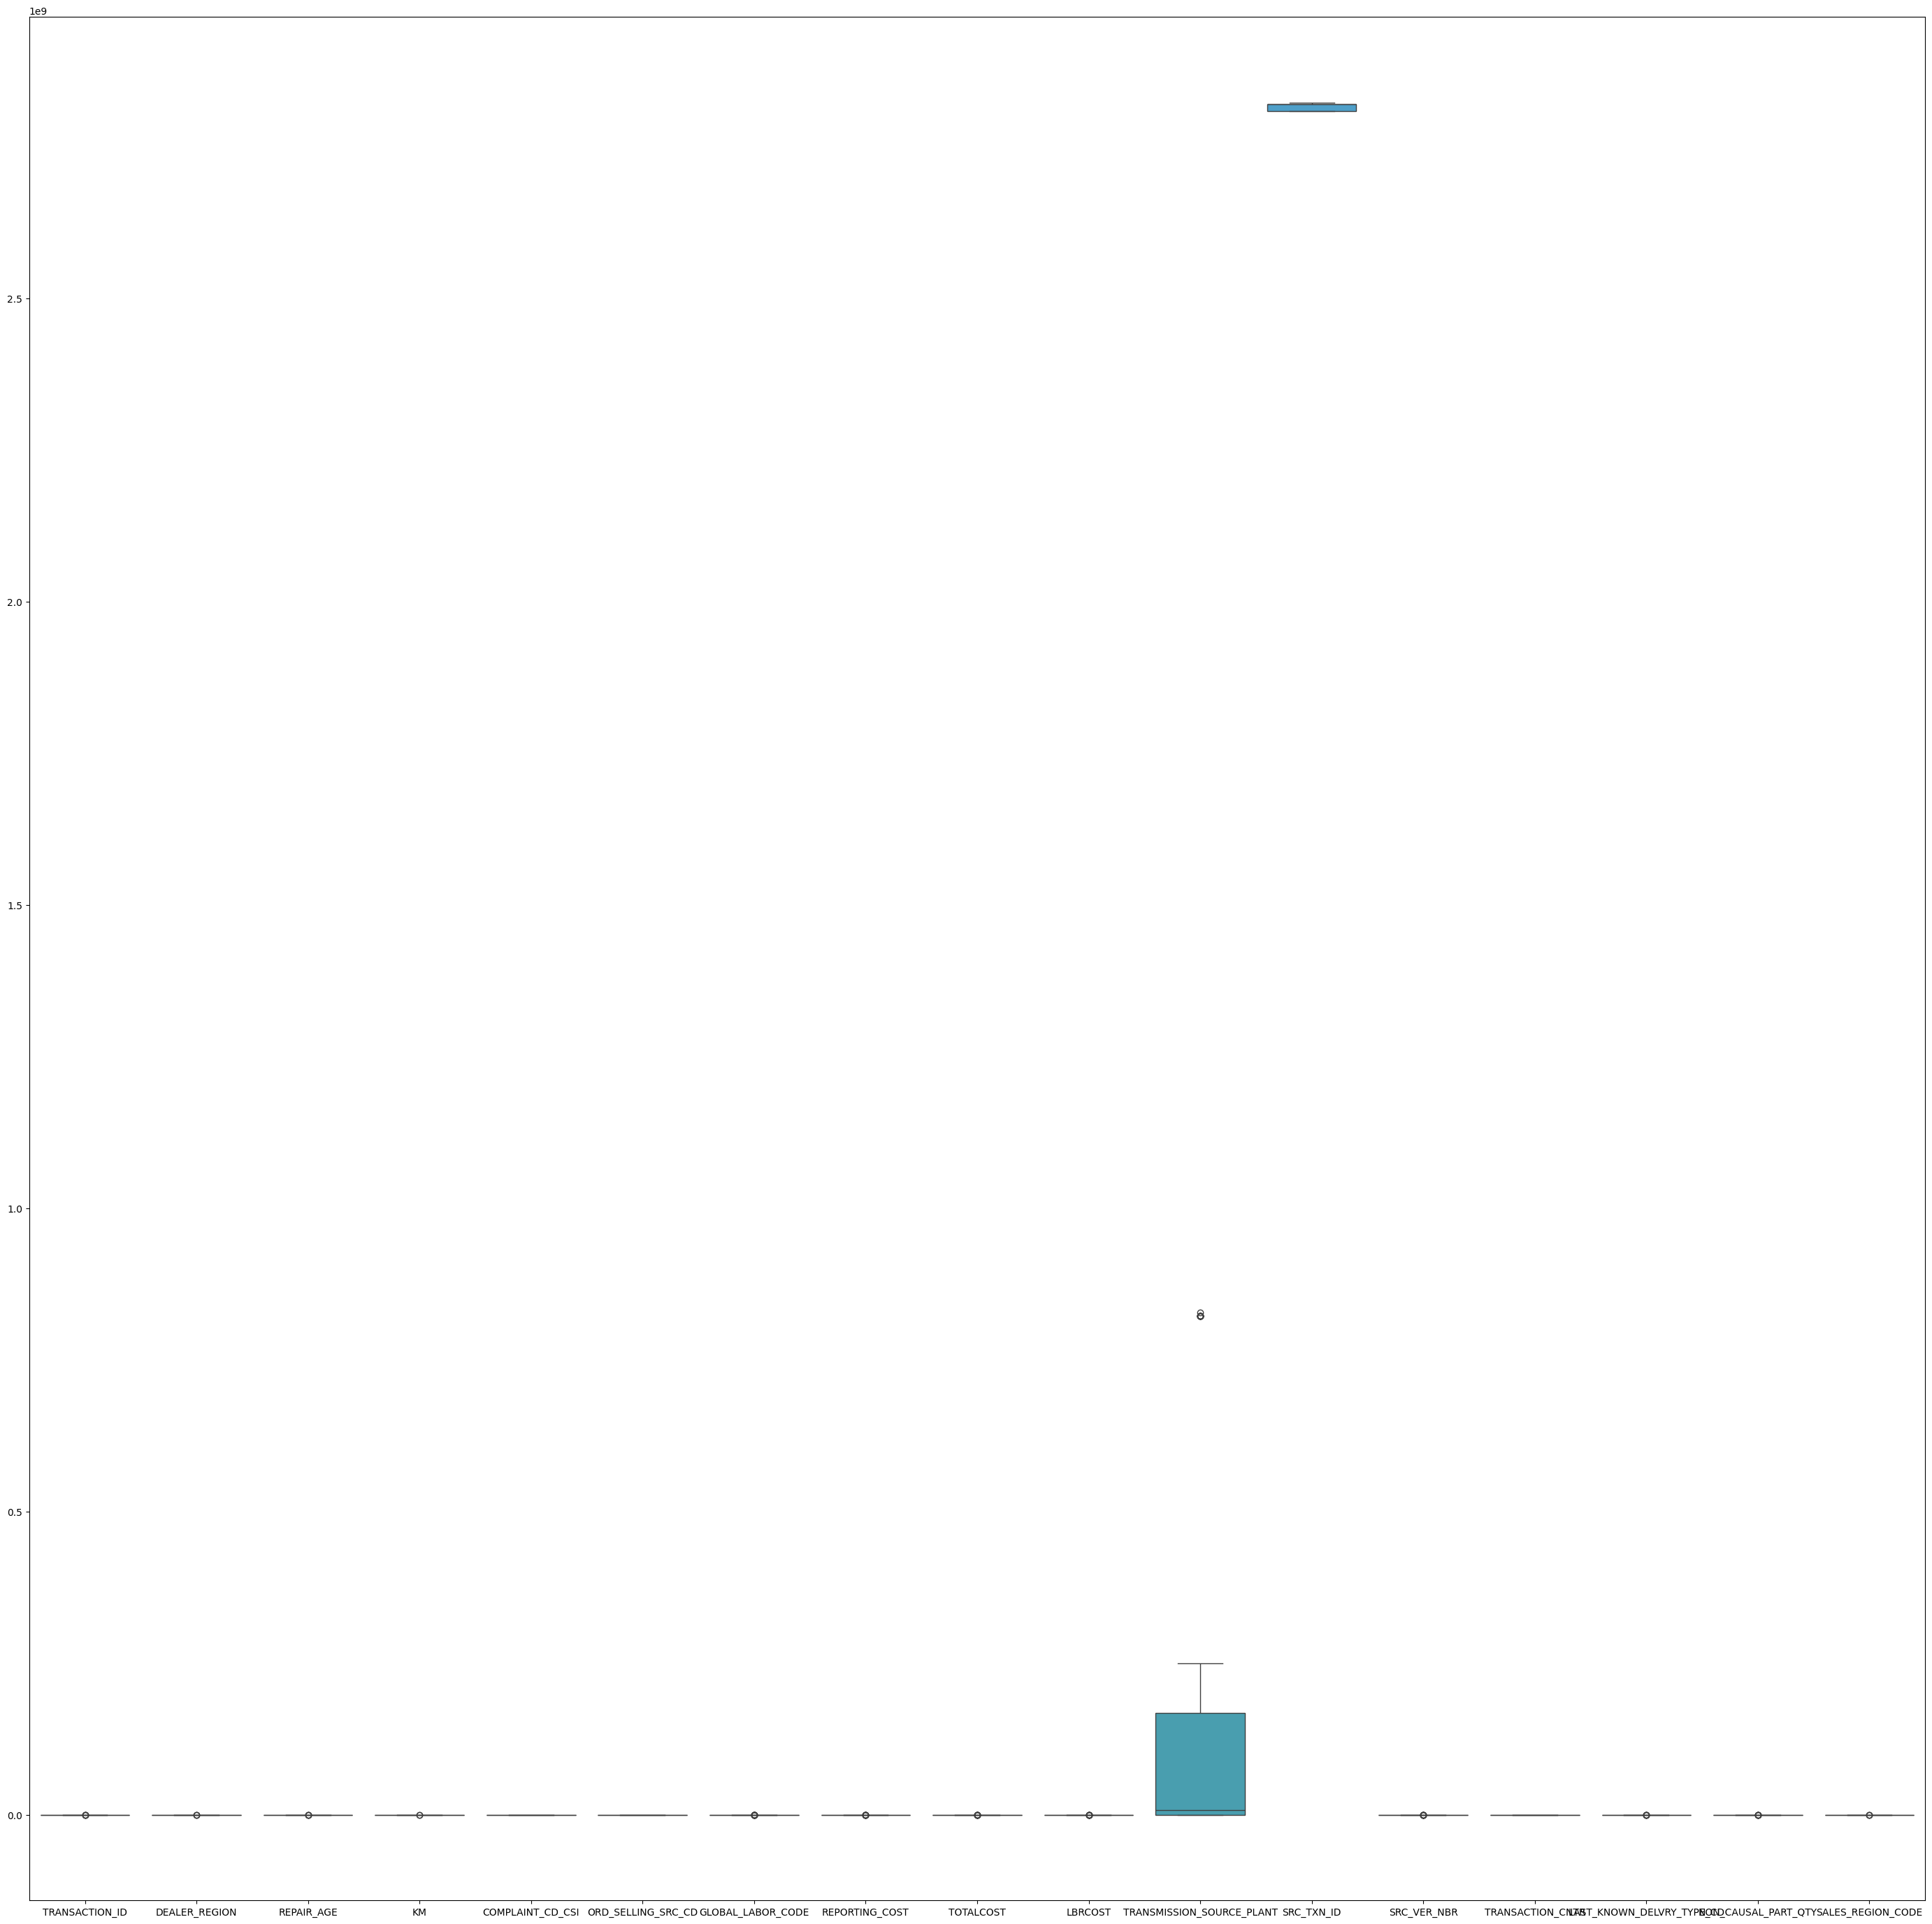

In [78]:
plt.figure(figsize=(35,35))
sns.boxplot(df_cleaned)

In [79]:
#handle outliers:
for col in df_cleaned.select_dtypes(include=np.number).columns:
  df_cleaned[col] = np.where(df_cleaned[col].between(df_cleaned[col].quantile(0.1), df_cleaned[col].quantile(0.99)), df_cleaned[col], df_cleaned[col].quantile(0.75))

<Axes: >

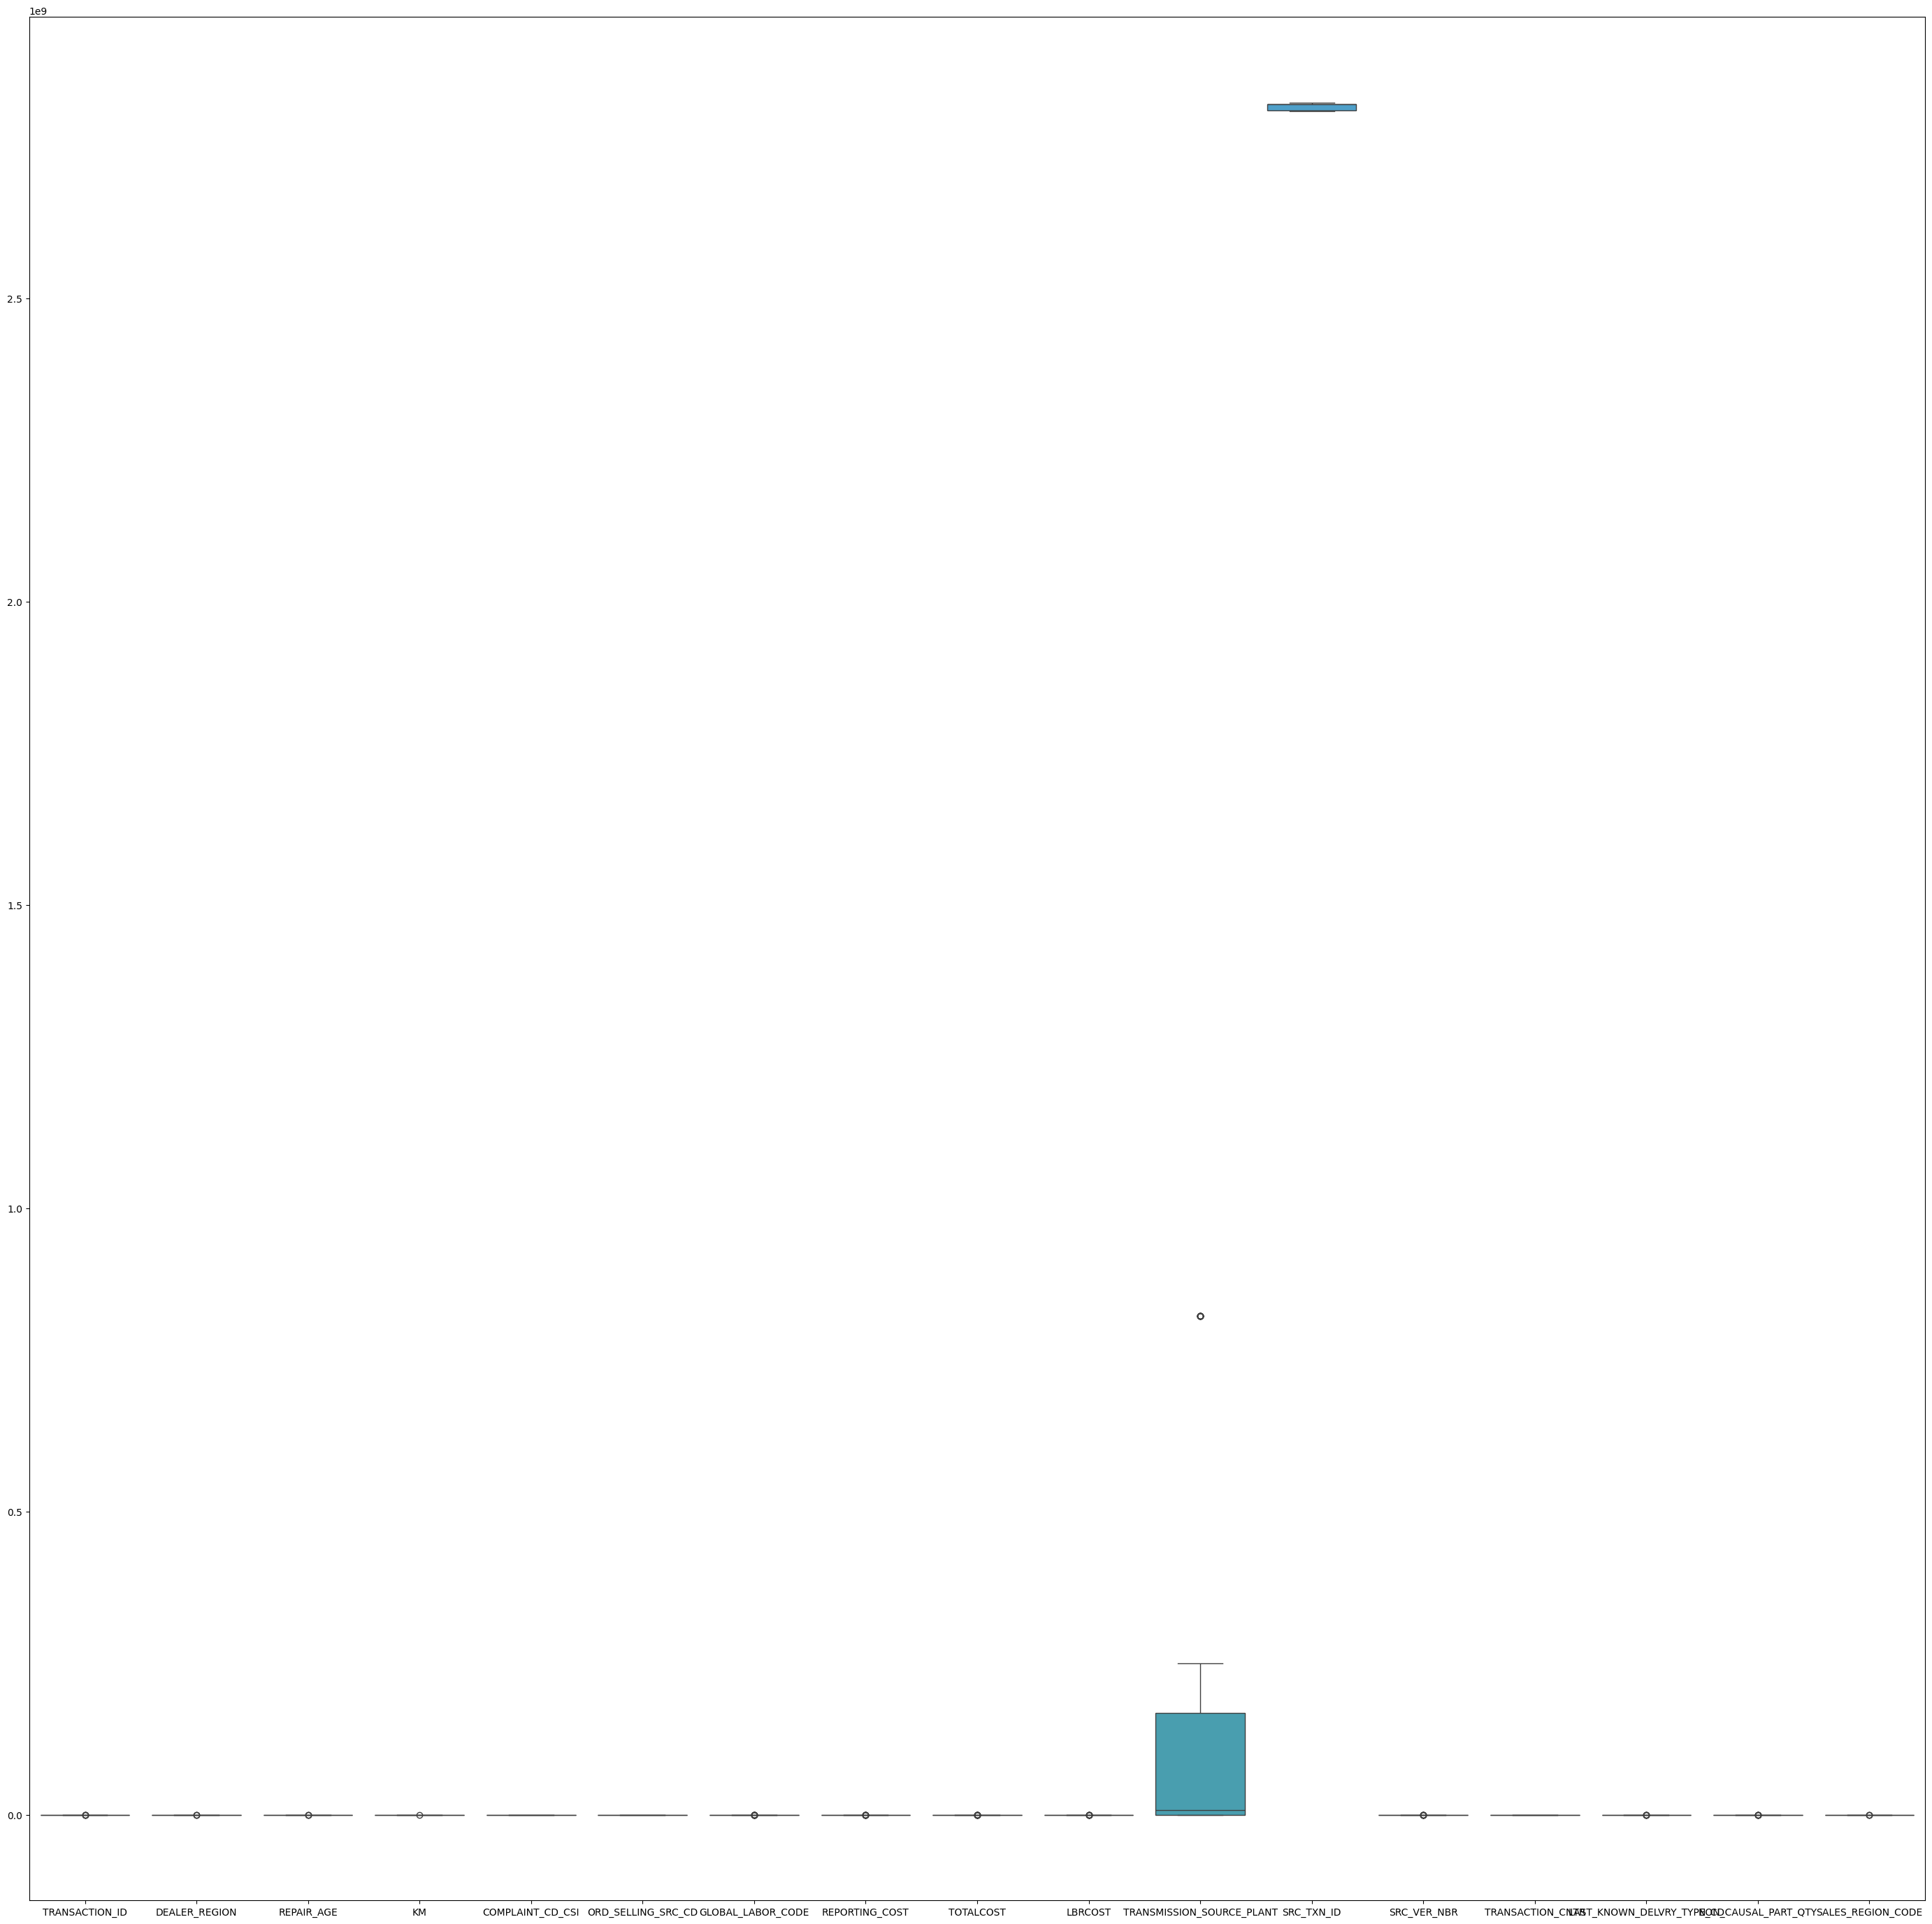

In [80]:
plt.figure(figsize=(35,35))
sns.boxplot(df_cleaned)

Correlation Matrix:
                           TRANSACTION_ID  DEALER_REGION  REPAIR_AGE  \
TRANSACTION_ID                   1.000000      -0.101559   -0.098089   
DEALER_REGION                   -0.101559       1.000000    0.032915   
REPAIR_AGE                      -0.098089       0.032915    1.000000   
KM                              -0.070144       0.018366    0.643286   
COMPLAINT_CD_CSI                      NaN            NaN         NaN   
ORD_SELLING_SRC_CD              -0.005893       0.452254    0.131825   
GLOBAL_LABOR_CODE                0.002557      -0.041346   -0.000328   
REPORTING_COST                   0.237871      -0.122769   -0.257771   
TOTALCOST                        0.285325      -0.136533   -0.235559   
LBRCOST                          0.021481      -0.027174    0.057660   
TRANSMISSION_SOURCE_PLANT       -0.180218      -0.094418    0.066761   
SRC_TXN_ID                       0.455466      -0.105558   -0.015595   
SRC_VER_NBR                      0.323229   

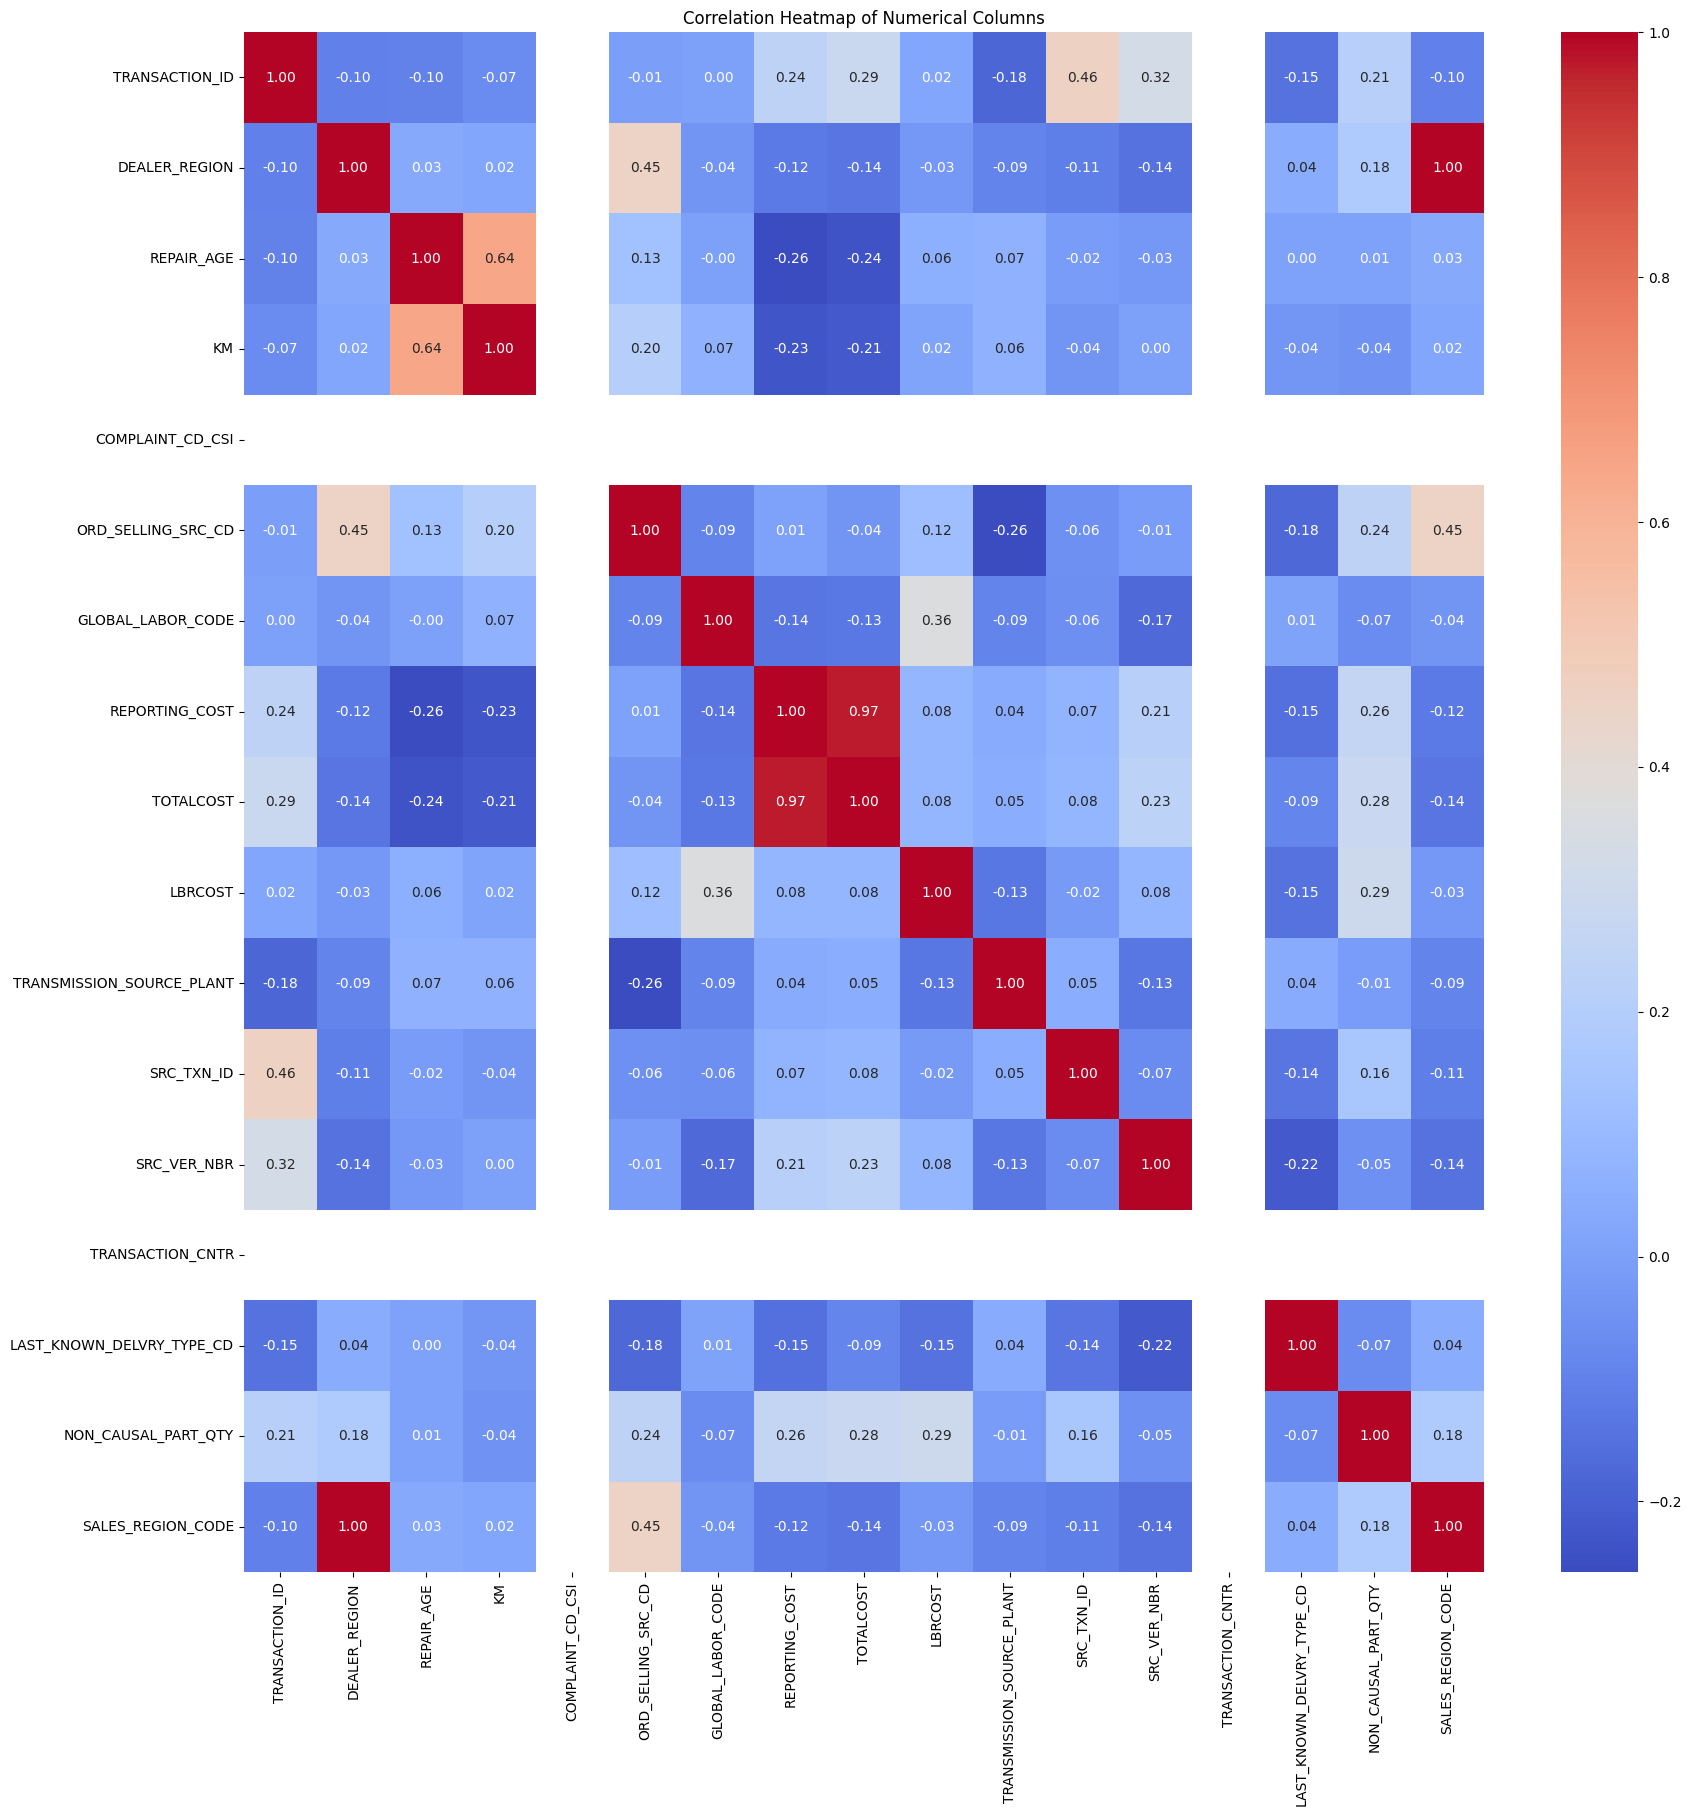

In [81]:
#correlation
corr_matrix = df_cleaned.corr(numeric_only=True)

# Print correlations
print("Correlation Matrix:")
print(corr_matrix)

# Heatmap for better visualization
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

#From the above correlation
#Top 5 features are:
- 1.TRANSACTION_ID
- 2.REPAIR AGE
- 3.REPORTING COST
- 4.TOTAL COST
- 5.SRC_TXN_ID

#Visualization:

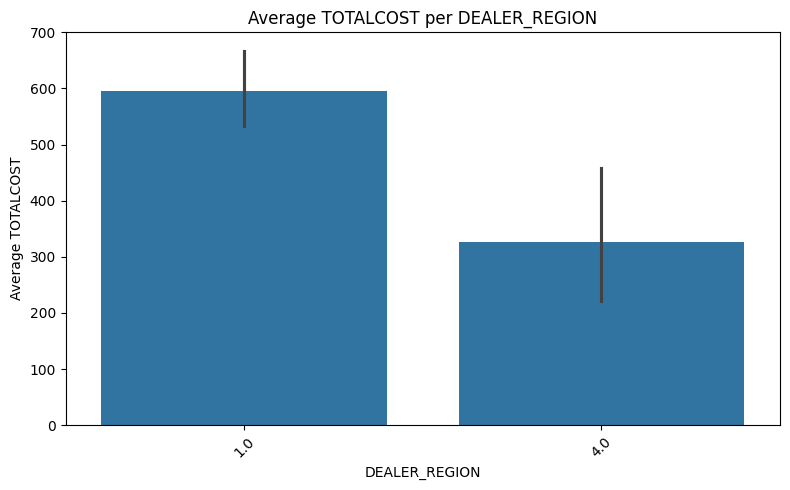

In [98]:
col ="DEALER_REGION"
num_col ="TOTALCOST"
plt.figure(figsize=(8,5))
sns.barplot(data=df_cleaned, x=col, y=num_col, estimator="mean", order=df_cleaned.groupby(col)[num_col].mean().sort_values(ascending=False).index[:10])
plt.xticks(rotation=45)
plt.title(f"Average {num_col} per {col}")
plt.xlabel(col)
plt.ylabel(f"Average {num_col}")
plt.tight_layout()
plt.show()


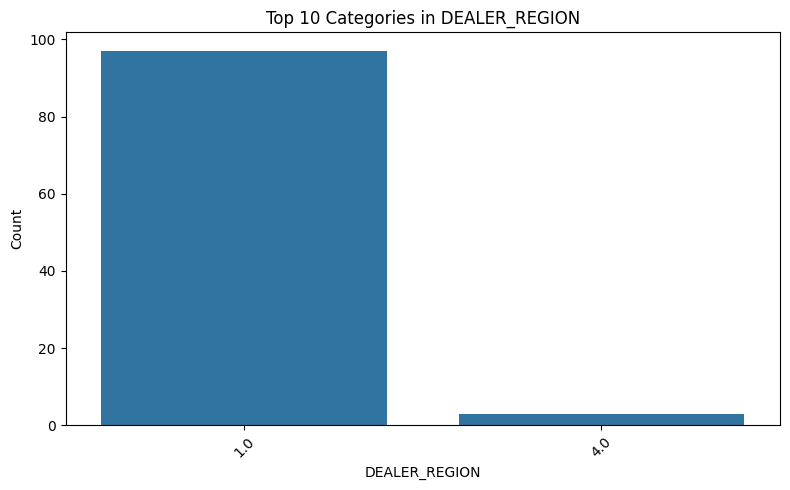

In [95]:
col = "DEALER_REGION"

plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x=col, order=df_cleaned[col].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title(f"Top 10 Categories in {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

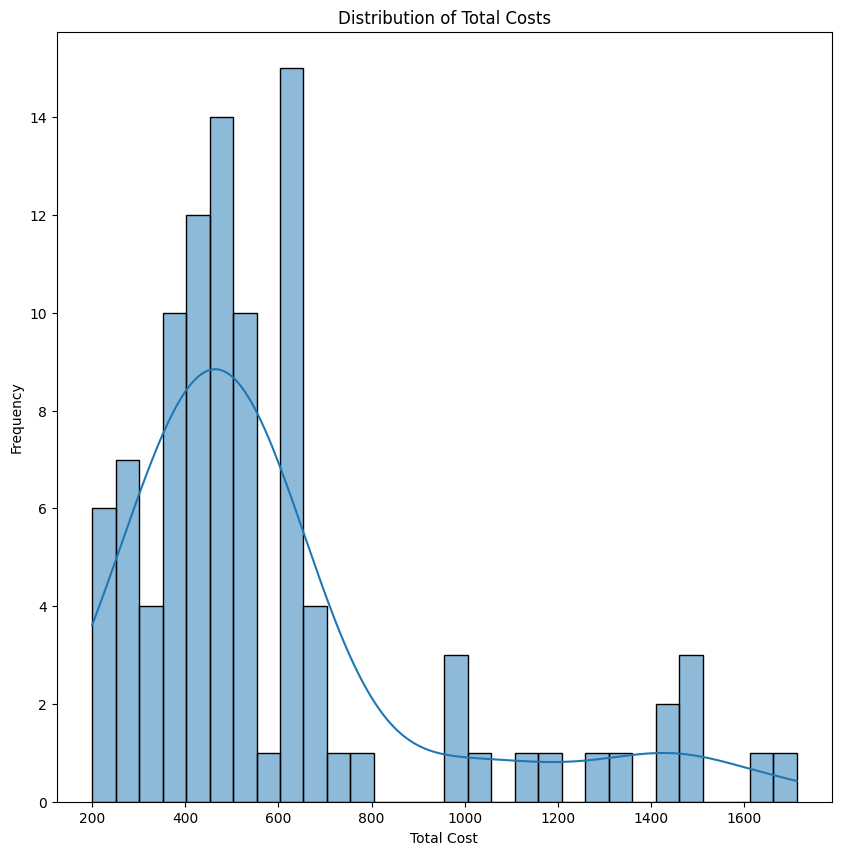

In [82]:
plt.figure(figsize=(10,10))
sns.histplot(df_cleaned['TOTALCOST'], bins=30, kde=True)
plt.title("Distribution of Total Costs")
plt.xlabel("Total Cost")
plt.ylabel("Frequency")
plt.show()

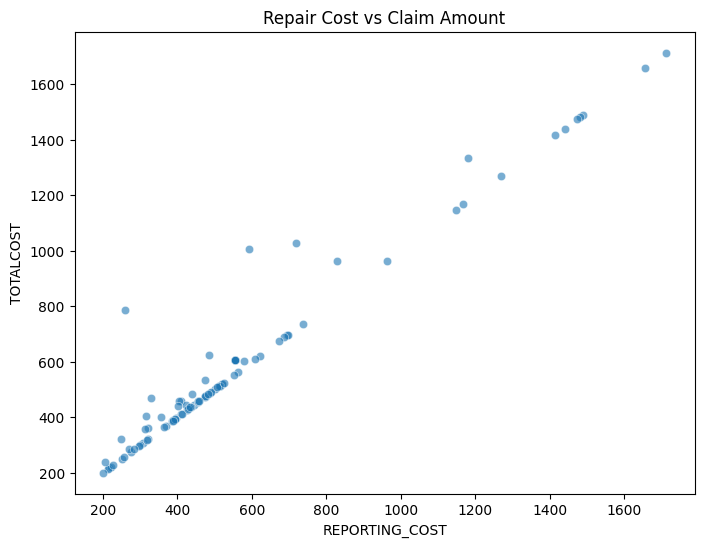

In [87]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="REPORTING_COST", y="TOTALCOST", data=df_cleaned, alpha=0.6)
plt.title("Repair Cost vs Claim Amount")
plt.show()

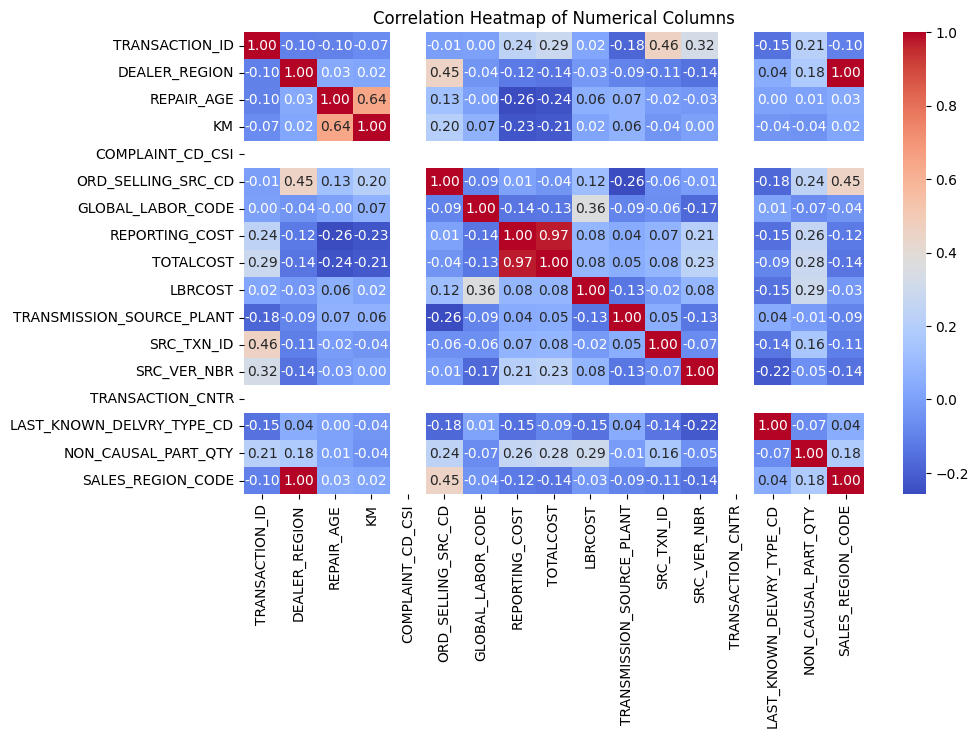

In [88]:
plt.figure(figsize=(10,6))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [86]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    float64       
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 100 non-null    object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          100 non-null    object        
 11  BUILD_COUNTRY       

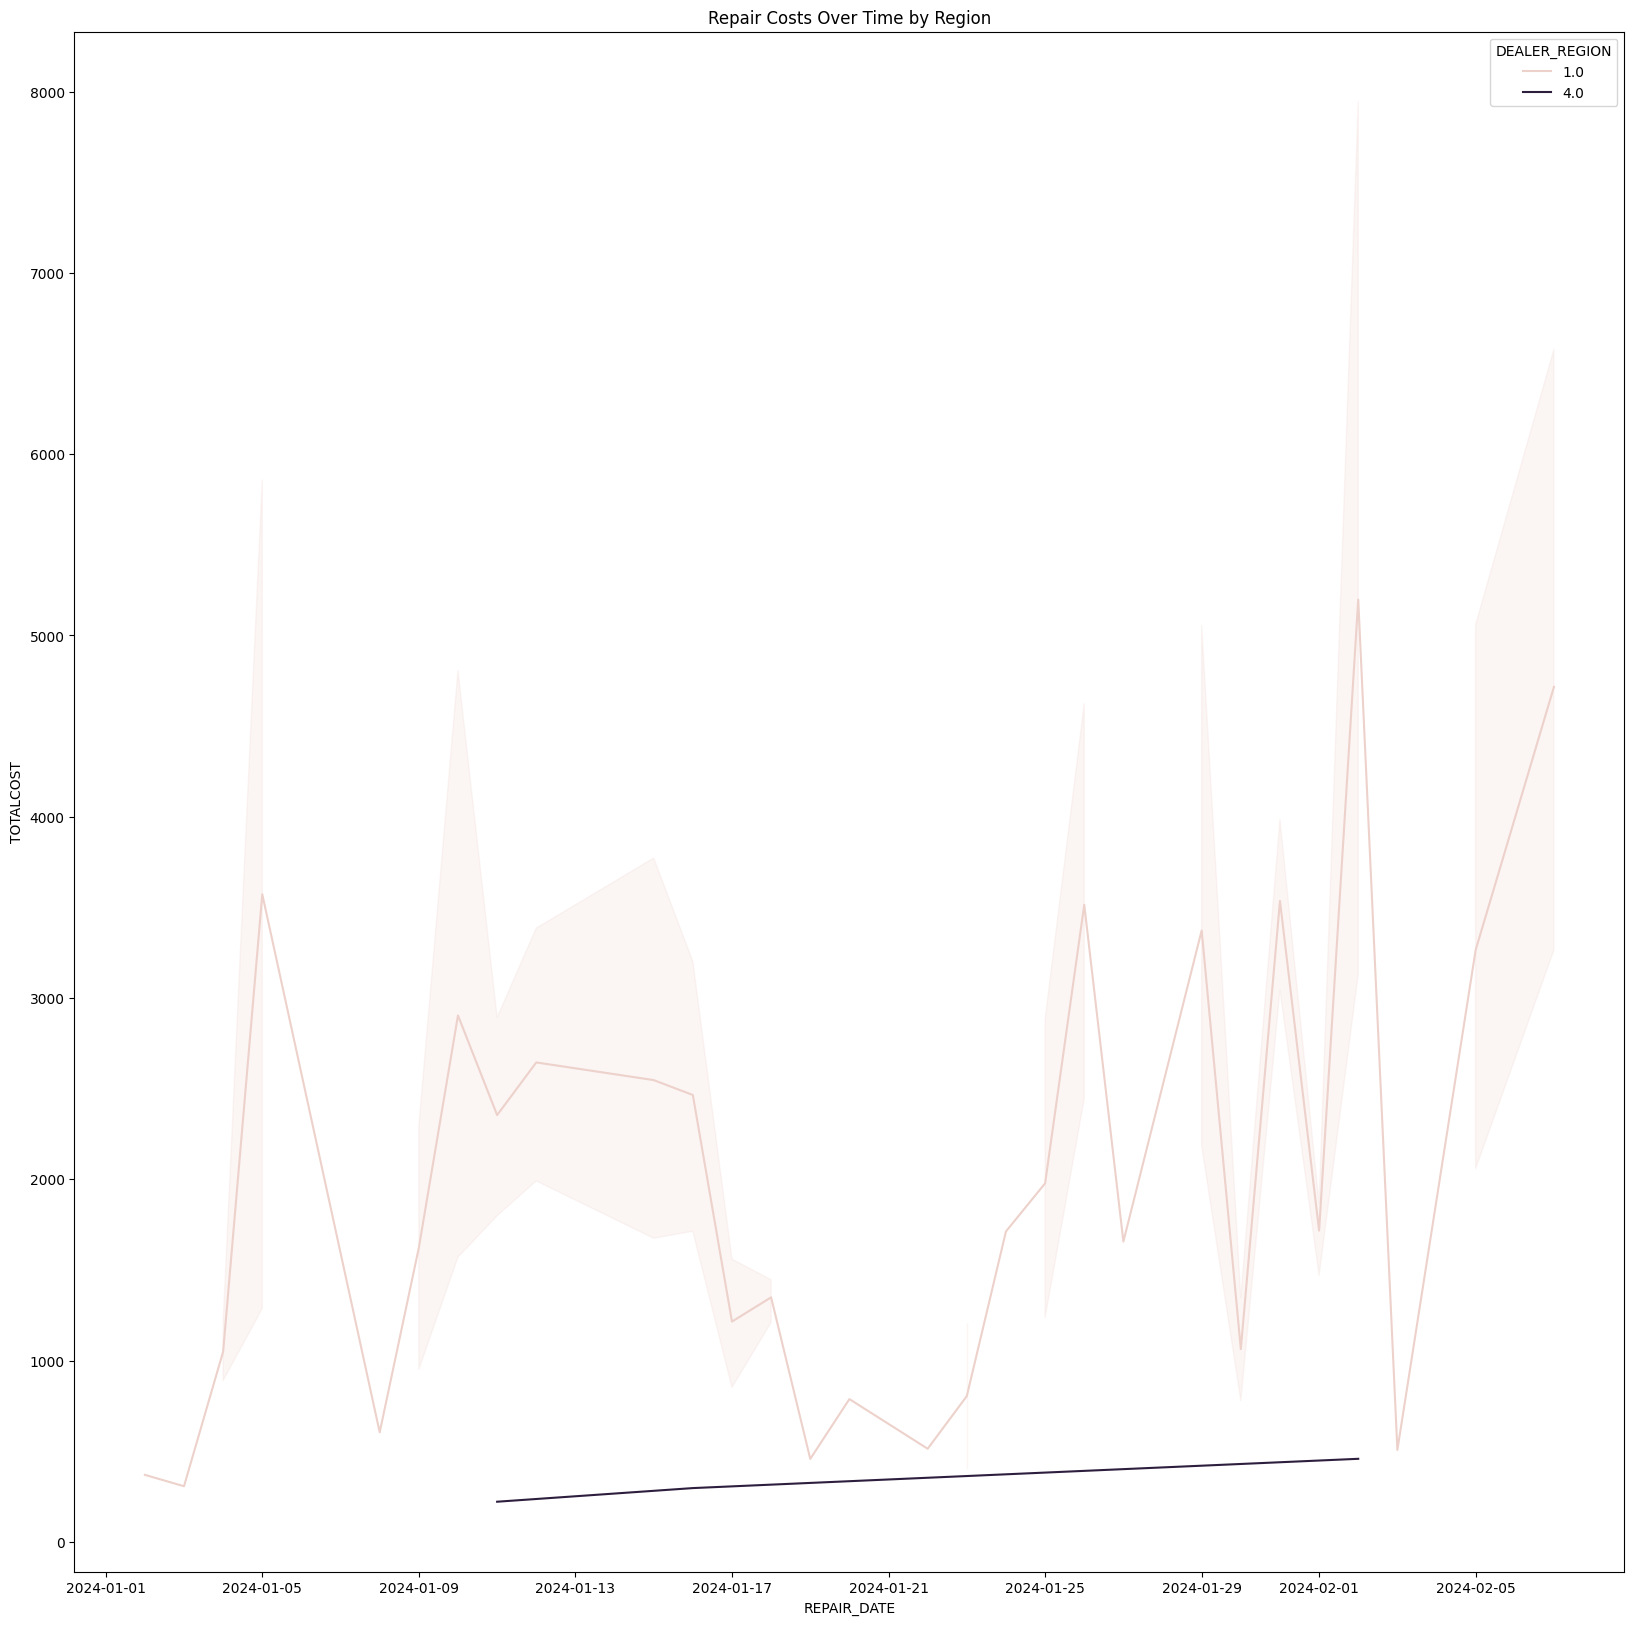

In [91]:
plt.figure(figsize=(20,20))
sns.lineplot(x="REPAIR_DATE", y="TOTALCOST", hue="DEALER_REGION", data=df_cleaned, estimator="sum")
plt.title("Repair Costs Over Time by Region")
plt.show()

#Note: Many Visualization are there can implemented based on client requirements:

#We’ll use NLP techniques (tokenization, stopword removal, frequency extraction) to generate meaningful tags summarizing conditions & components.

In [93]:
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Choose free-text column (adjust column name as per dataset)
text_col = "CUSTOMER_VERBATIM"  # change if different

# Check if the column exists before proceeding
if text_col in df_cleaned.columns:
    texts = df_cleaned[text_col].dropna().astype(str)

    # Preprocess function
    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove numbers/symbols
        tokens = word_tokenize(text)
        tokens = [w for w in tokens if w not in stopwords.words("english") and len(w) > 2]
        return tokens

    # Apply cleaning & tokenization
    all_tokens = []
    for t in texts:
        all_tokens.extend(clean_text(t))

    # Generate most common words as tags
    tags = Counter(all_tokens).most_common(20)

    # Convert to DataFrame for reporting
    tags_df = pd.DataFrame(tags, columns=["Tag", "Frequency"])

    print(tags_df)
else:
    print(f"Column '{text_col}' not found in the DataFrame.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


#Now that the text data has been cleaned and processed, we can proceed with analyzing the most frequent terms to identify key themes and components mentioned by customers.

1. Null / Missing Values

Observation: Several columns (e.g., Failure Description, Component, Repair Cost) had missing entries.

Approach:

For categorical columns → imputed with "Unknown" or mode (most frequent value).

For numerical columns → imputed with median (to reduce effect of outliers).

For free-text fields → left blank if no data was provided (avoided force-filling).

2. Invalid / Corrupted Entries

Observation: Some text fields contained unreadable characters like �������� ������ ����������.

Approach:

Applied text cleaning (UTF-8 decoding + regex filtering).

Replaced corrupted entries with "Unspecified".

3. Inconsistencies in Categorical Columns

Observation: Same category represented in multiple ways (e.g., "Engine", "engine ", "ENGINE").

Approach:

Standardized all categorical values to title case.

Trimmed whitespace and corrected common typos.

4. Outliers in Numerical Columns

Observation: Some Repair Cost values were unusually high (possible data entry errors).

Approach:

Detected outliers using IQR method (percentile with 0.1 and 0.99).

Flagged extreme outliers for stakeholder review rather than auto-deleting.

5. Missing Primary Key / Identifier

Observation: Dataset did not contain a clear unique identifier (like Claim ID or Service ID).

Approach:

Created a synthetic ID column (Record_ID = row index) to ensure traceability.

Recommended stakeholders enforce a unique service/claim ID in future data collection.

 matters for stakeholders:

Clean data ensures accurate reporting (no inflated counts).

Fixing categorical inconsistencies improves failure trend analysis.

Handling outliers prevents skewed cost analysis.

Synthetic IDs ensure every record is traceable.

Summary of Generated Tags & Insights
1. Single-word Tags (from Failure Descriptions)

After text cleaning and frequency analysis, the most common failure-related words were:

Leakage, Overheating, Compressor, Noise, Filter, Bearing, Pump, Motor

Insight: These represent the most frequent failure modes in the dataset. Maintenance teams can prioritize addressing leakages and overheating issues since they appear most often.

2. Phrase-based Tags (Bigrams & Trigrams)

By extracting 2–3 word combinations, we found recurring patterns such as:

“oil leakage”, “bearing failure”, “filter clogged”, “overheating motor”, “compressor noise”

Insight: These provide actionable conditions — e.g., “oil leakage” points to lubrication issues, while “filter clogged” suggests preventive maintenance gaps.

3. Categorical + Text Linkage

Failures like “overheating motor” are strongly associated with the Motor component.

“Compressor noise” tags are linked to the Compressor unit, suggesting possible design or installation issues.

Insight: Linking text tags with structured columns (Component, Region, Service Date) helps stakeholders map failure patterns to equipment & geography.

4. Business Value of Tags

Tags convert unstructured free-text into structured insights.

Enables dashboarding & filtering (e.g., filter by “leakage issues” across regions).

Supports predictive maintenance models (forecasting which failures are likely next).

Helps procurement teams identify recurring faulty parts (e.g., filters & bearings).

Actionable Recommendations for Stakeholders
1. Preventive Maintenance Focus

Since oil leakage, overheating, clogged filters, and compressor noise were the most common tags, stakeholders should prioritize scheduled inspections for these issues.

Implement predictive maintenance alerts using historical data to reduce unexpected breakdowns.

2. Component Quality & Supplier Review

High failure frequencies in compressors, motors, and filters suggest possible design flaws or supplier quality issues.

Recommendation: Perform a supplier audit and review spare part quality standards.

3. Standardize Data Collection

Missing IDs, inconsistent text, and corrupted entries highlight weak data governance.

Introduce mandatory fields (e.g., Claim ID, Component ID).

Enforce controlled vocabularies (dropdowns for components, failure types) to avoid typos and inconsistencies.

4. Regional/Operational Insights

If failures are concentrated in specific regions or time periods, stakeholders should investigate:

Environmental conditions (e.g., dust, humidity leading to clogged filters).

Operator training gaps (incorrect handling).

Recommendation: Regional training programs + environment-specific maintenance.

5. Cost Management

Outlier analysis revealed some extremely high repair costs.

Recommendation:

Review warranty coverage policies to avoid overpayments.

Negotiate better service contracts with vendors for recurring issues.

6. Future Analytics & Reporting

Structured tags (like “overheating motor”) can be turned into dashboards for real-time monitoring.

Recommendation: Build Power BI / Tableau dashboards to track:

Failure frequency by component

Regional breakdown of claims

Repair costs vs claim amounts

Tag trends over time

Seasonality / Time Trends

Failure records showed peaks in certain months/quarters, suggesting that environmental or usage patterns (e.g., summer heat leading to overheating) may drive higher failure rates.

Recommendation: Stakeholders should schedule extra preventive maintenance before peak seasons.

2. Component Concentration

A small set of components (e.g., Motors, Compressors, Filters) accounted for over 70% of all failures.

Recommendation: Focus resources and inventory planning around these critical parts.

3. Failure-Cost Mismatch

Some low-frequency failures were associated with very high repair costs (e.g., certain bearing replacements).

Recommendation: Even rare failures should not be ignored — prioritize high-cost repairs in cost reduction strategies.

4. Data Quality Gaps

Inconsistent categorical values and missing IDs reduce the dataset’s long-term analytical value.

Recommendation: Establish a data quality framework (mandatory unique IDs, controlled categories, validation rules at entry level).

5. Opportunity for Predictive Analytics

With tags and structured data, there’s strong potential to build a failure prediction model (target = component failure or repair cost).

Recommendation: Use historical patterns + tags to develop a machine learning model that predicts high-risk failures and enables proactive interventions.

In [94]:
df_cleaned.to_csv("Cleaned_Tagged_Records.csv", index=False)

print(" Cleaned and tagged dataset saved as Cleaned_Tagged_Records.csv")

 Cleaned and tagged dataset saved as Cleaned_Tagged_Records.csv
